## Mesh
Open3D has a data structure for 3D triangle meshes called **TriangleMesh**. The code below shows how to read a triangle mesh from a **ply** file and print its vertices and triangles.

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import Open3D.examples.python.open3d_tutorial as o3dtut #from cloned folder

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


In [2]:
print("Testing mesh in Open3D...")
mesh = o3d.io.read_triangle_mesh("knot.ply")
print(mesh)

Testing mesh in Open3D...
TriangleMesh with 1440 points and 2880 triangles.


In [3]:
print('Vertices: \n', np.asarray(mesh.vertices))

Vertices: 
 [[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]


In [4]:
print('Triangles: \n', np.asarray(mesh.triangles))

Triangles: 
 [[   0   12   13]
 [   0   13    1]
 [   1   13   14]
 ...
 [1438   11 1439]
 [1439   11    0]
 [1439    0 1428]]


The **TriangleMesh** class has a few data fields such as **vertices** and **triangles**. Open3D provides direct memory access to these fields via numpy.

### Visualize a 3D mesh

In [5]:
#There is no vertices
o3d.visualization.draw_geometries([mesh])

In [6]:
print("Try to render a mesh with normals (exist: " +
      str(mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])
print("A mesh with no normals and no colors does not look good.")

Try to render a mesh with normals (exist: False) and colors (exist: False)
A mesh with no normals and no colors does not look good.


## Surface normal estimation
Let's draw the mesh with surface normals.

In [7]:
# Making vertex_normals()
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

[[ 0.79164373 -0.53951444  0.28674793]
 [ 0.8319824  -0.53303008  0.15389681]
 [ 0.83488162 -0.09250101  0.54260136]
 ...
 [ 0.16269924 -0.76215917 -0.6266118 ]
 [ 0.52755226 -0.83707495 -0.14489352]
 [ 0.56778973 -0.76467734 -0.30476777]]


### Crop mesh
We remove half of the surface by directly operating on the **triangle** and **triangle_normals** data fields of the mesh.

In [8]:
print("We make a partial mesh of only the first half triangles.")
mesh1 = mesh
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
print(np.asarray(mesh1.triangles))
o3d.visualization.draw_geometries([mesh1])

We make a partial mesh of only the first half triangles.
std::vector<Eigen::Vector3i> with 1440 elements.
Use numpy.asarray() to access data.
[[  0  12  13]
 [  0  13   1]
 [  1  13  14]
 ...
 [718 731 719]
 [719 731 720]
 [719 720 708]]


### Paint mesh
**paint_uniform_color** paints the mesh with a uniform color. The color is in RGB space, \[0,1\] range.

In [9]:
print("Painting the mesh")
mesh1.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([mesh1])

Painting the mesh


### Mesh properties
A triangle mesh has several properties that can be tested with Open3D. One important property is the manifold property, where we can test the triangle mesh if it is edge manifold **is_edge_manifold** and if it is **is_vertex_manifold**. *A triangle mesh is edge manifold, if each edge is bounding either one or two triangles*. The function **is_edge_manifold** has the **bool** parameter **allow_boundary_edges** that defines if boundary edges should be allowed. Further, a triangle mesh is *vertex manifold if the star of the vertex is edge‐manifold and edge‐connected, e.g., two or more faces connected only by a vertex and not by an edge*.

Another property is the test of *self-intersection*. The function **is_self_intersecting** returns **True** if there exists a triangle in the mesh that is intersecting another mesh. A watertight mesh can be defined as a mesh that is edge manifold, vertex manifold and not self intersecting. The function **is_watertight** implements this check in Open3D.

We also can test the triangle mesh, if it is orientable, i.e. the triangles can be oriented in such a way that *all normals point towards the outside*. The corresponding function in Open3D is called **is_orientable**.

The code below tests a number of triangle meshes against those properties and visualizes the results. Non-manifold edges are shown in red, boundary edges in green, non-manifold vertices are visualized as green points, and self-intersecting triangles are shown in pink.

In [10]:
def check_properties(name, mesh):
    mesh.compute_vertex_normals()

    edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True)
    edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False)
    vertex_manifold = mesh.is_vertex_manifold()
    self_intersecting = mesh.is_self_intersecting()
    watertight = mesh.is_watertight()
    orientable = mesh.is_orientable()

    print(name)
    print(f"  edge_manifold:          {edge_manifold}")
    print(f"  edge_manifold_boundary: {edge_manifold_boundary}")
    print(f"  vertex_manifold:        {vertex_manifold}")
    print(f"  self_intersecting:      {self_intersecting}")
    print(f"  watertight:             {watertight}")
    print(f"  orientable:             {orientable}")

    geoms = [mesh]
    if not edge_manifold:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=True)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 0)))
    if not edge_manifold_boundary:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=False)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (0, 1, 0)))
    if not vertex_manifold:
        verts = np.asarray(mesh.get_non_manifold_vertices())
        pcl = o3d.geometry.PointCloud(
            points=o3d.utility.Vector3dVector(np.asarray(mesh.vertices)[verts]))
        pcl.paint_uniform_color((0, 0, 1))
        geoms.append(pcl)
    if self_intersecting:
        intersecting_triangles = np.asarray(
            mesh.get_self_intersecting_triangles())
        intersecting_triangles = intersecting_triangles[0:1]
        intersecting_triangles = np.unique(intersecting_triangles)
        print("  # visualize self-intersecting triangles")
        triangles = np.asarray(mesh.triangles)[intersecting_triangles]
        edges = [
            np.vstack((triangles[:, i], triangles[:, j]))
            for i, j in [(0, 1), (1, 2), (2, 0)]
        ]
        edges = np.hstack(edges).T
        edges = o3d.utility.Vector2iVector(edges)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 1)))
    o3d.visualization.draw_geometries(geoms, mesh_show_back_face=True)

Importing **open3d_tutoria**l is necessary to download example meshes. It is complicated to get the example meshes without it.

In [13]:
#check_properties('Knot', mesh)
#check_properties('Moebius', o3d.geometry.TriangleMesh.create_moebius(twists=1))

Moebius
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             False


NameError: name 'o3dtut' is not defined

### Importing open3d_tutorial from Open3D clone folder as o3dtut
It downloads examples automatically.

In [14]:
import Open3D.examples.python.open3d_tutorial as o3dtut

[download_utils.py] Downloaded https://github.com/intel-isl/open3d_downloads/raw/master/RGBD/normal_map.npy
        to C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy
[download_utils.py] Downloaded https://github.com/intel-isl/open3d_downloads/raw/master/RGBD/vertex_map.npy
        to C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy
[download_utils.py] Downloaded https://github.com/intel-isl/open3d_downloads/raw/master/tests/cube.obj
        to C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj
[download_utils.py] Downloaded https://github.com/intel-isl/open3d_downloads/raw/master/RGBD/raycast_vtx_004.npy
        to C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy


Knot
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


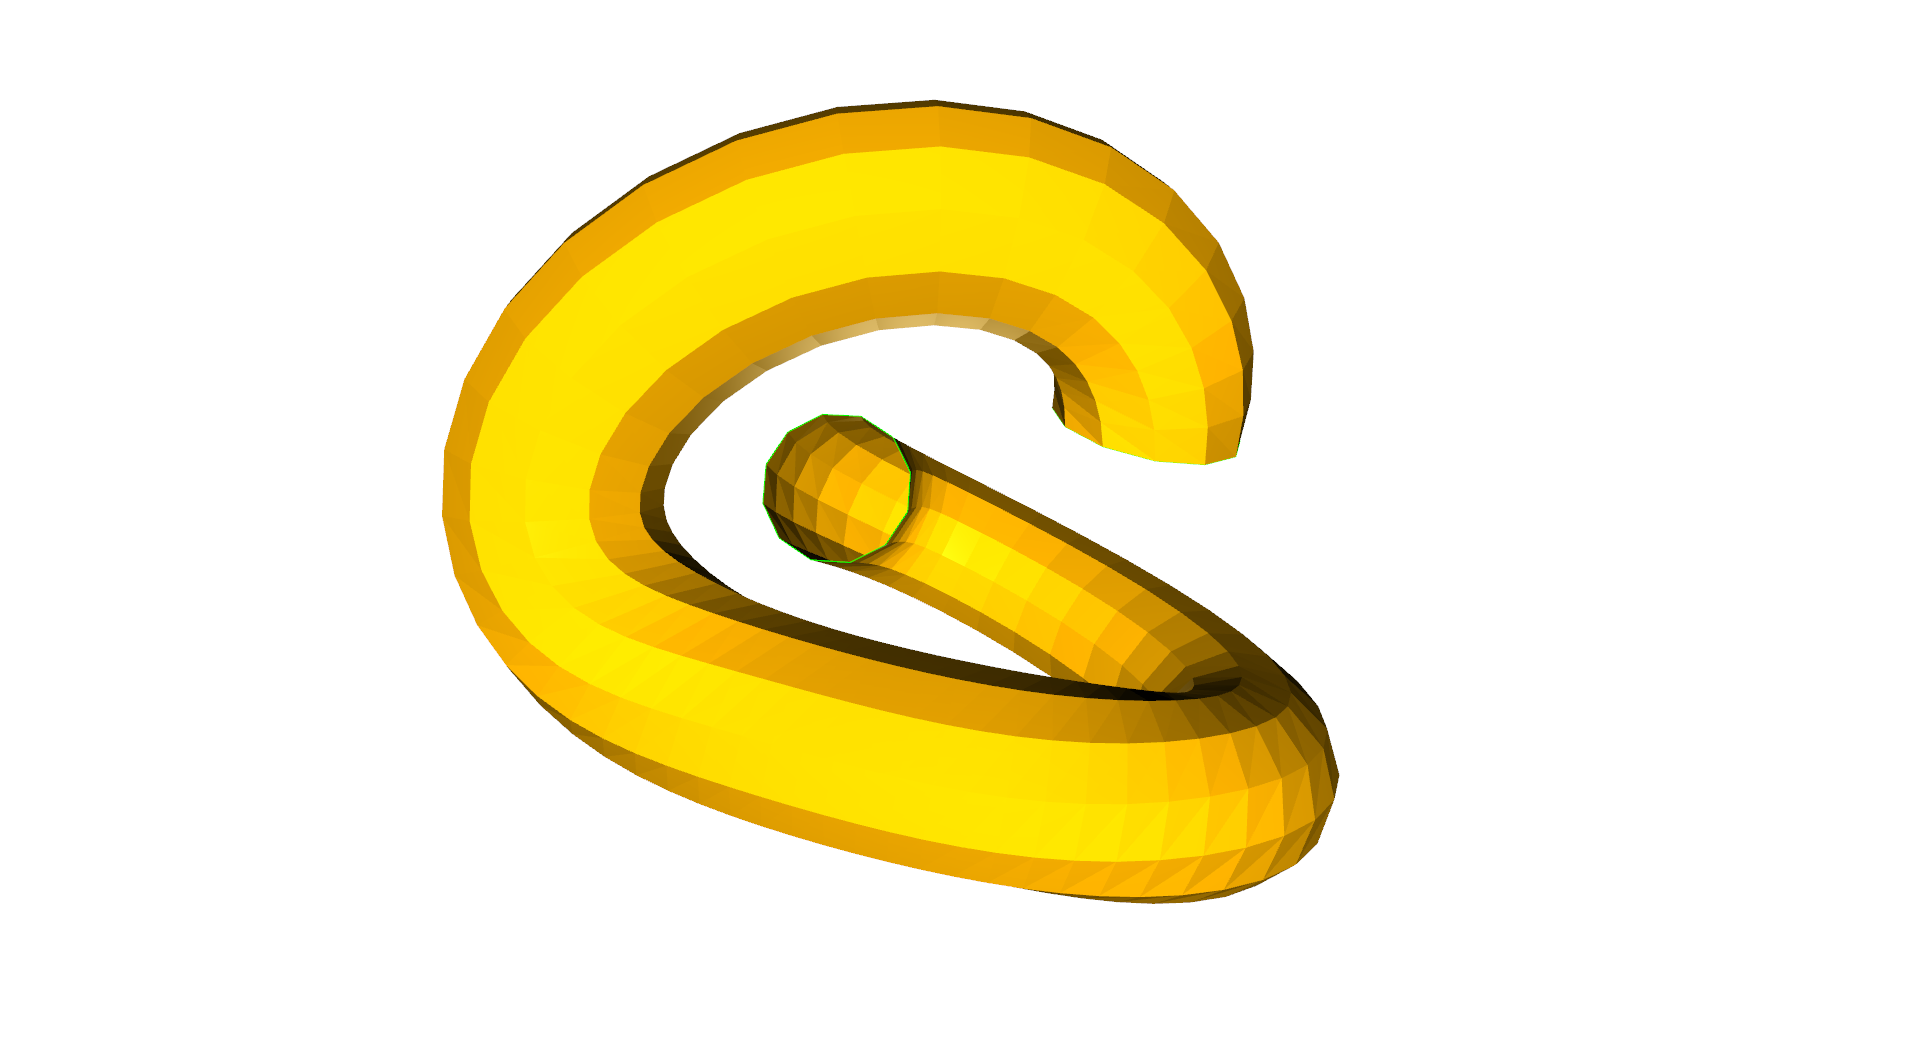

In [15]:
check_properties('Knot', mesh)

Moebius
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             False


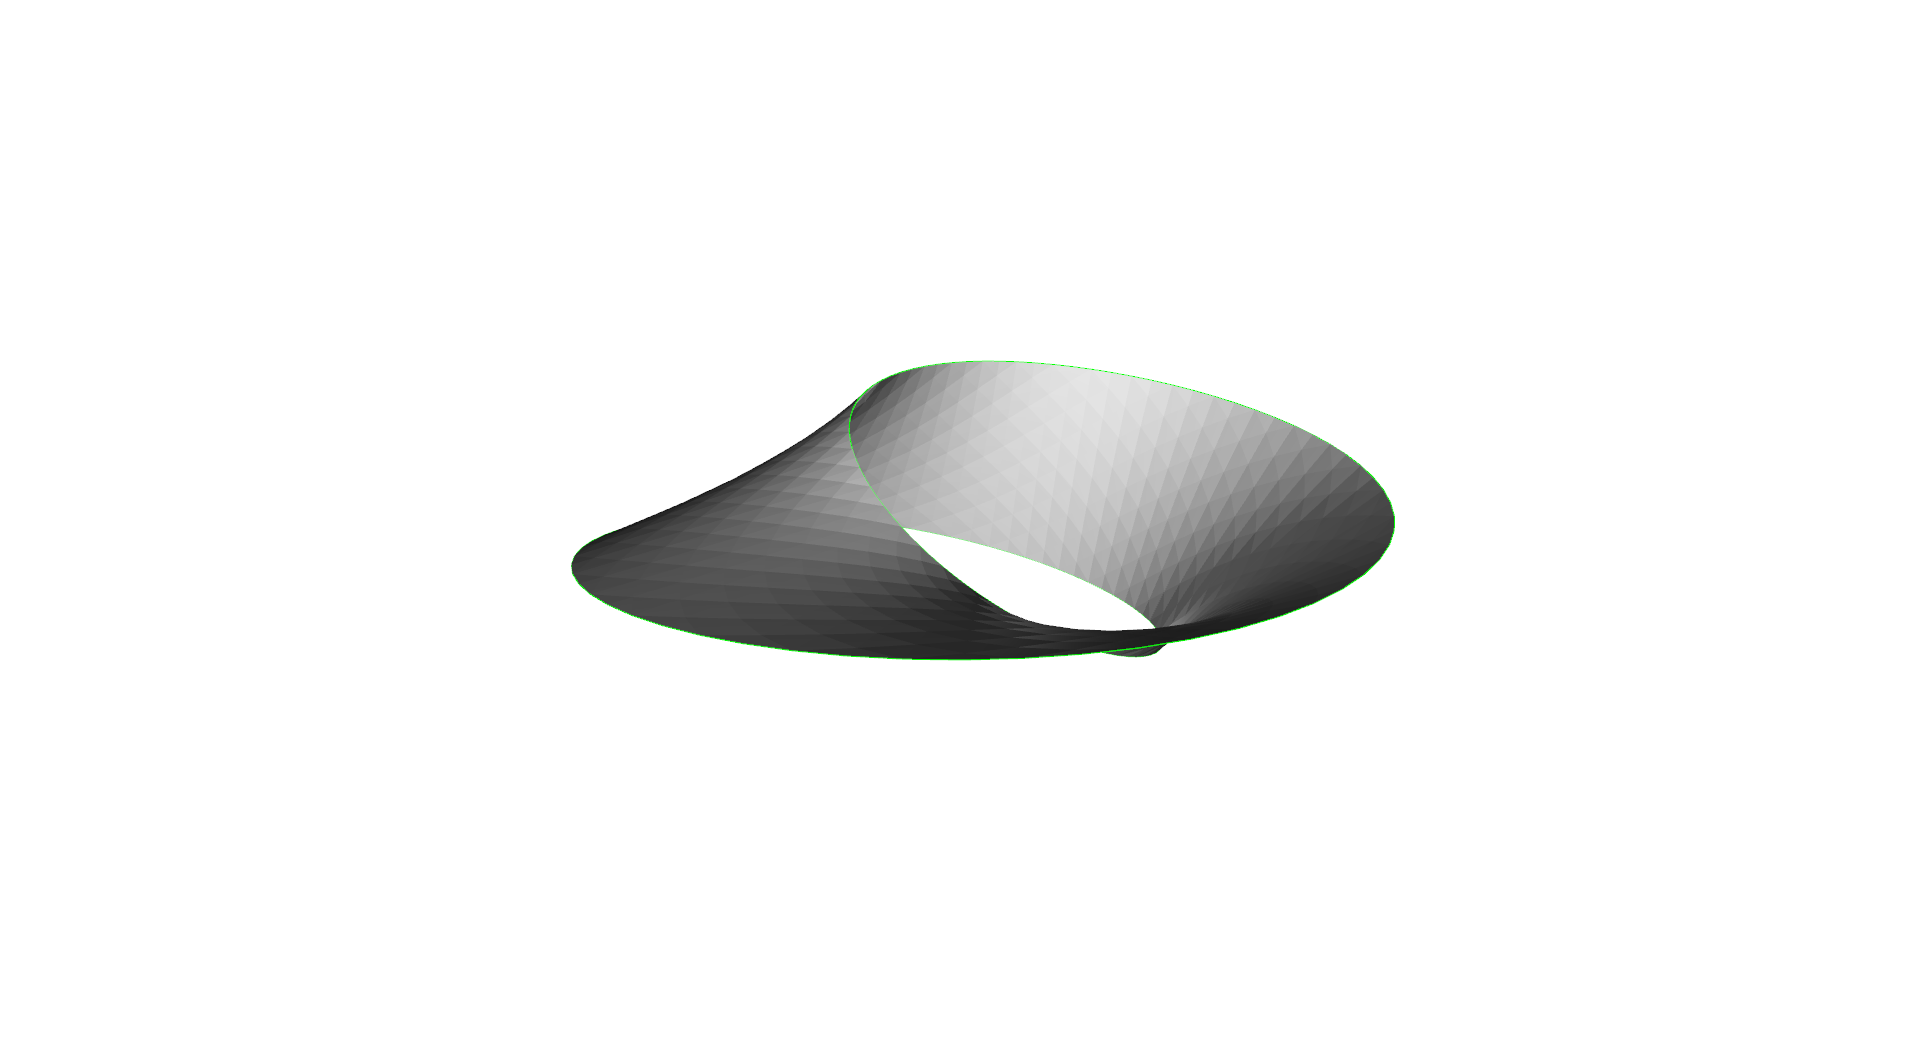

In [16]:
check_properties('Moebius', o3d.geometry.TriangleMesh.create_moebius(twists=1))

non-manifold edge
  edge_manifold:          False
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


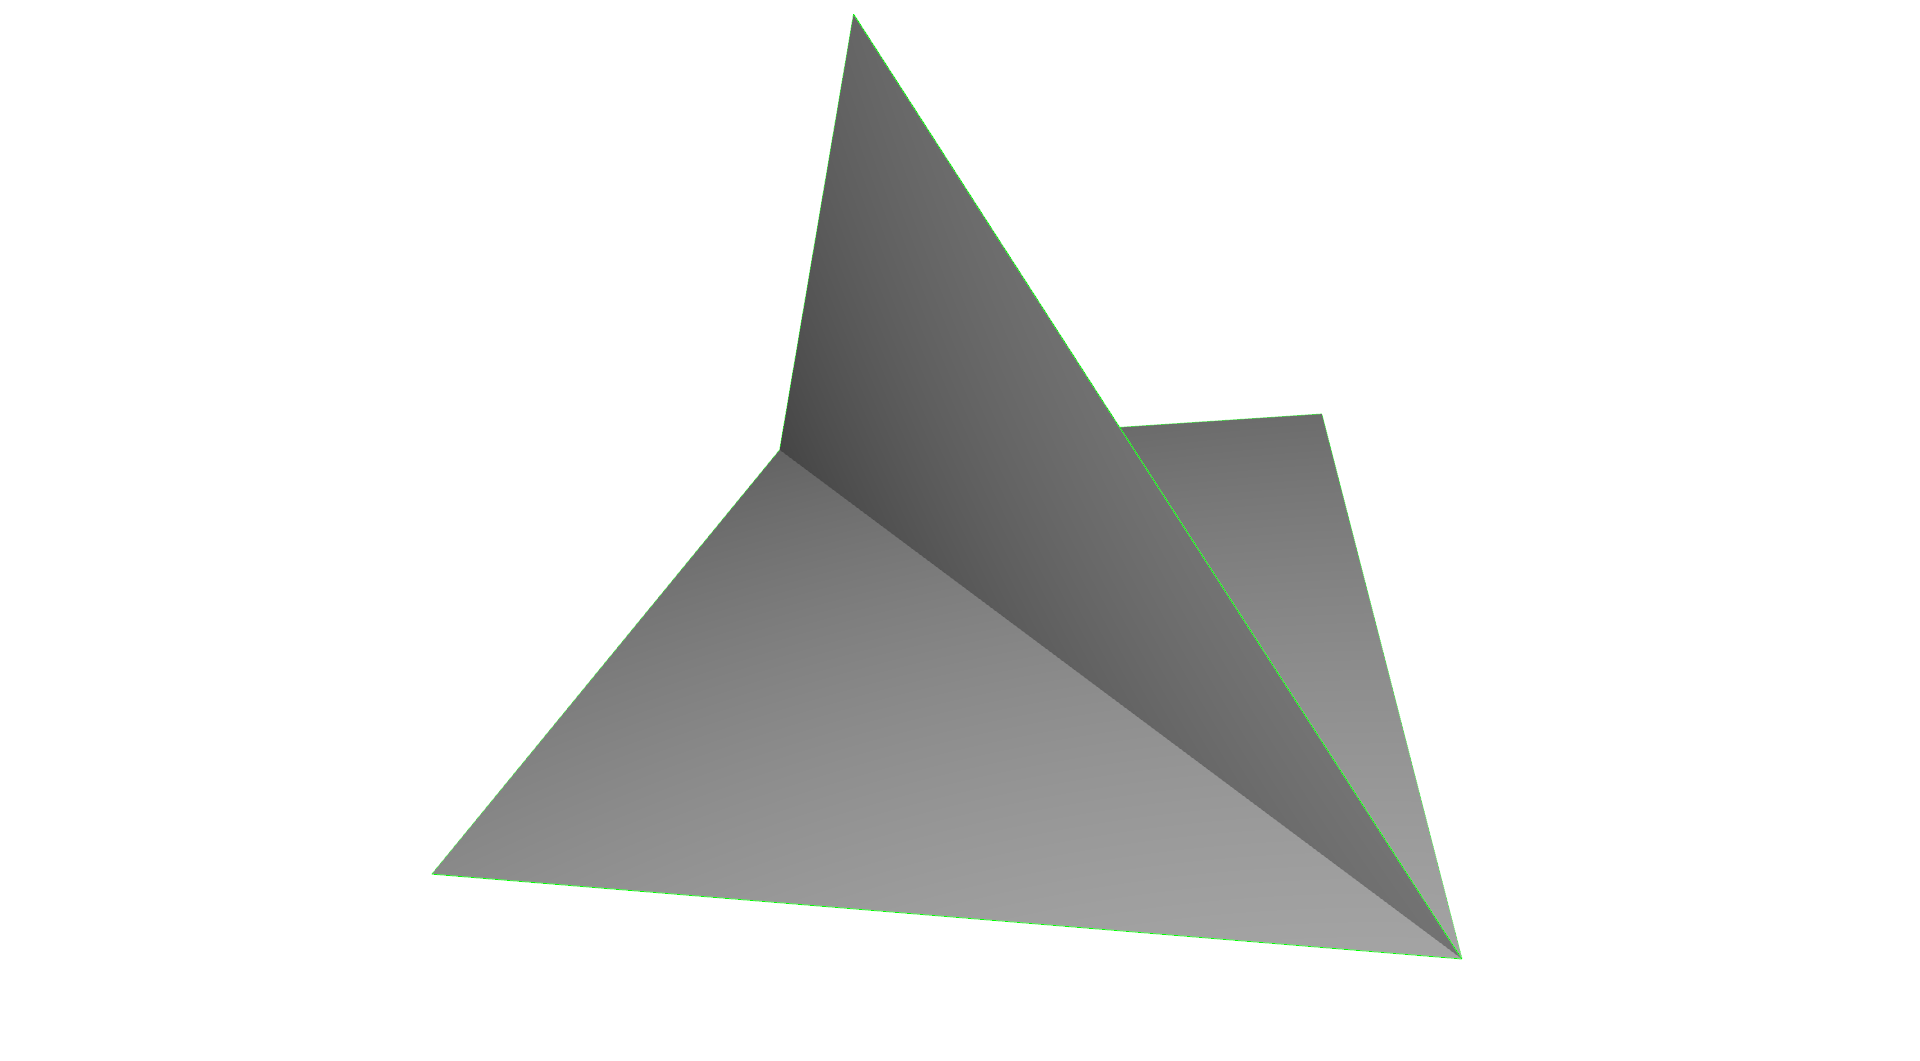

In [17]:
check_properties("non-manifold edge", o3dtut.get_non_manifold_edge_mesh())

non-manifold vertex
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        False
  self_intersecting:      False
  watertight:             False
  orientable:             True


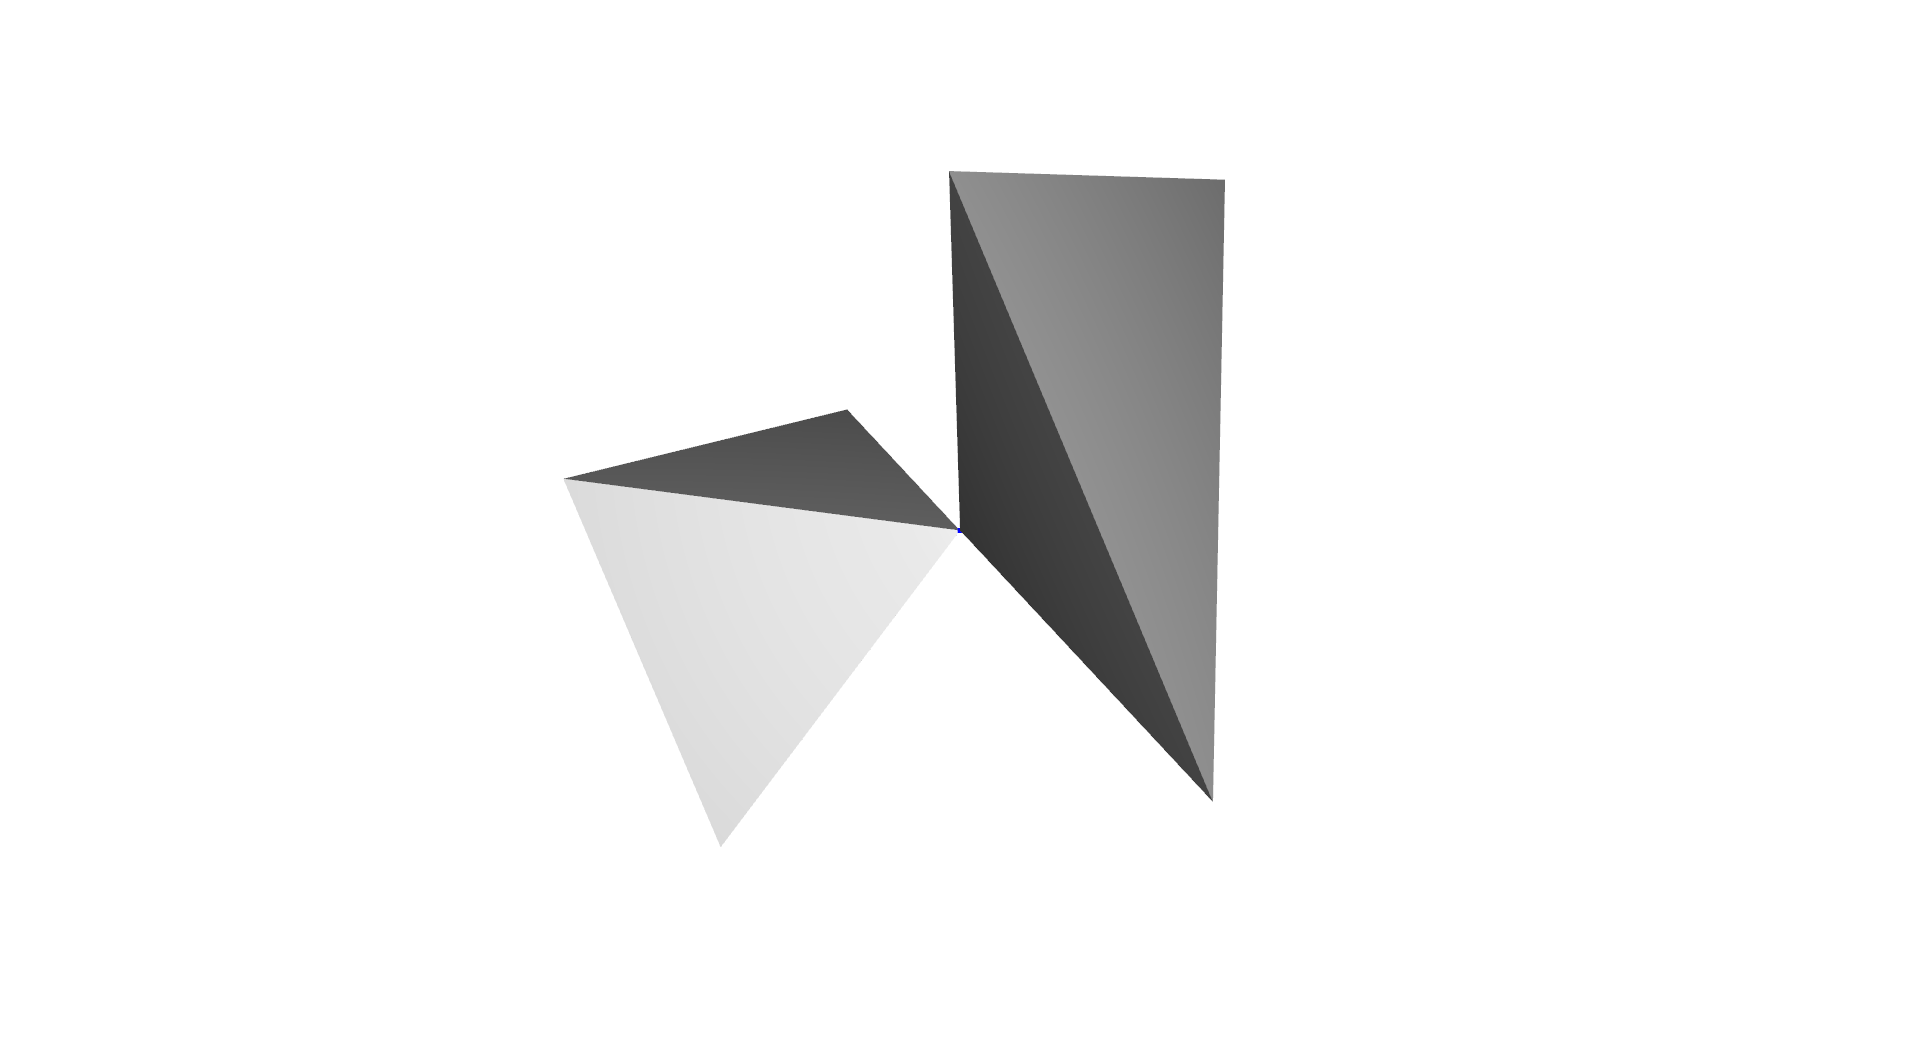

In [18]:
check_properties("non-manifold vertex", o3dtut.get_non_manifold_vertex_mesh())

open box
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


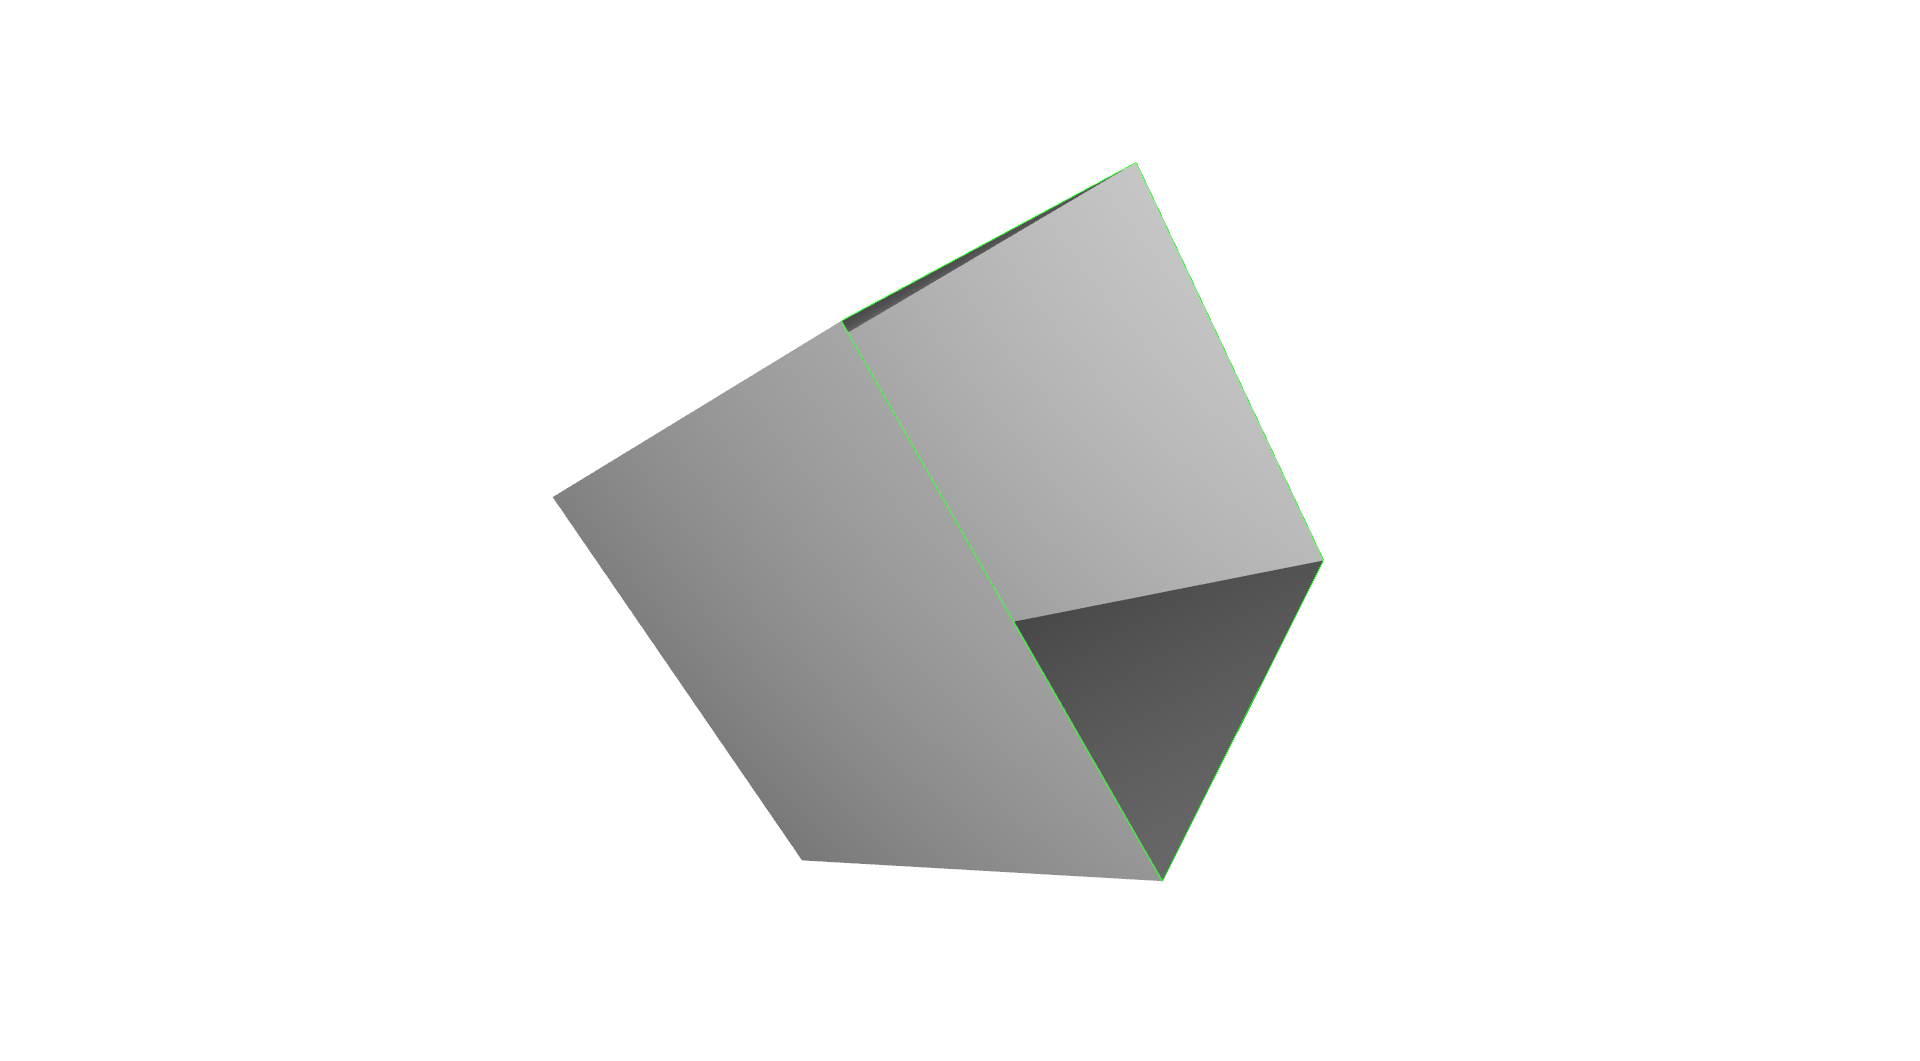

In [19]:
check_properties("open box", o3dtut.get_open_box_mesh())

intersecting_boxes
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        True
  self_intersecting:      True
  watertight:             False
  orientable:             True
  # visualize self-intersecting triangles


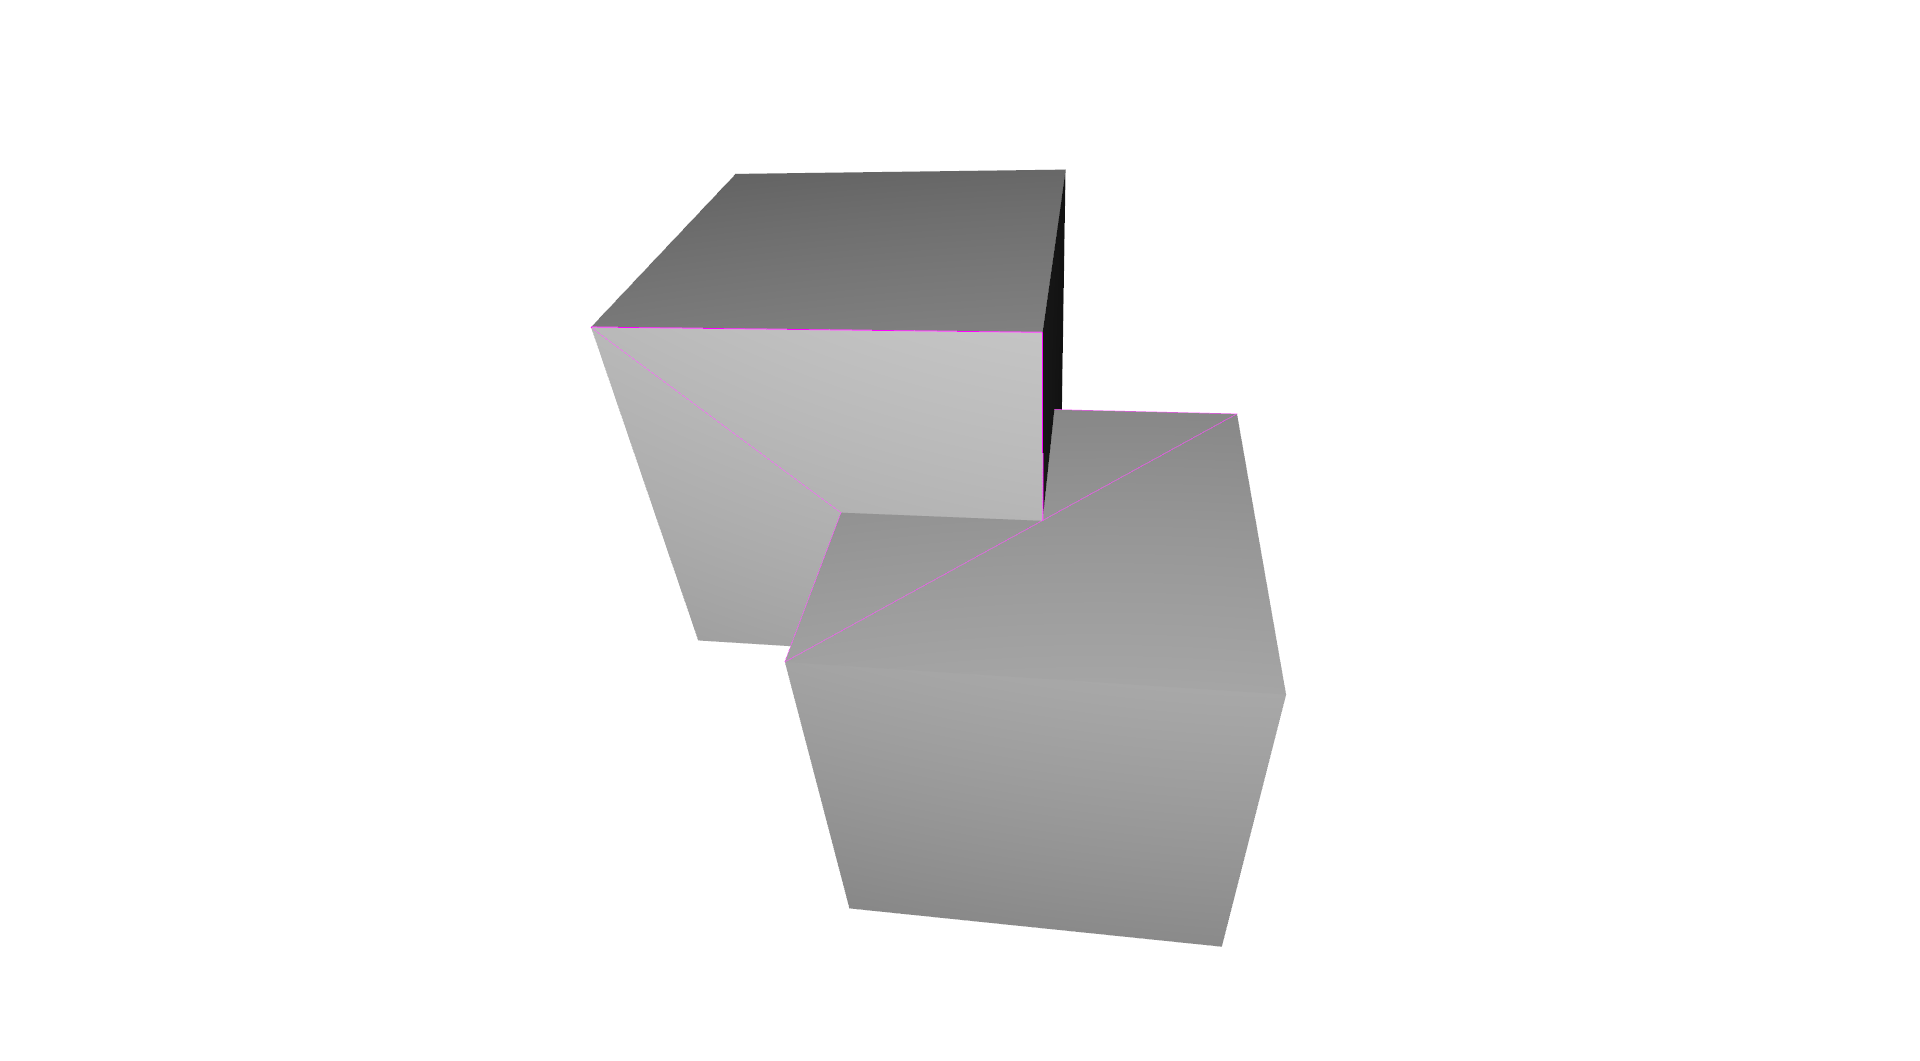

In [21]:
check_properties("intersecting_boxes", o3dtut.get_intersecting_boxes_mesh())

### Mesh filtering
Open3D contains a number of methods to filter meshes. In the following we show the implemented filters to smooth noisy triangle meshes
#### Average filter
The simplest filter is the average filter. A given vertex $v_i$ is given by the average of the adjacent vertices $\mathcal N$
$$
v_i = \frac{v_i + \sum_{n \in \mathcal N}v_n}{|N| + 1}
$$
This filter can be used to denoise meshes as demonstrated in the code below. The parameter **number_of_iterations** in the function **filter_smooth_simple** defines the how often the filter is applied to the mesh.

create noisy mesh


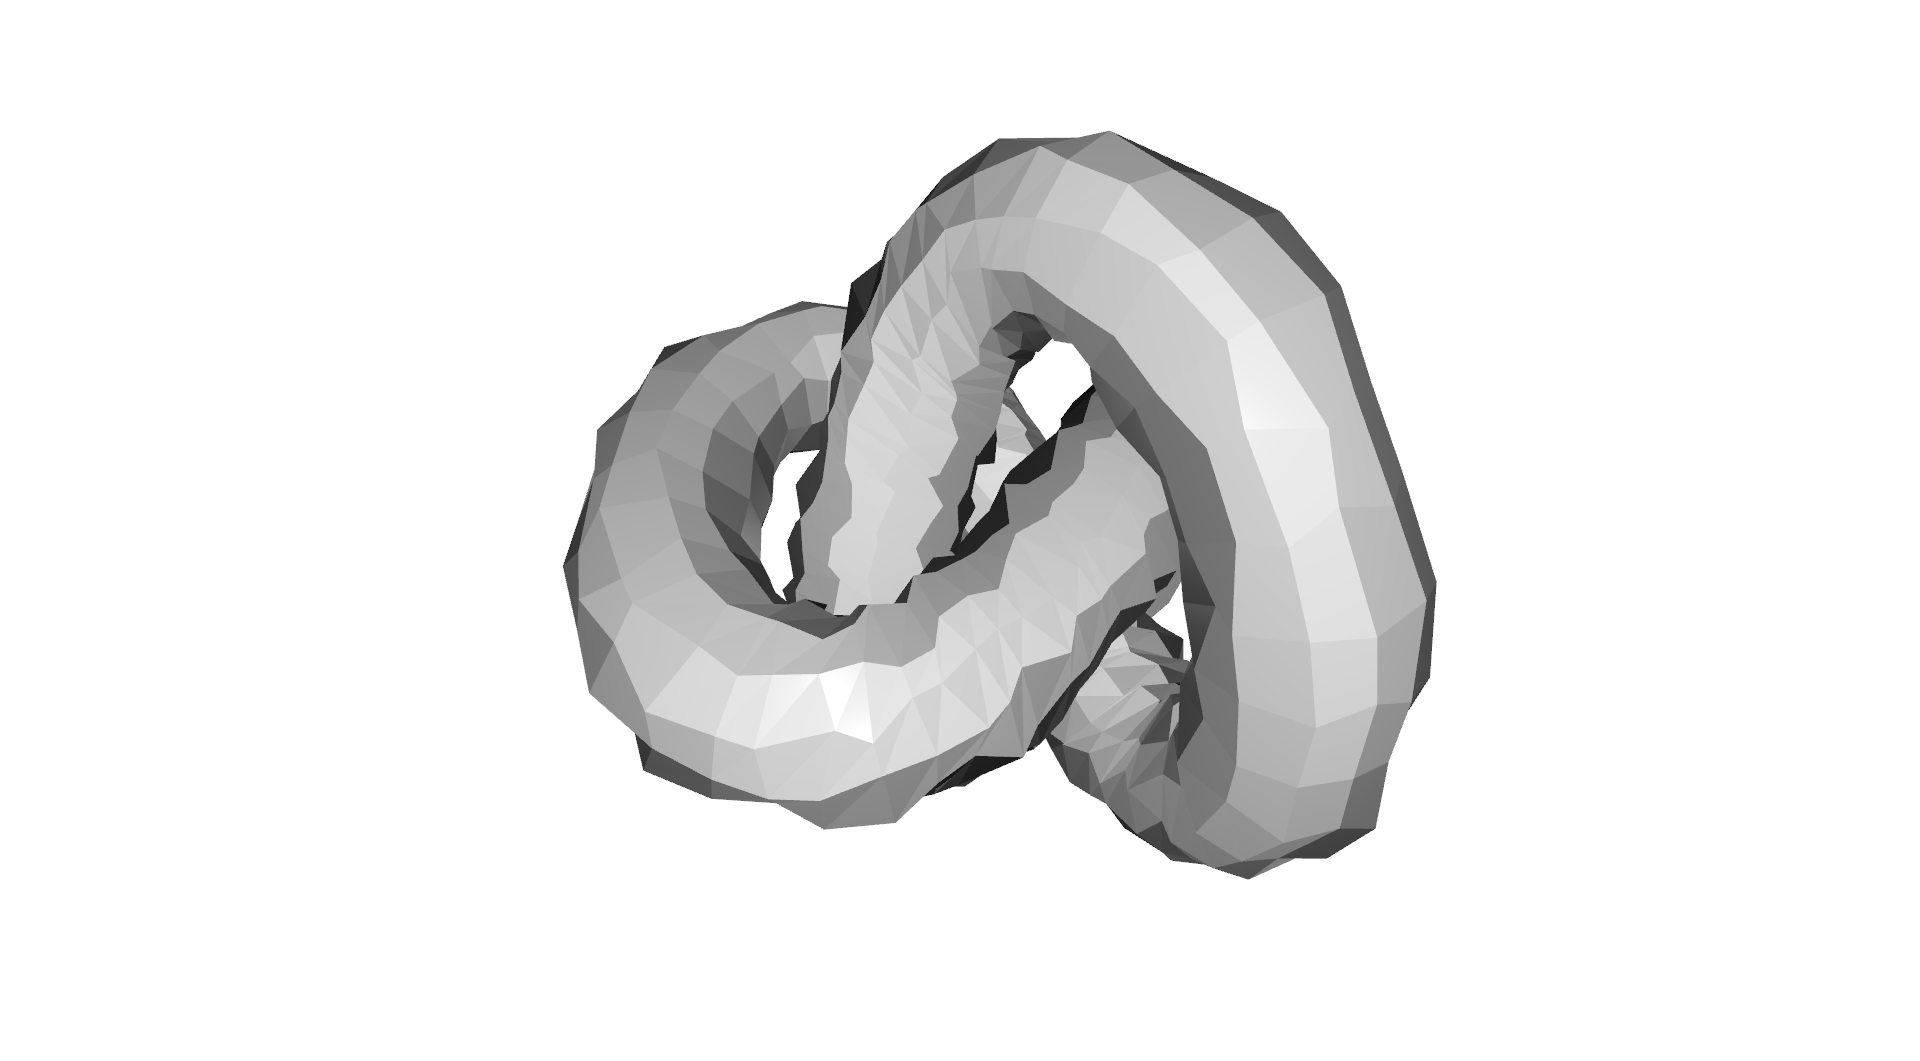

In [22]:
print('create noisy mesh')
mesh_in = o3dtut.get_knot_mesh()
vertices = np.asarray(mesh_in.vertices)
noise = 5
vertices += np.random.uniform(0, noise, size=vertices.shape)
mesh_in.vertices = o3d.utility.Vector3dVector(vertices)
mesh_in.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_in])

filter with average with 1 iteration


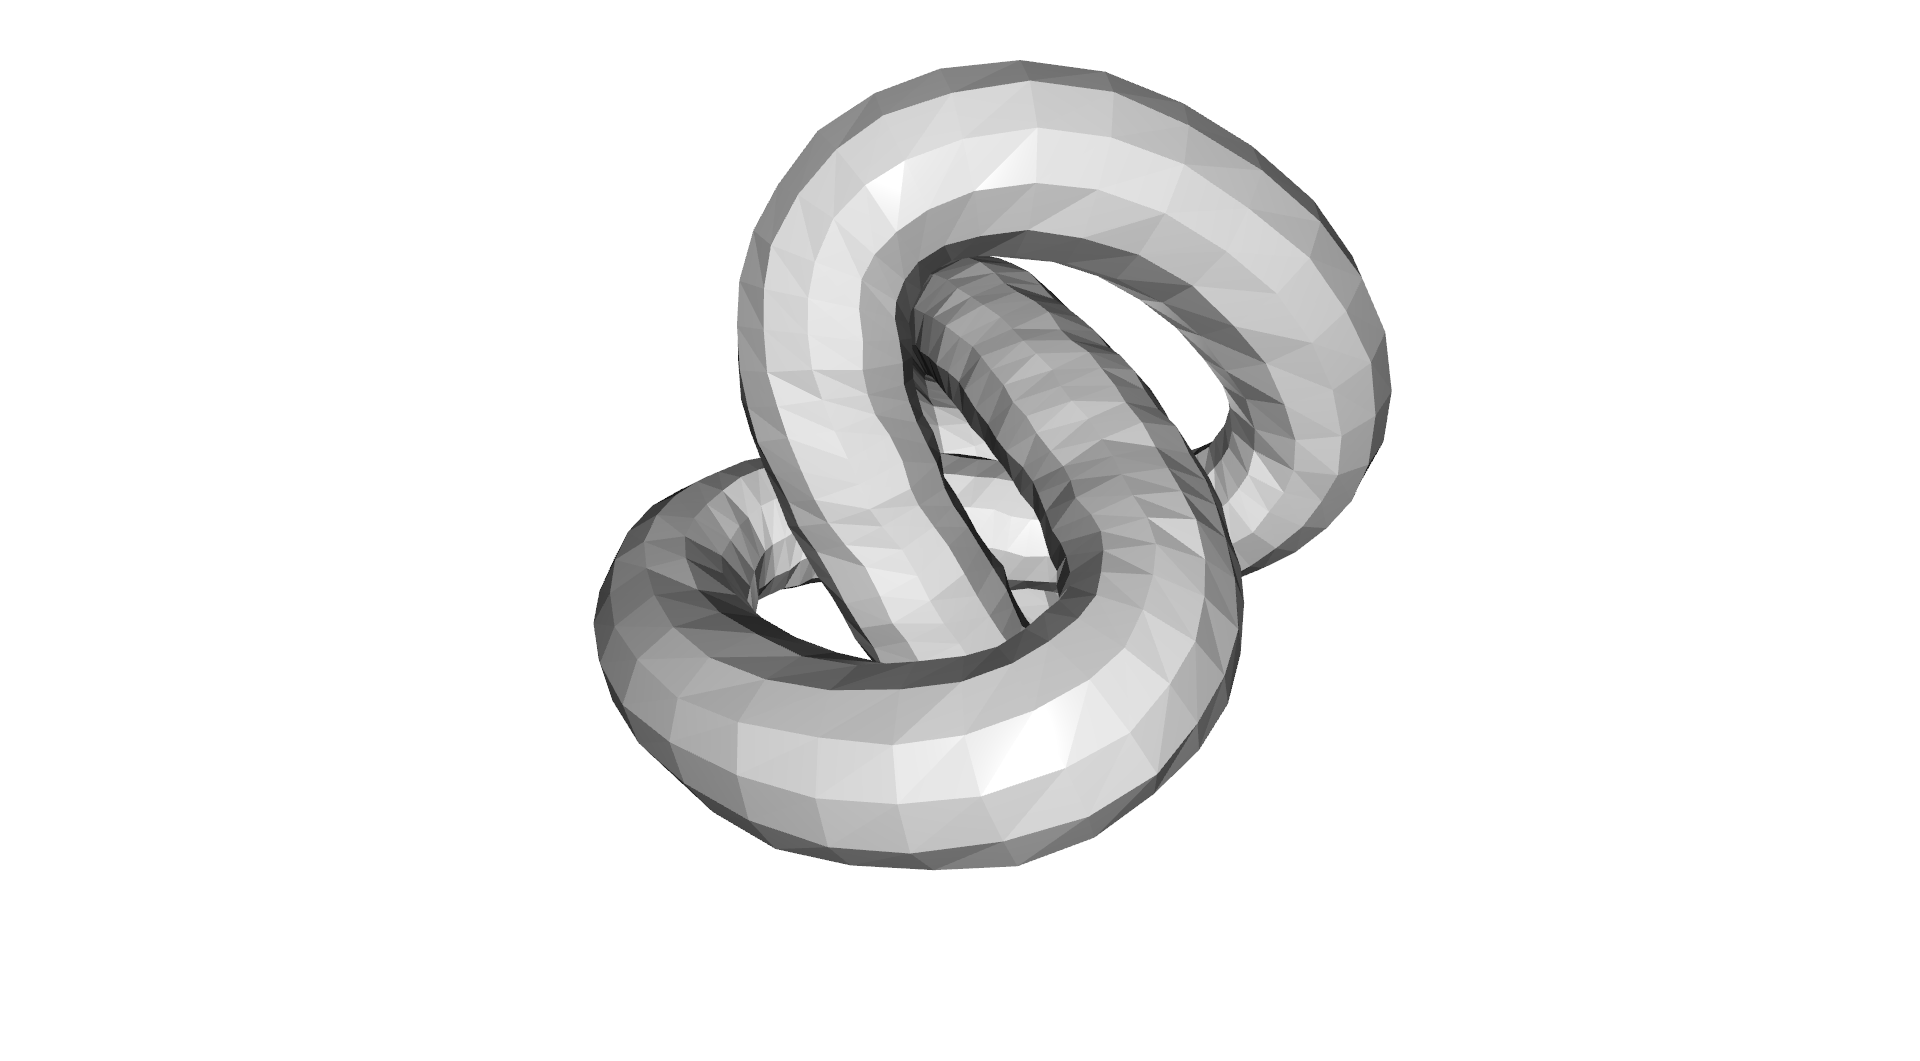

In [23]:
print('filter with average with 1 iteration')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=1)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

filter with average with 5 iterations


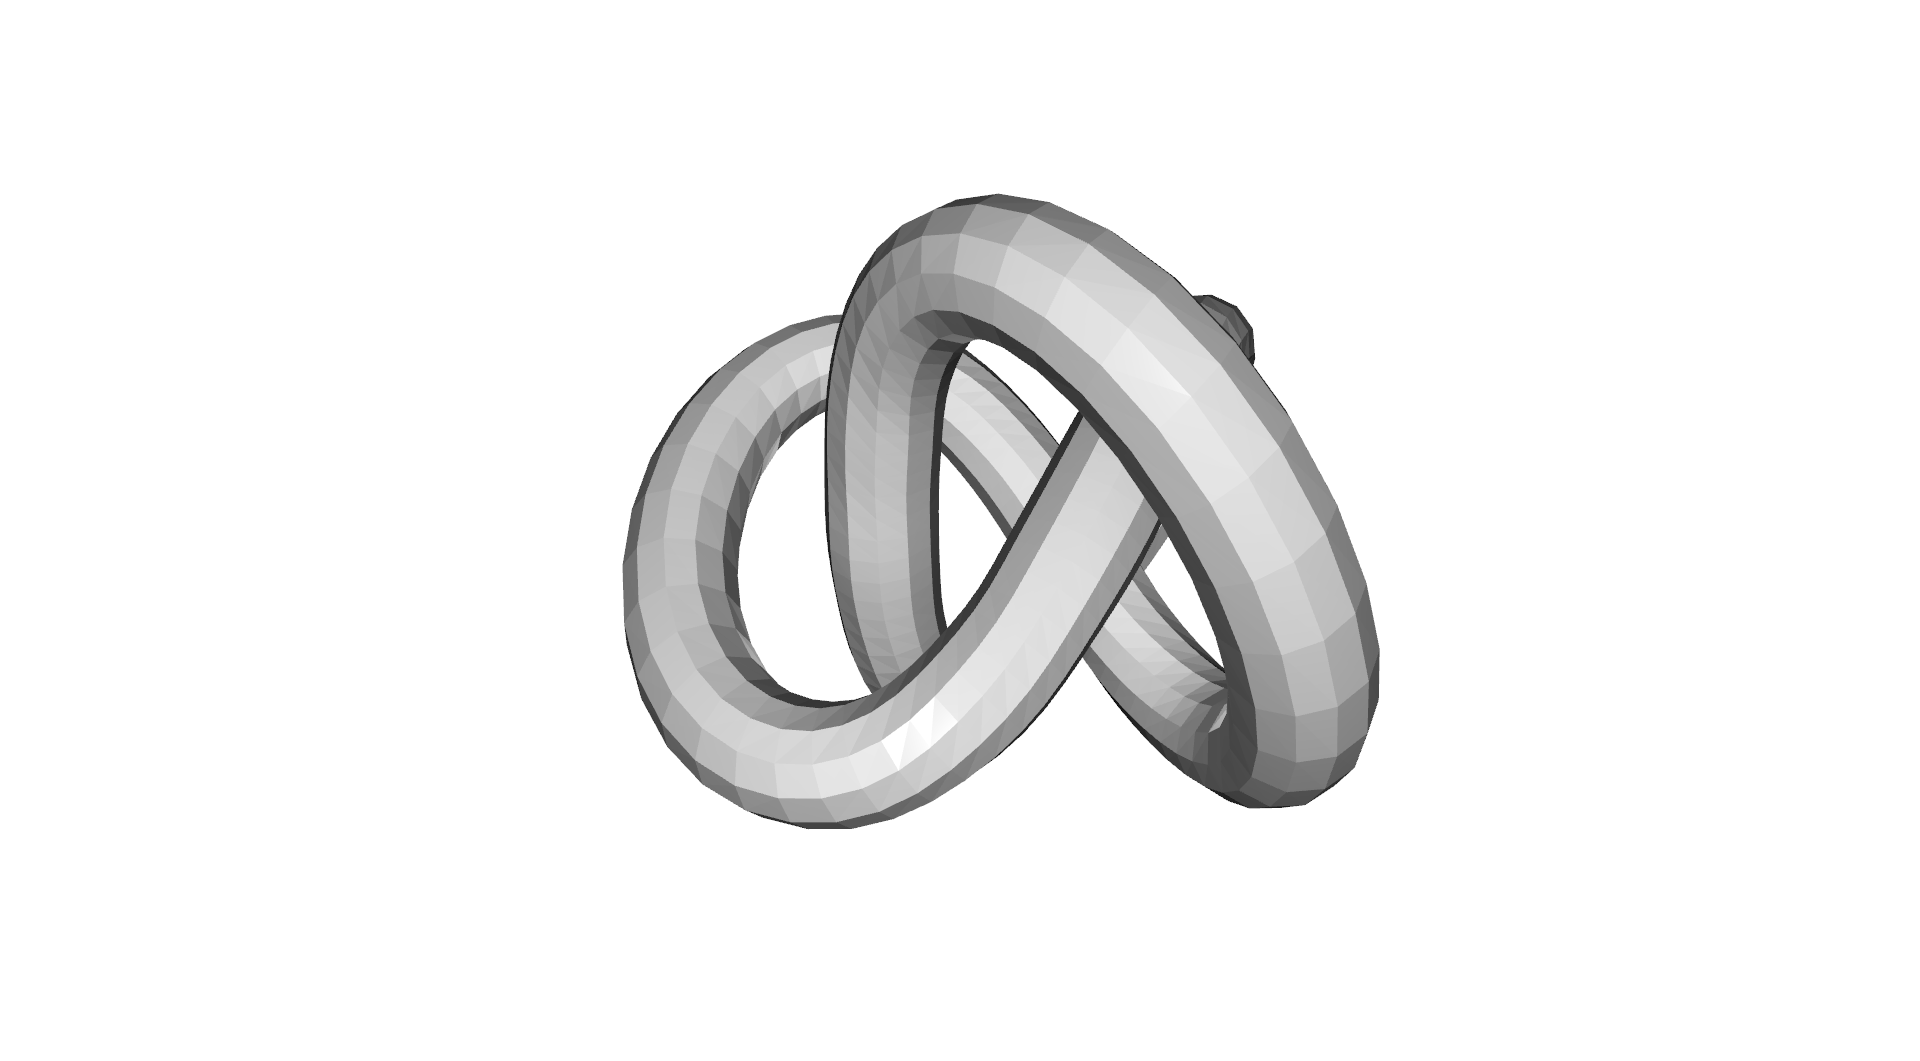

In [24]:
print('filter with average with 5 iterations')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=5)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

### Laplacian
Another important mesh filter is the Laplacian defined as
$$
v_i = v_i \cdot \lambda \sum_{n \in N} w_n v_n - v_i
$$
where $\lambda$ is the strength of the filter and $w_n$ are normalized weights that relate to the distance of the neighboring vertices. The filter is implemented in **filter_smooth_laplacian** and has the parameters **number_of_iterations** and **lambda**.

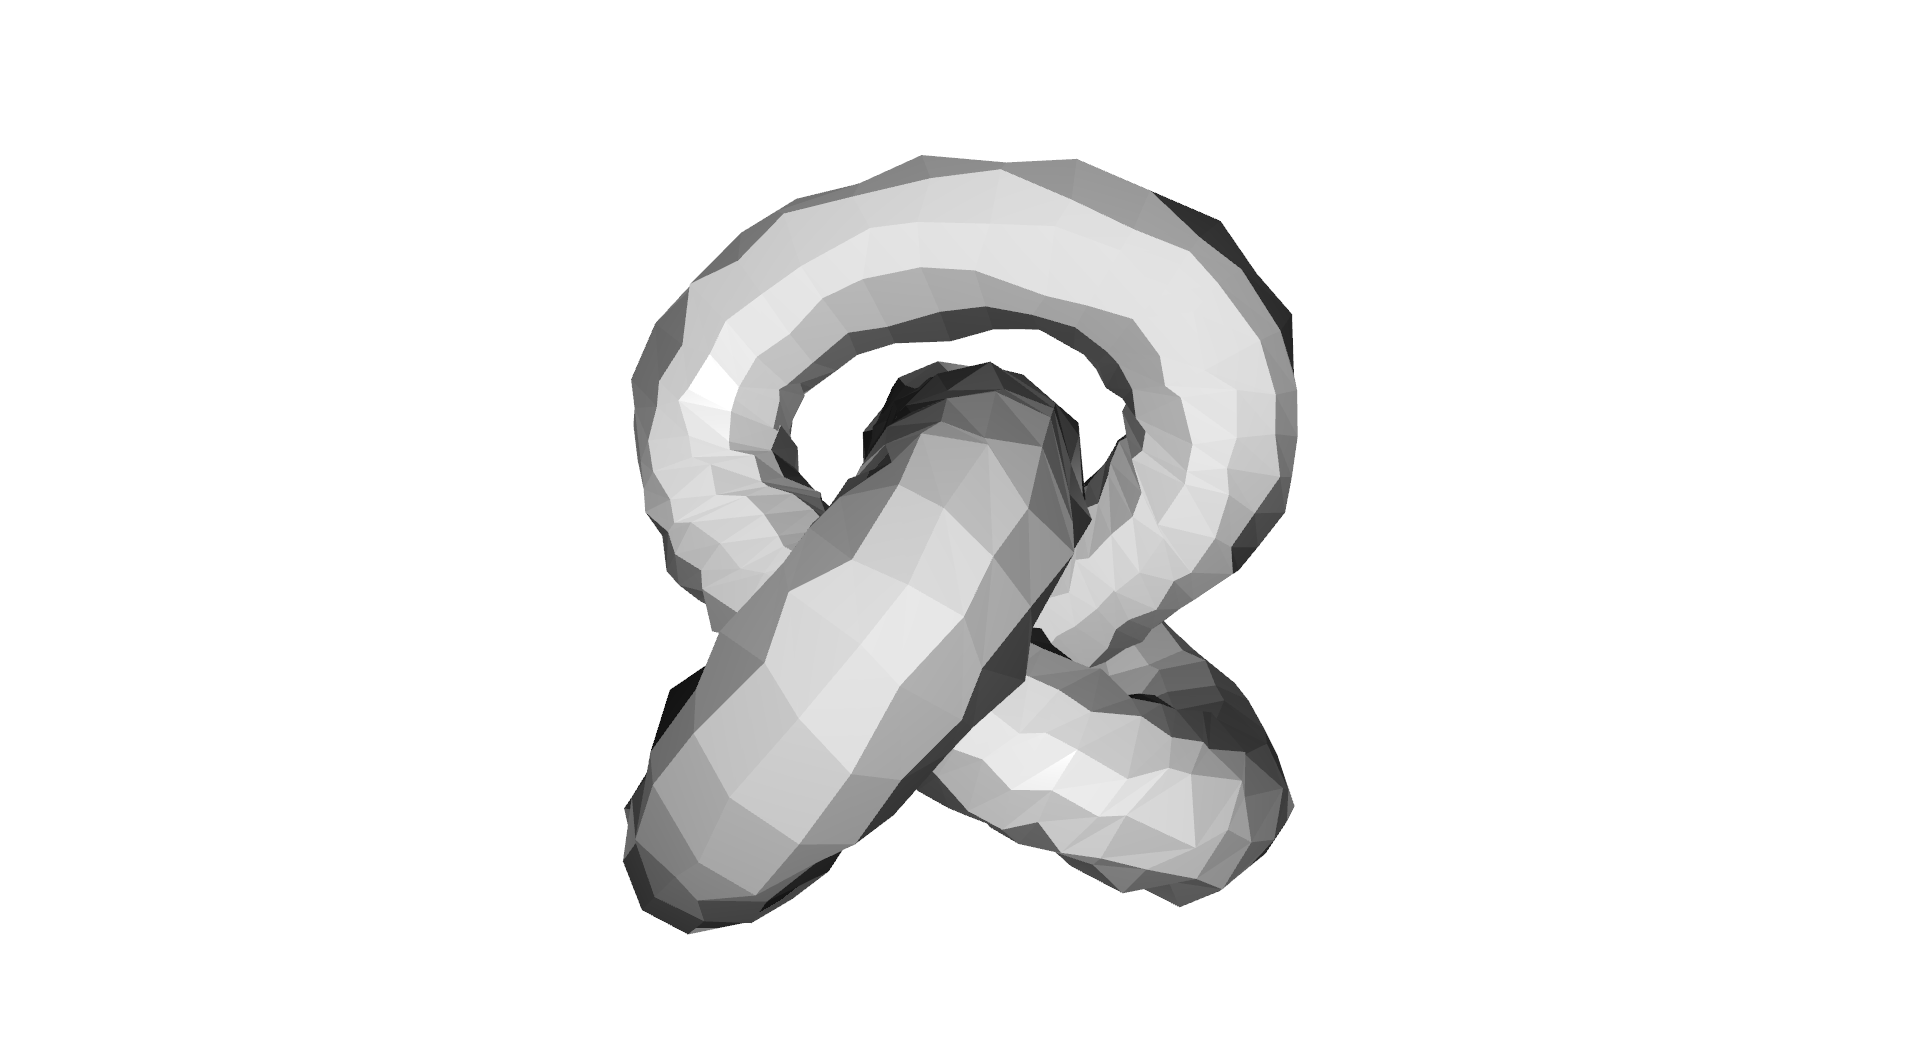

filter with Laplacian with 10 iterations


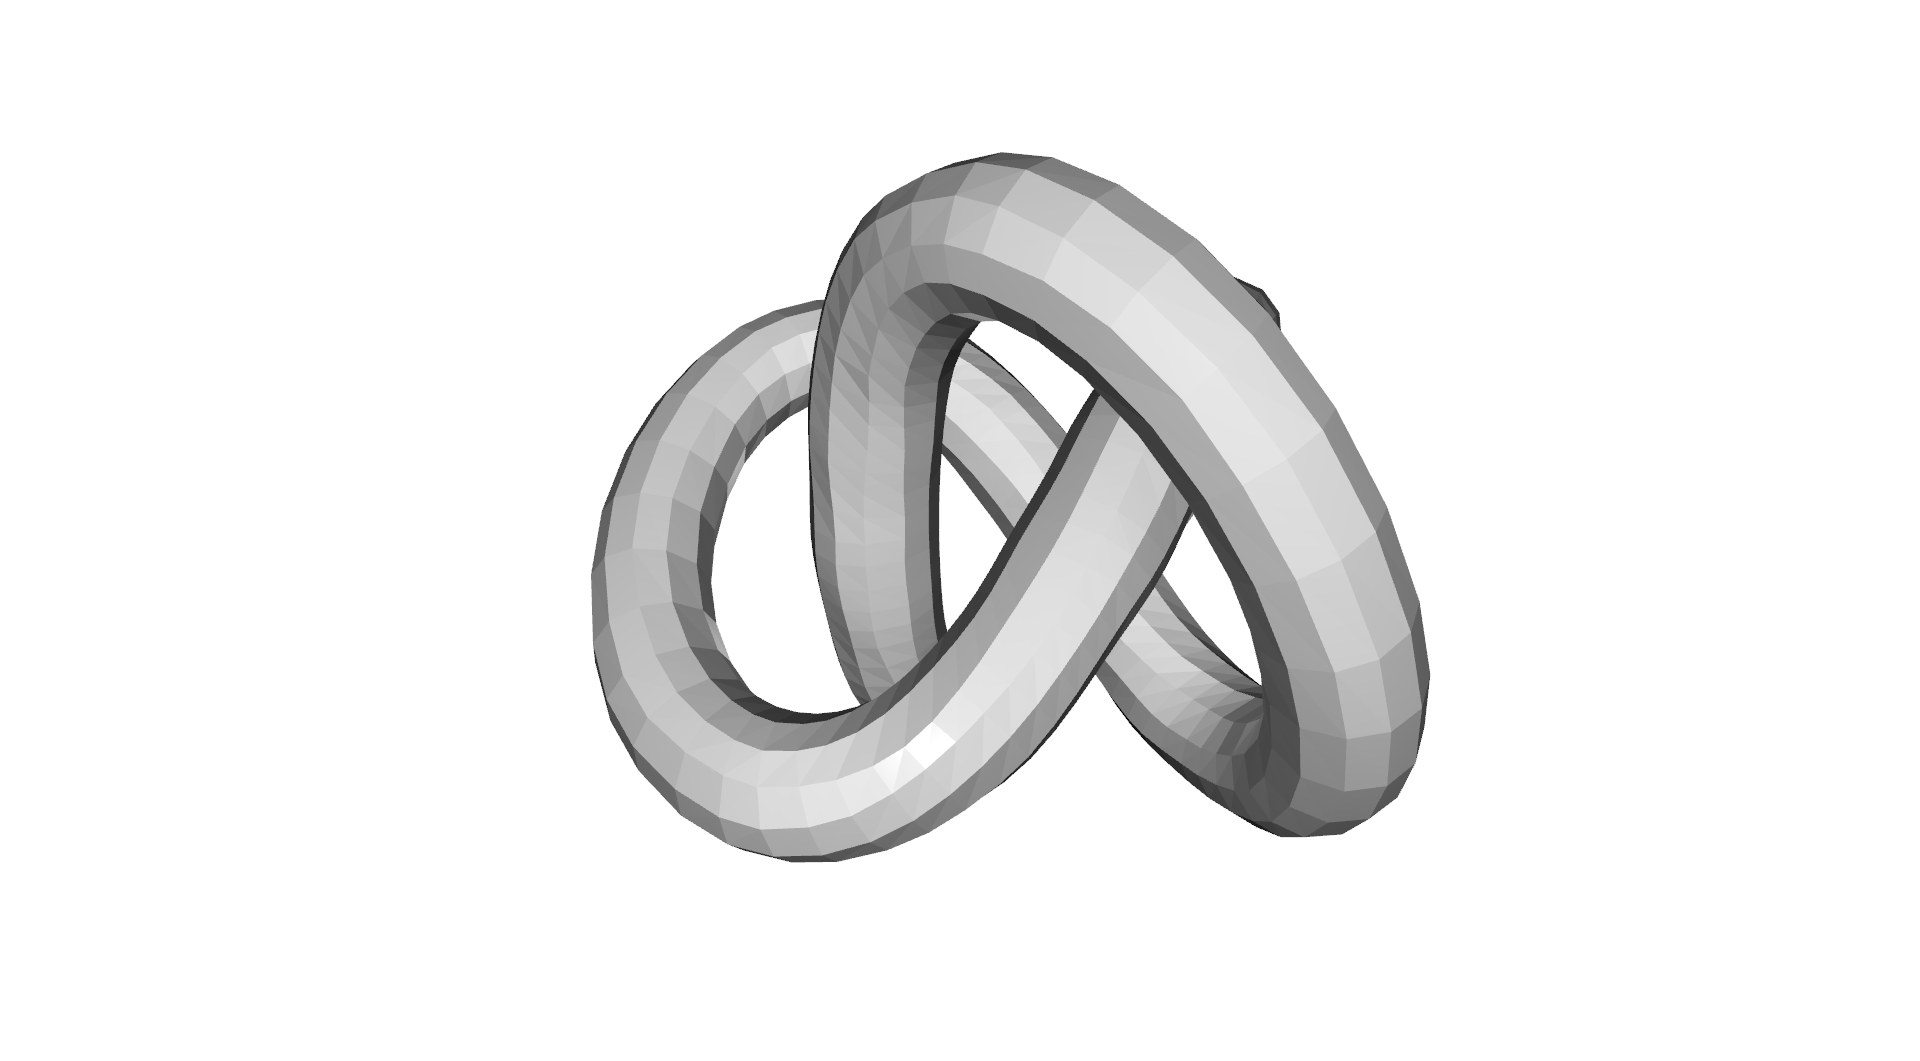

In [28]:
o3d.visualization.draw_geometries([mesh_in])
print('filter with Laplacian with 10 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

filter with Laplacian with 50 iteration


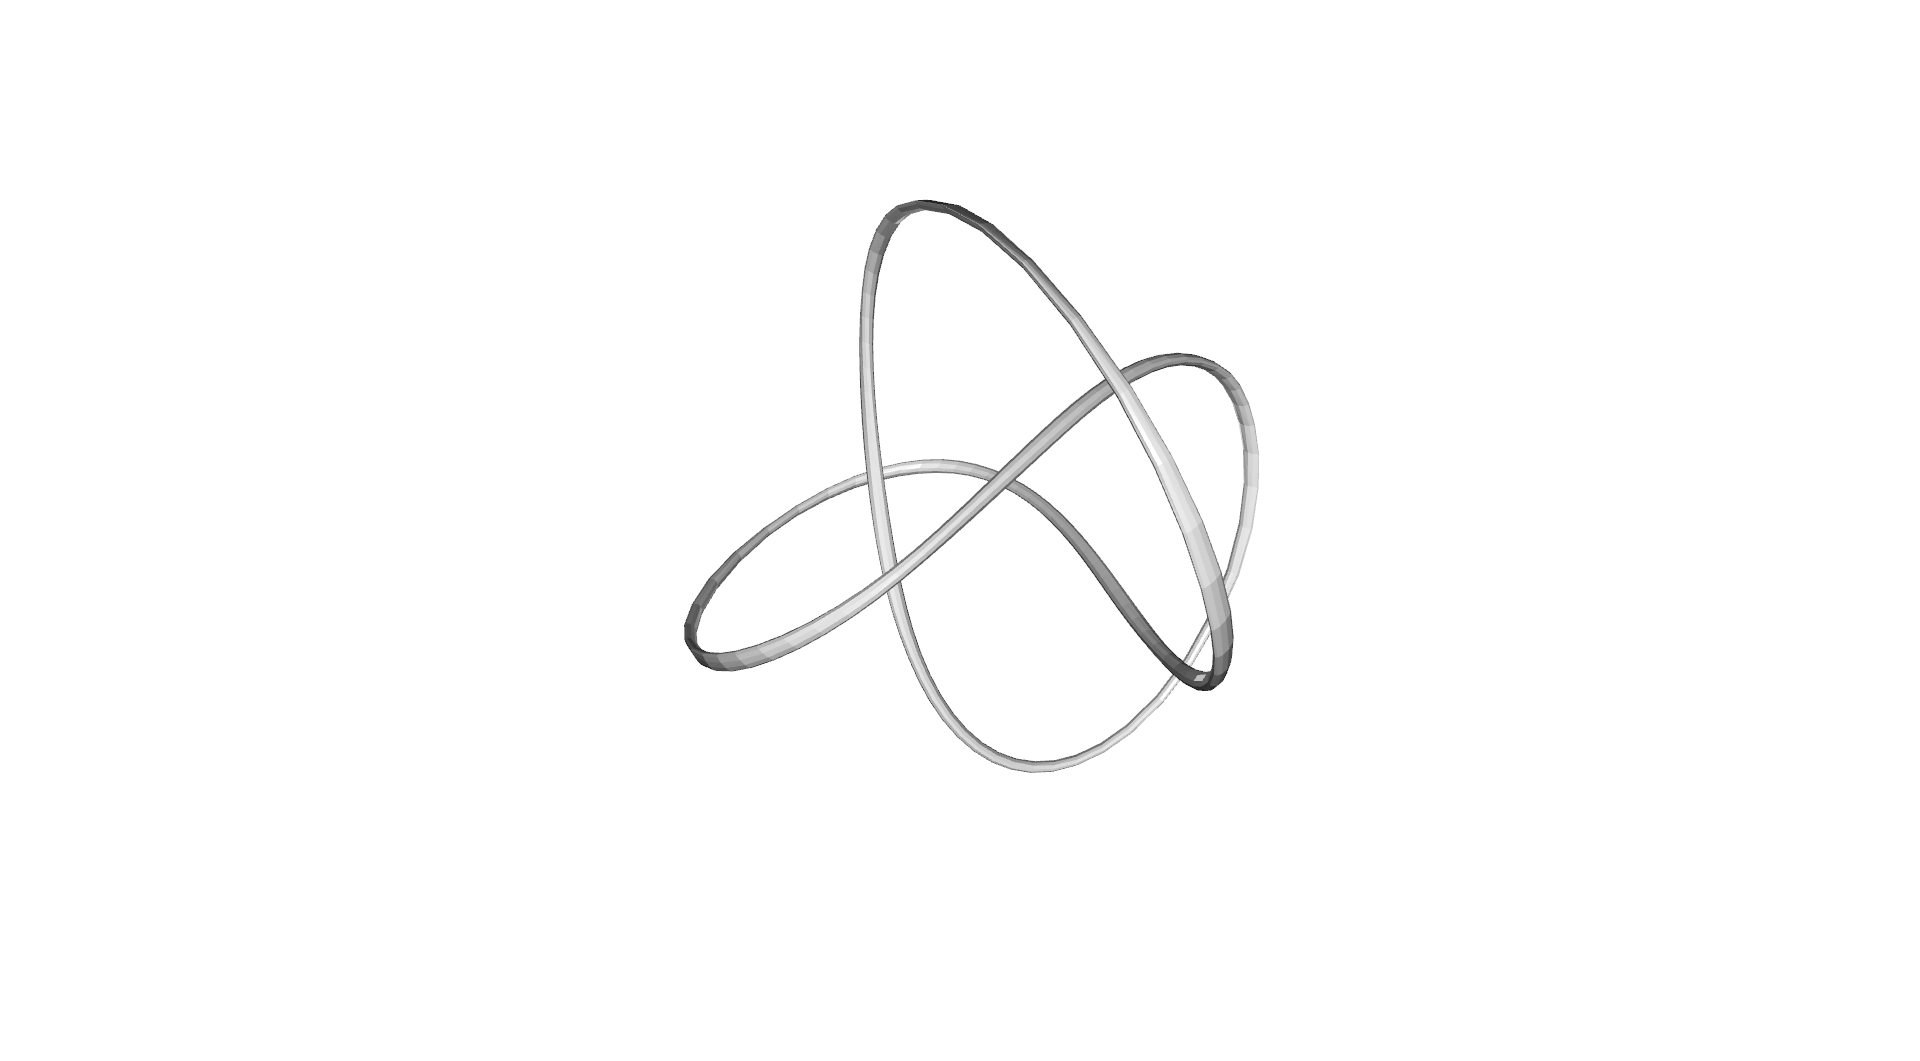

In [30]:
print('filter with Laplacian with 50 iteration')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=50)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

### Taubin filter
The problem with the average and Laplacian filter is that they lead to a shrinkage of the triangle mesh. Taulin(1995) showed that the application of two Laplacian filters with different $\lambda$ parameters can prevent the mesh shrinkage. The filter is implemented in **filter_smooth_taubin**.

filter with Taubin with 10 iterations


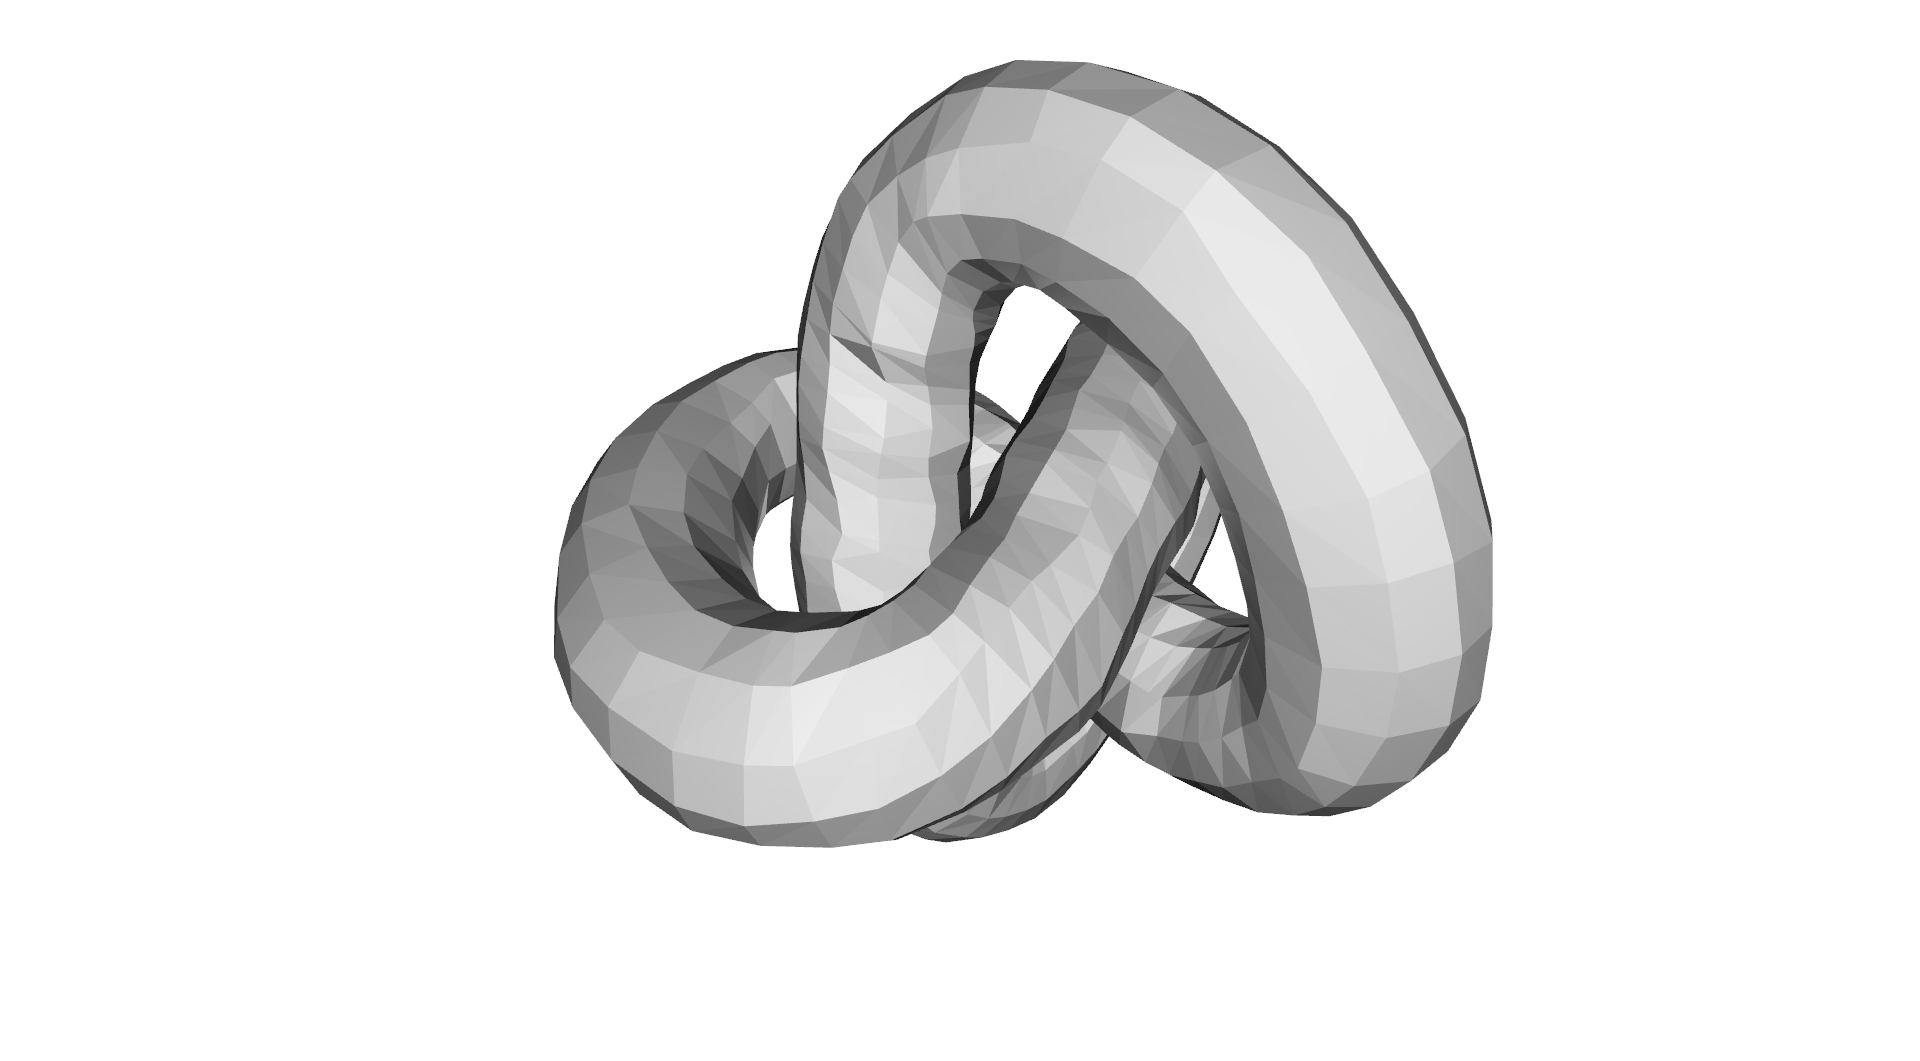

In [31]:
print('filter with Taubin with 10 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

filter with Taubin with 100 iterations


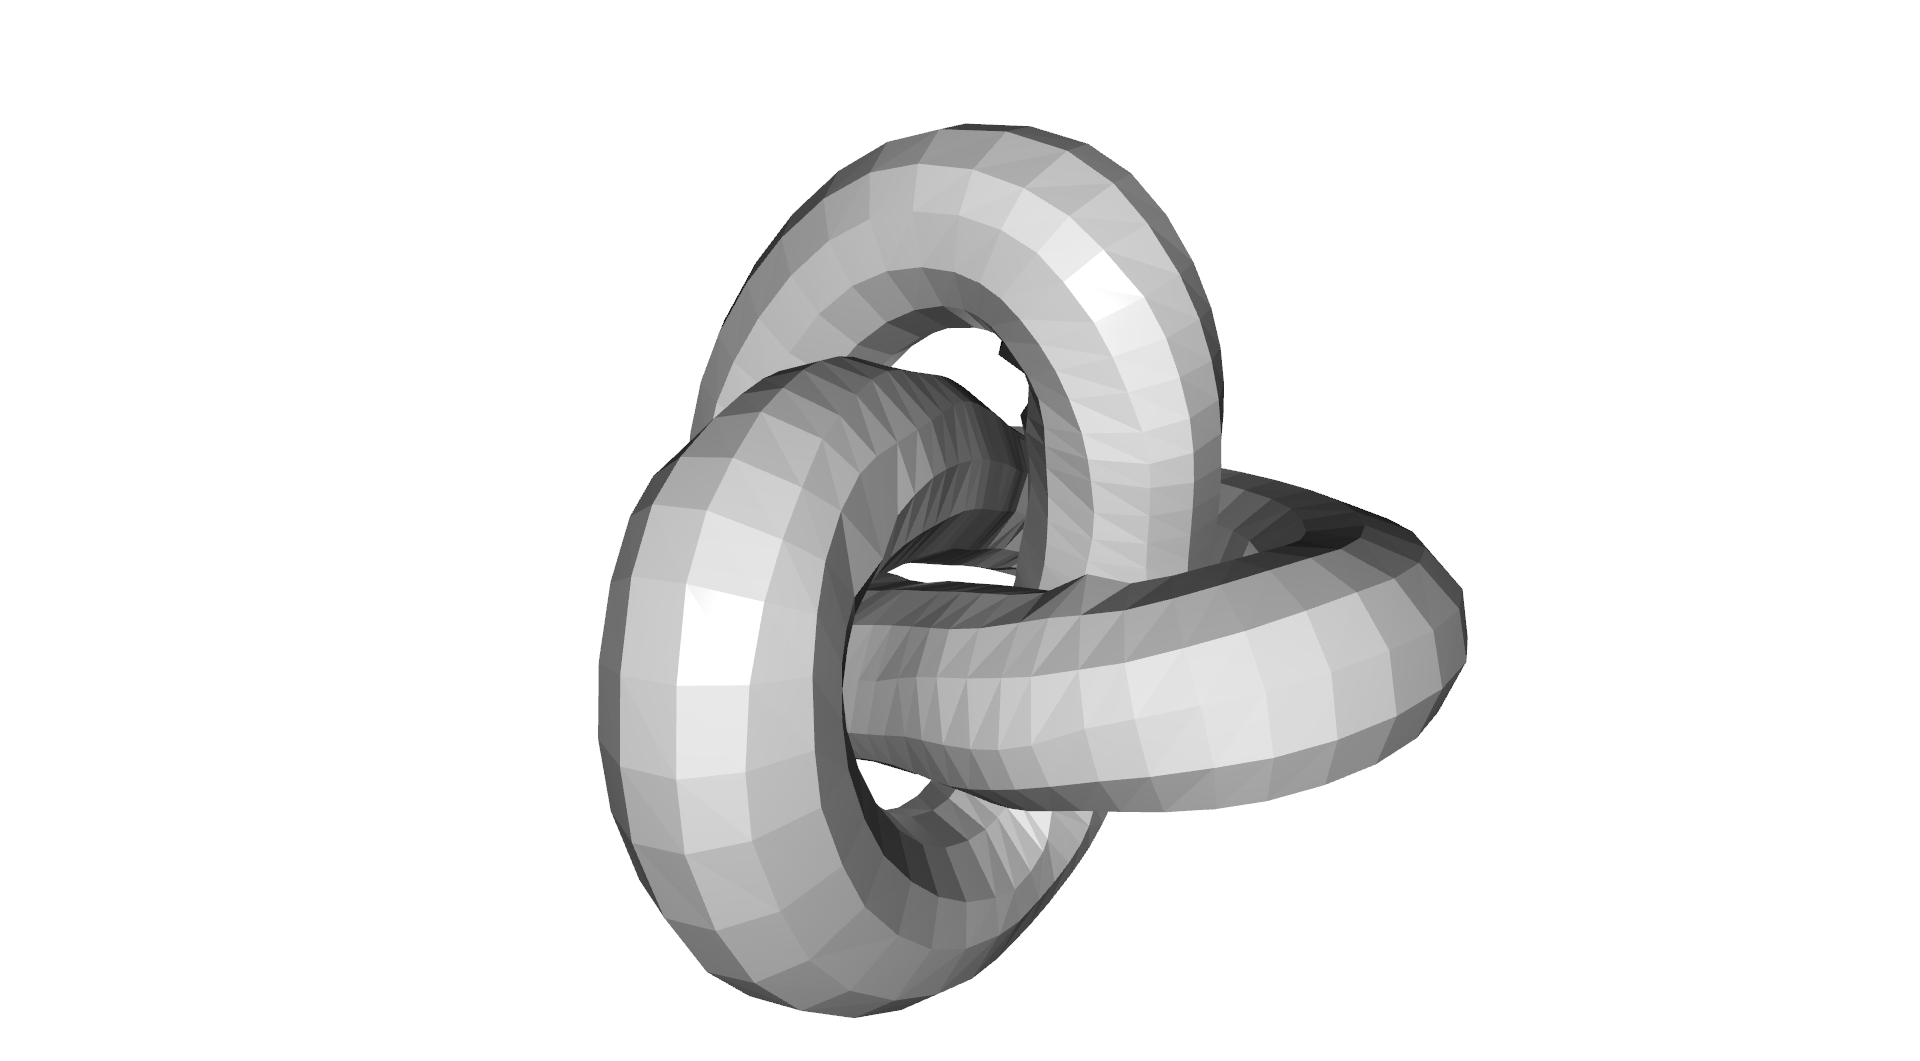

In [32]:
print('filter with Taubin with 100 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=100)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

### Sampling
Open3D includes functions to sample point clouds from a triangle mesh. The simplest method is **sample_points_uniformly** that uniformly samples points from the 3D surface based on the triangle area. The parameter **number_of_points** defines how many points are sampled from the triangle surface.

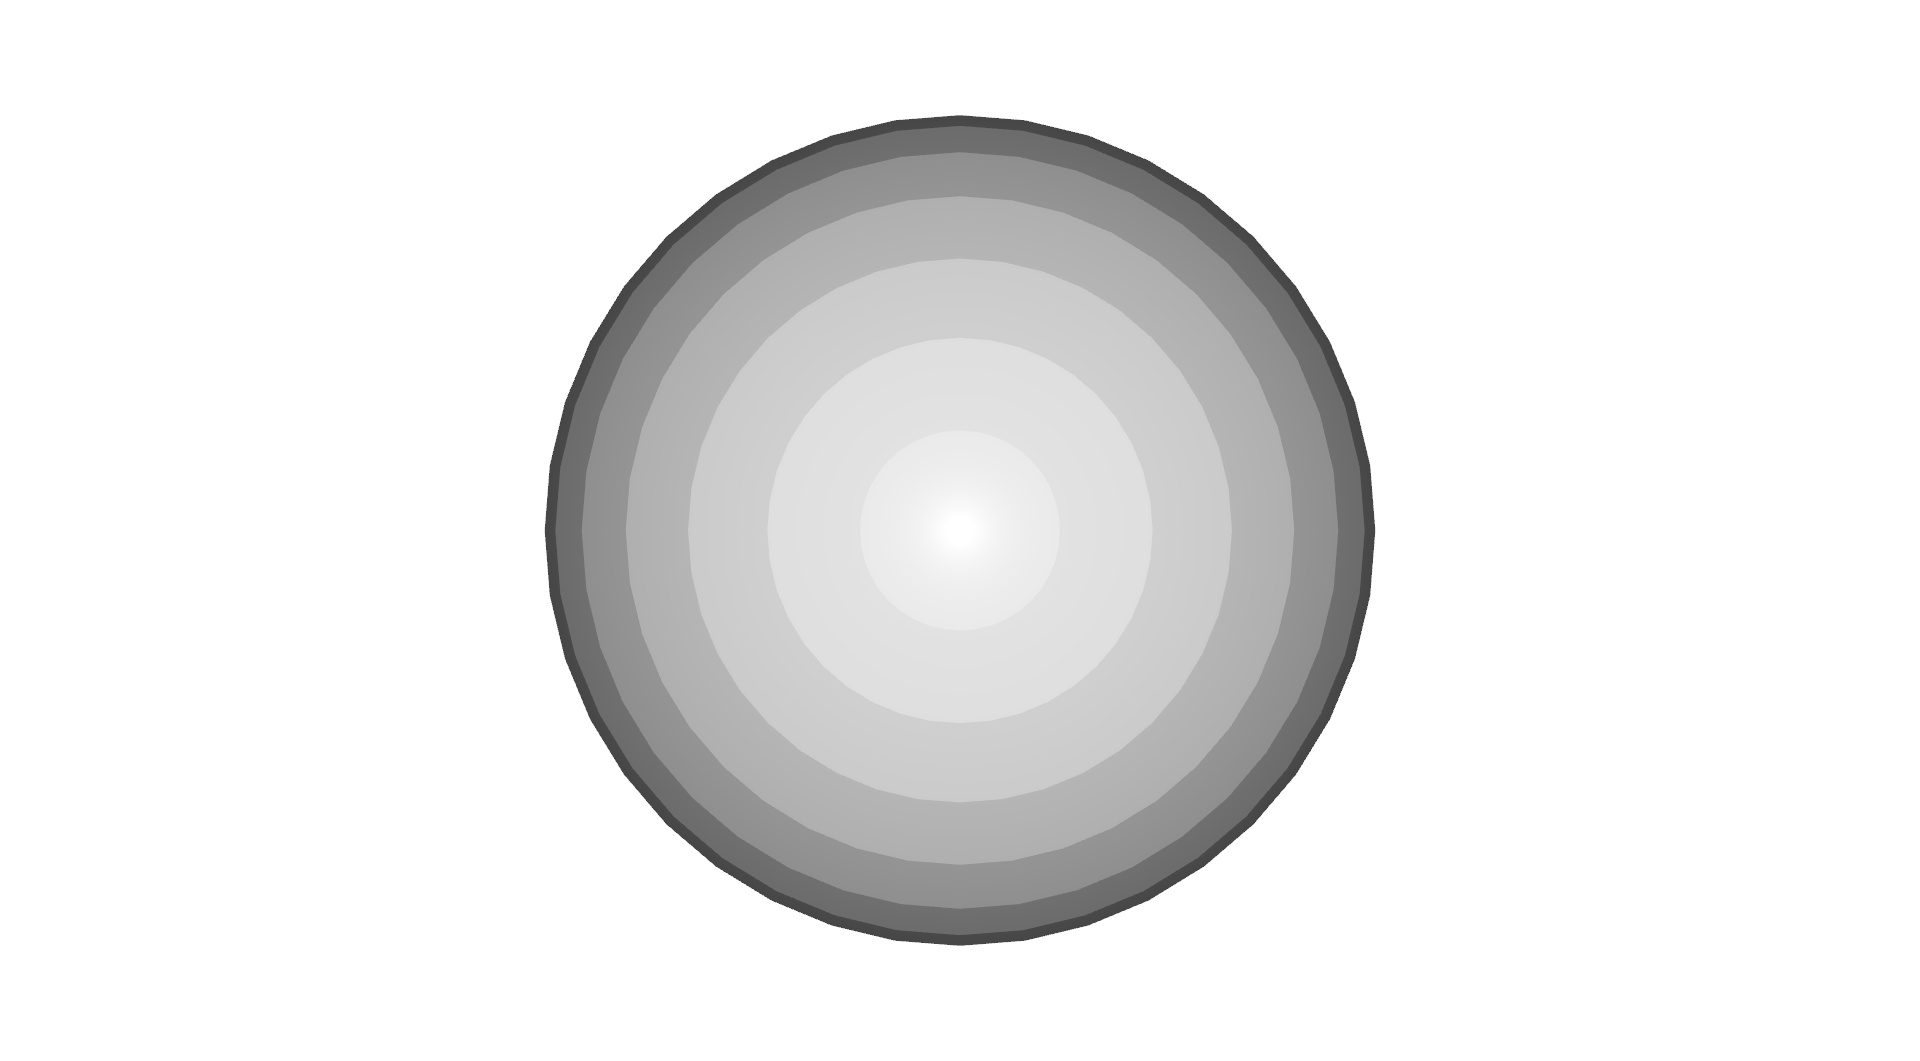

<class 'open3d.cpu.pybind.geometry.PointCloud'>


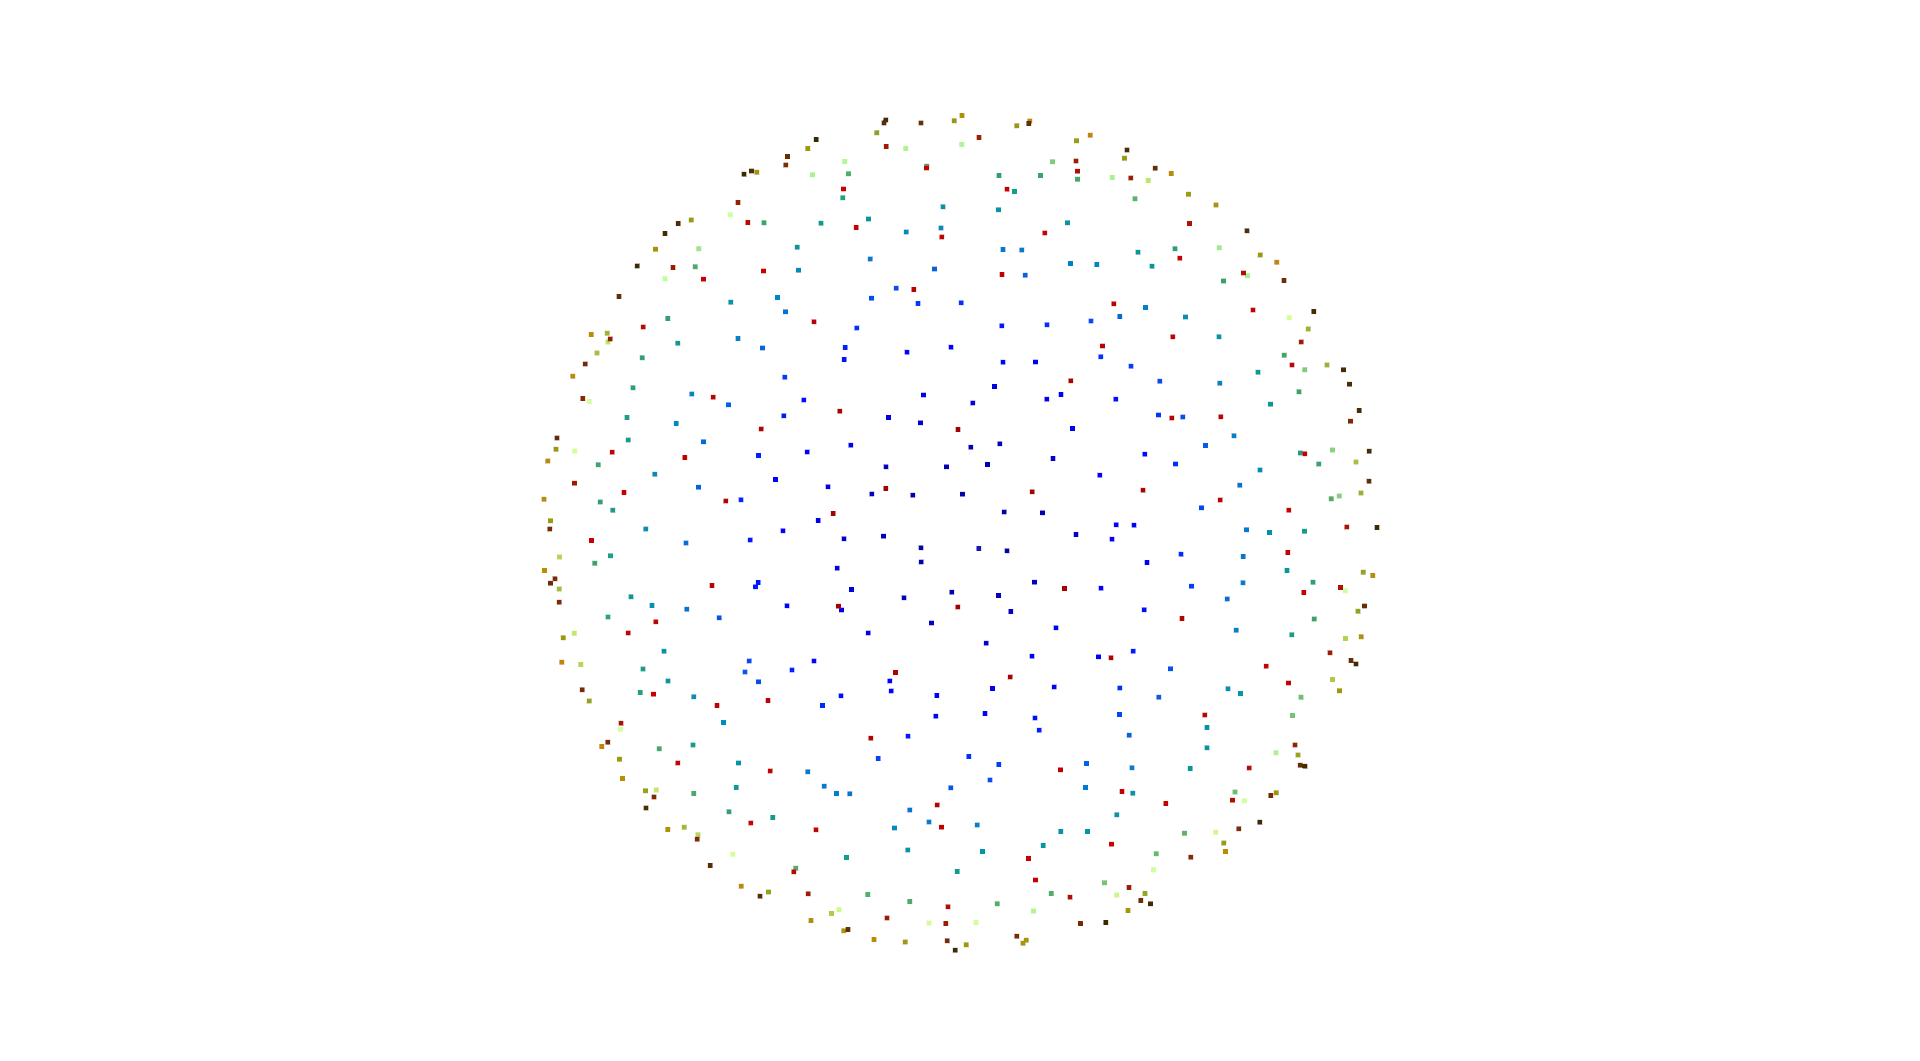

In [42]:
mesh = o3d.geometry.TriangleMesh.create_sphere()
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=500)
print(type(pcd))
o3d.visualization.draw_geometries([pcd])

In [48]:
import pyvista as pv
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(point_cloud)
# downpcd = pcd.voxel_down_sample(voxel_size=0.2)
downsampled_point_cloud = np.asarray(pcd.points)
cloud = pv.PolyData(downsampled_point_cloud).extract_geometry().triangulate()
volume = cloud.delaunay_3d(alpha=.3)
#volume.save("sphere_ds.vtk")
#pv.save_meshio('sphere_ds.stl', volume)
pv.save_meshio('sphere_ds.ply', volume)
volume.plot(notebook=False)
# mesh_sample = o3d.geometry.TriangleMesh.create()
# mesh_sample.points = o3d.utility.Vector3dVector(np.asarray(pcd.points))
# mesh_sample.compute_vertex_normals()
# o3d.visualization.draw_geometries([mesh_sample])

# pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=30))
# o3d.visualization.draw_geometries([pcd])

"""
# Estimate normals of points
xyz.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=30)) # radius to fit the data
o3d.visualization.draw_geometries([xyz])

# Creat the mesh
radii = [0.75, 1]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(xyz, o3d.utility.DoubleVector(radii))

# Write the mesh
o3d.io.write_triangle_mesh("my_point.ply", rec_mesh)

# plot the mesh
o3d.visualization.draw_geometries([rec_mesh])
"""


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\meshio\ply\_ply.py:461: UserWarning: PLY doesn't support 64-bit integers. Casting down to 32-bit.
  "PLY doesn't support 64-bit integers. Casting down to 32-bit."
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\meshio\ply\_ply.py:488: UserWarning: cell_type "{}" is not supported by ply format - skipping
  'cell_type "{}" is not supported by ply format - skipping'


'\n# Estimate normals of points\nxyz.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=30)) # radius to fit the data\no3d.visualization.draw_geometries([xyz])\n\n# Creat the mesh\nradii = [0.75, 1]\nrec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(xyz, o3d.utility.DoubleVector(radii))\n\n# Write the mesh\no3d.io.write_triangle_mesh("my_point.ply", rec_mesh)\n\n# plot the mesh\no3d.visualization.draw_geometries([rec_mesh])\n'

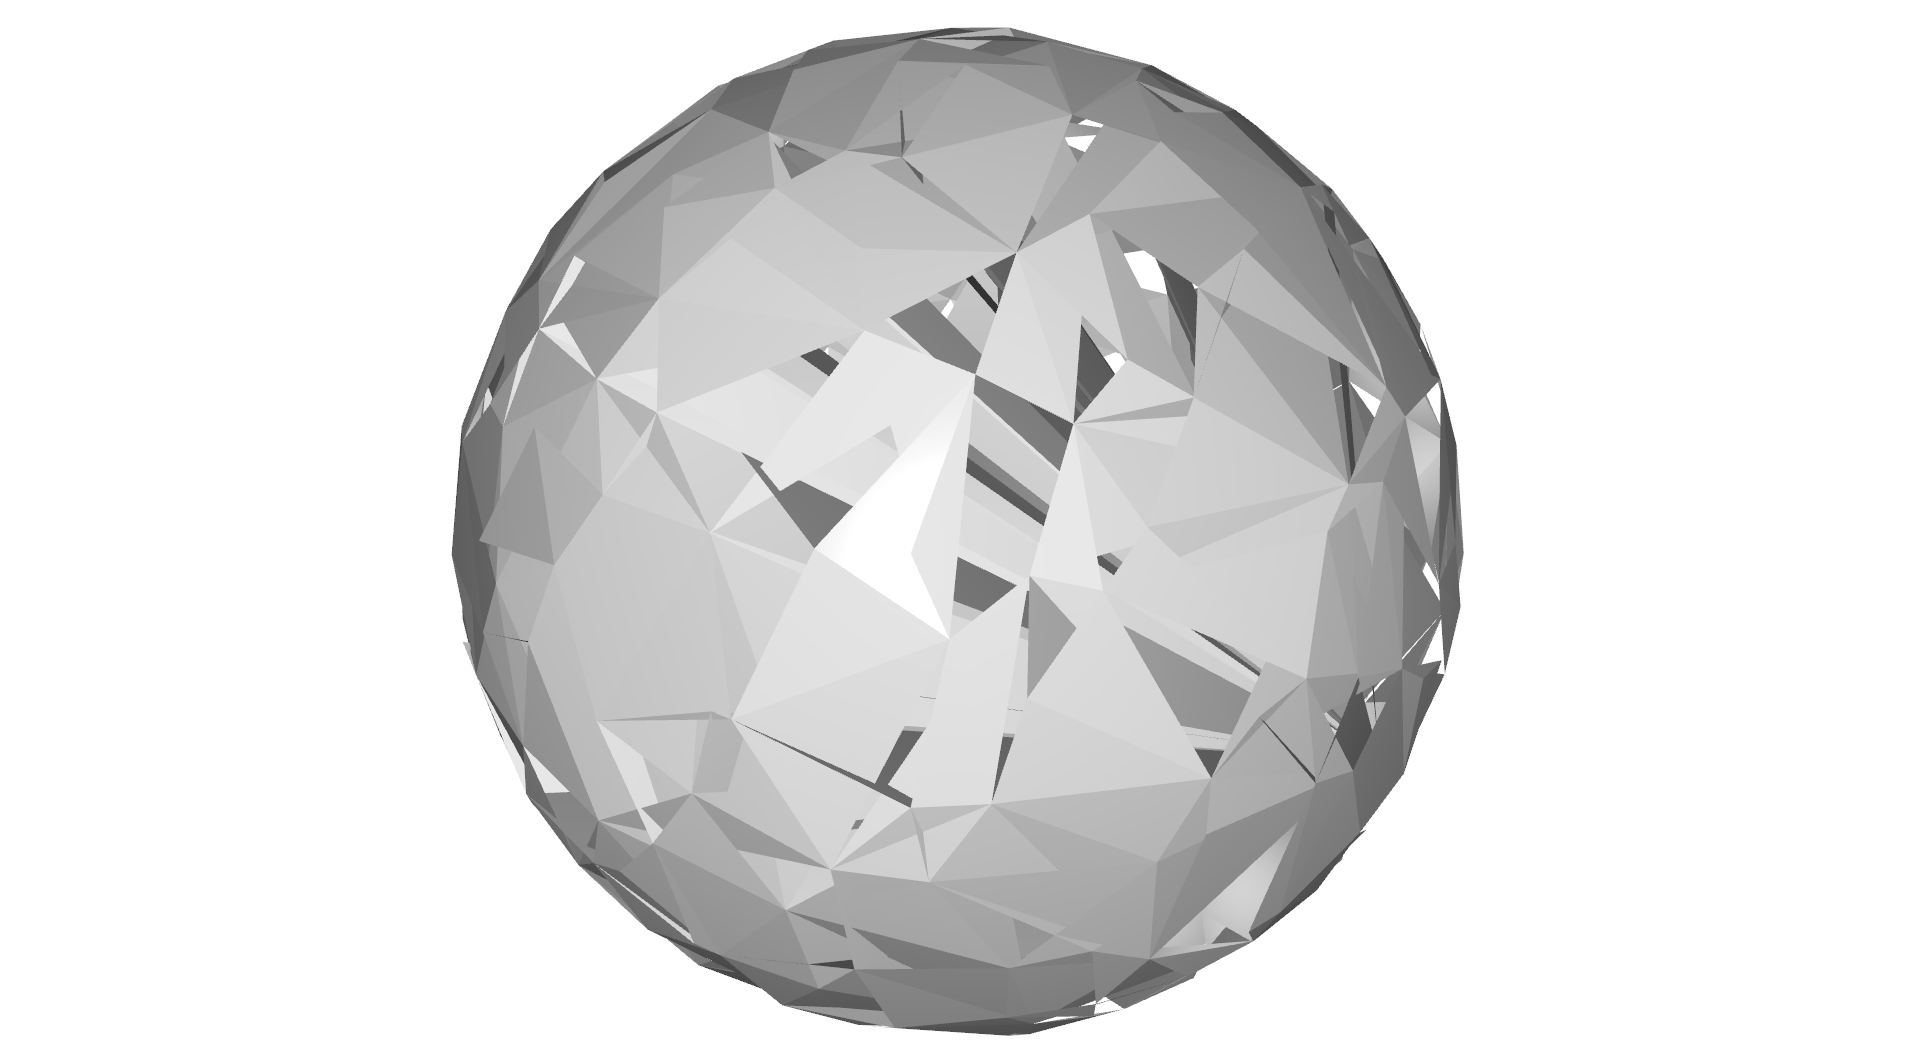

In [49]:
sphere_ds = o3d.io.read_triangle_mesh("sphere_ds.ply")
sphere_ds.compute_vertex_normals()
o3d.visualization.draw_geometries([sphere_ds])

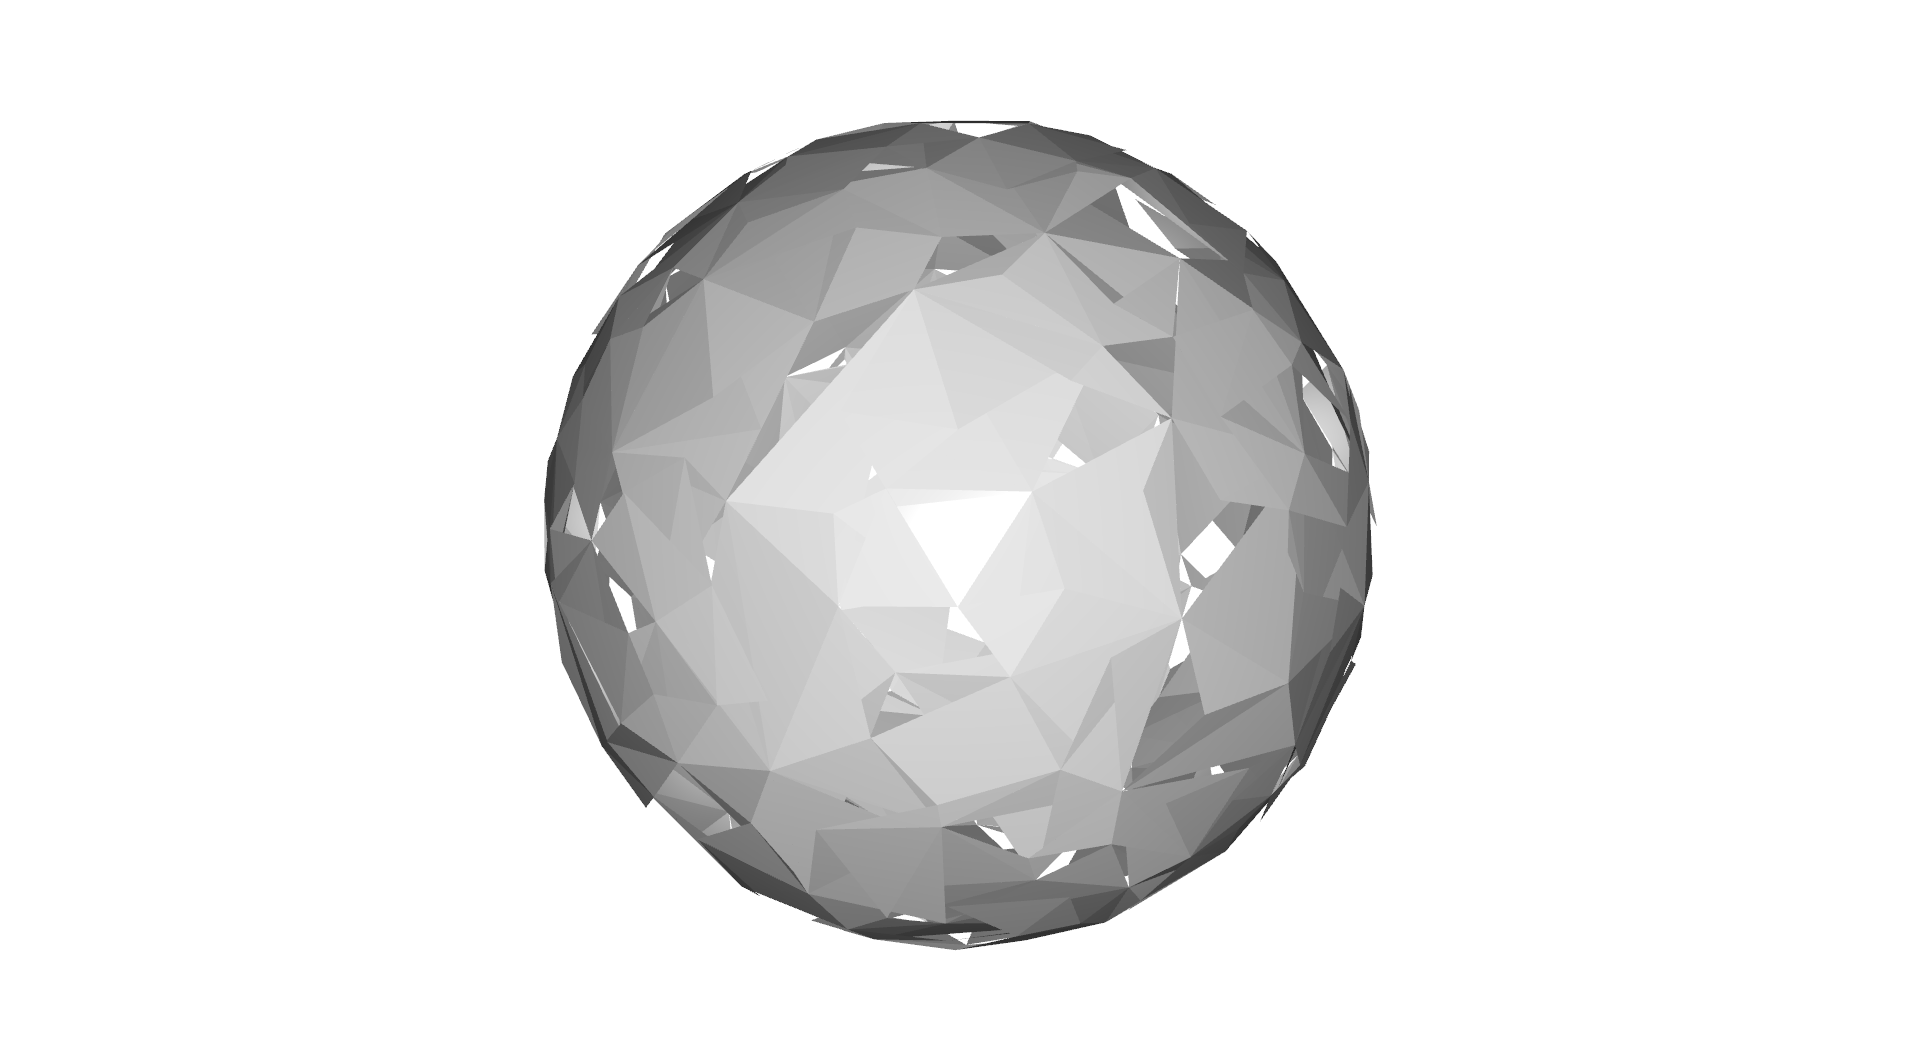

In [51]:
sphere_ds = o3d.io.read_triangle_mesh("sphere_ds.stl")
sphere_ds.compute_vertex_normals()
o3d.visualization.draw_geometries([sphere_ds])

## [Surface reconstruction](http://www.open3d.org/docs/release/tutorial/geometry/surface_reconstruction.html)
### [Alpha shapes](http://www.open3d.org/docs/release/tutorial/geometry/surface_reconstruction.html)

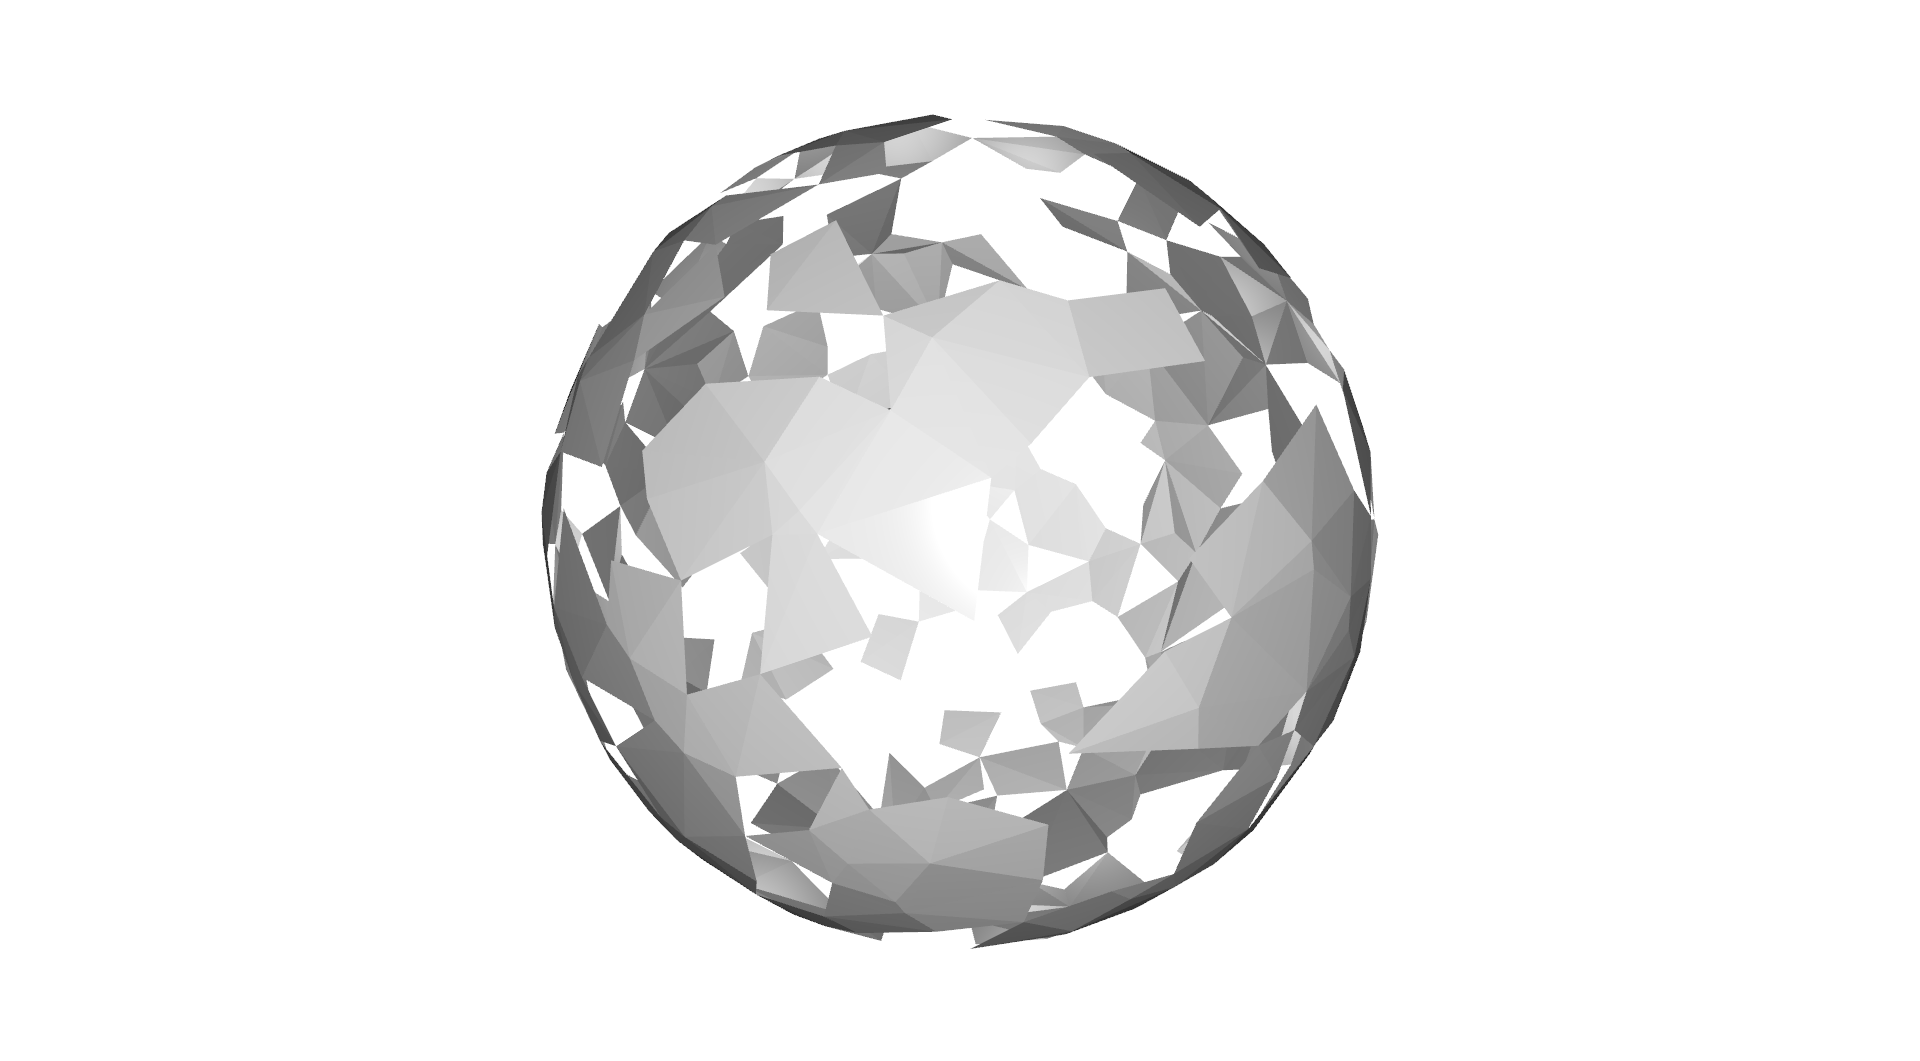

In [54]:
alpha = 0.8
pcd_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
pcd_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([pcd_mesh], mesh_show_back_face=True)

### [Ball pivoting](http://www.open3d.org/docs/release/tutorial/geometry/surface_reconstruction.html)
**Best result!**

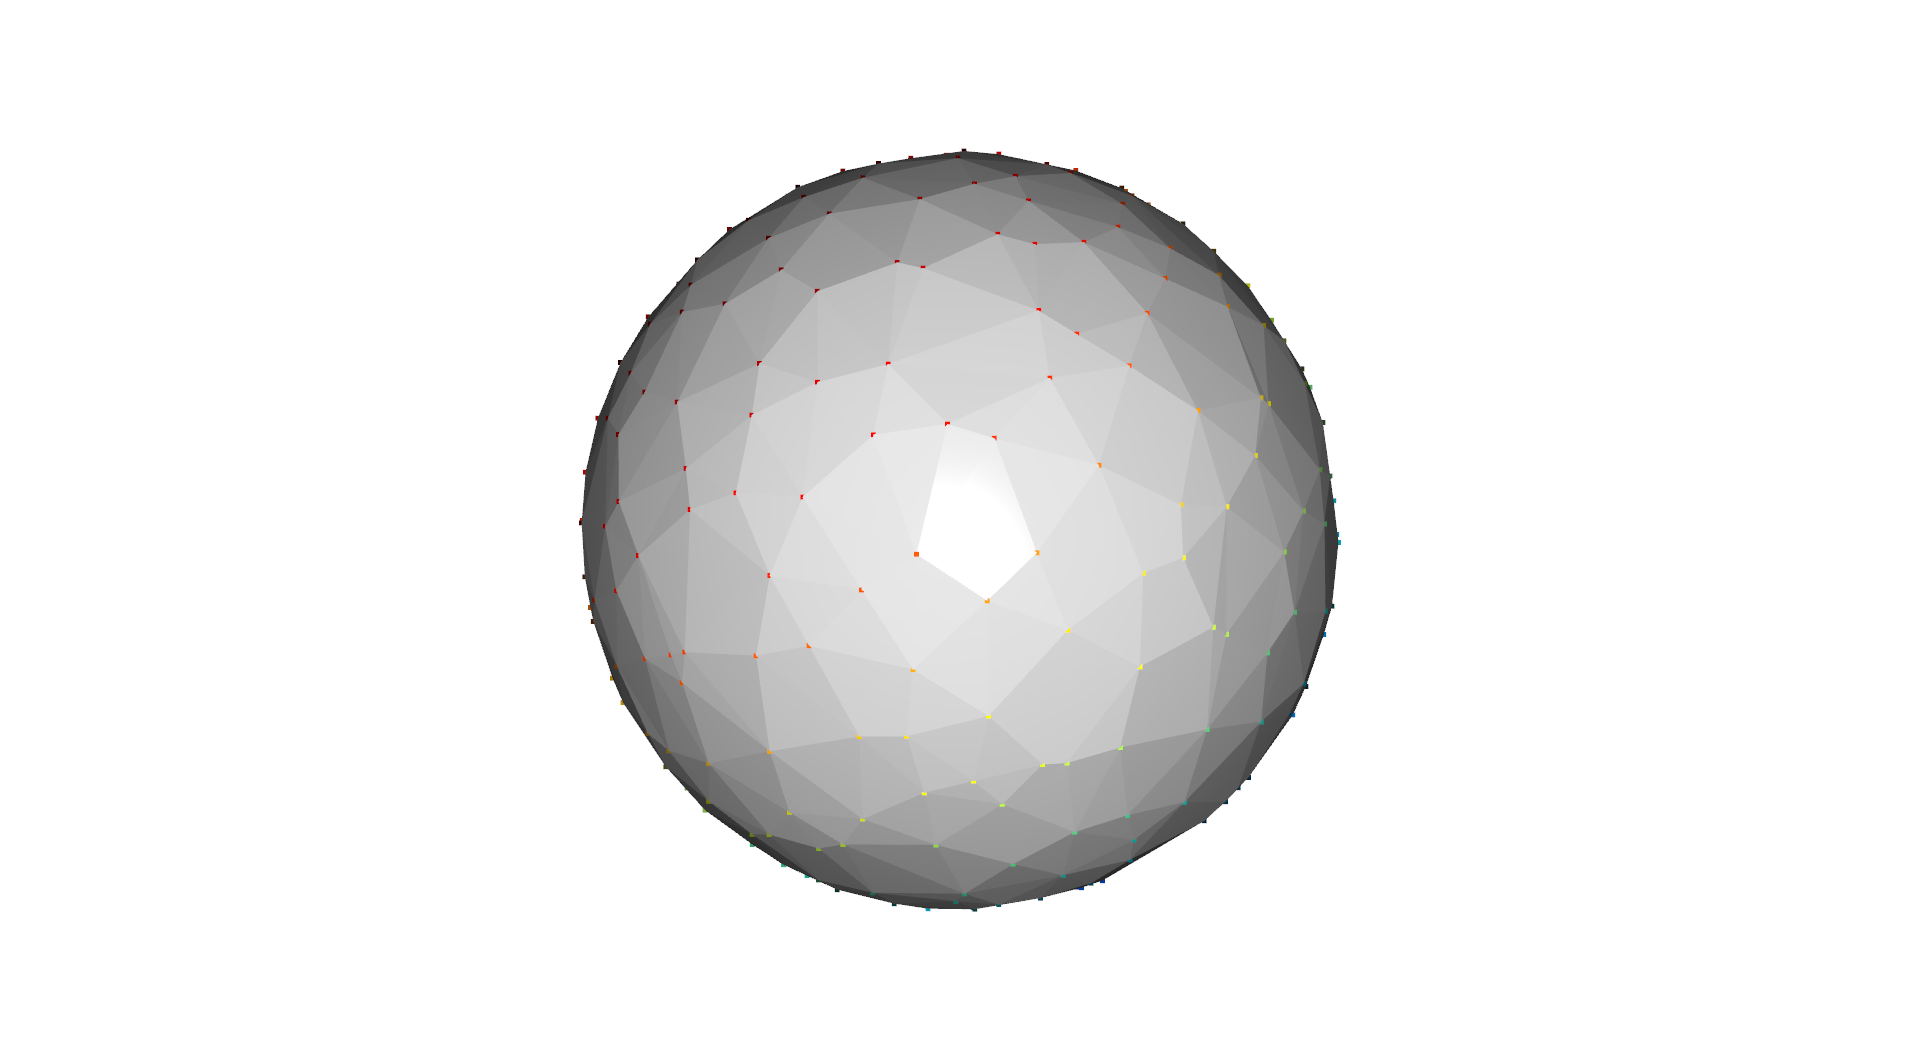

In [56]:
radii = [0.05, 0.1, 0.2, 0.4]
#radii = [0.005, 0.01, 0.02, 0.04]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([pcd, rec_mesh])

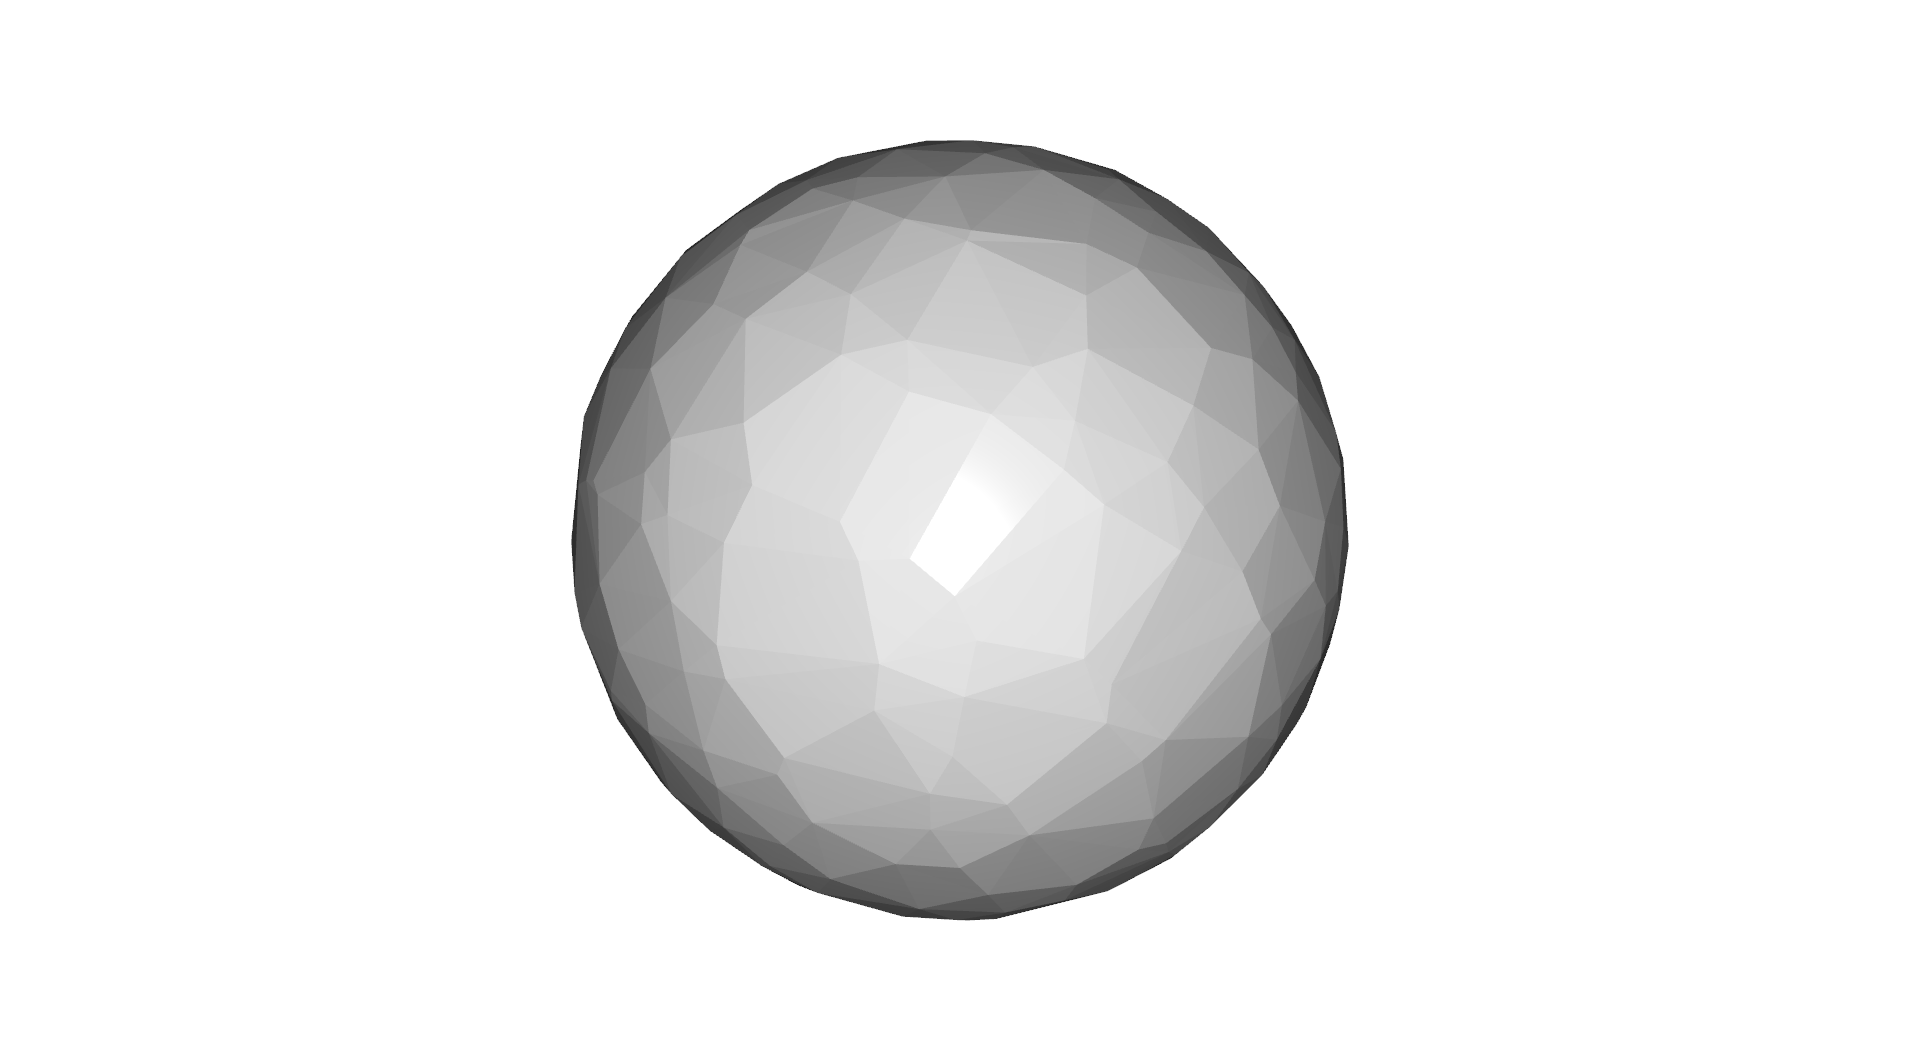

In [57]:
radii = [0.05, 0.1, 0.2, 0.4]
#radii = [0.005, 0.01, 0.02, 0.04]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([rec_mesh])

Writing and reading a mesh file in Open3D

In [58]:
o3d.io.write_triangle_mesh("sphere_ds2.ply", rec_mesh)

True

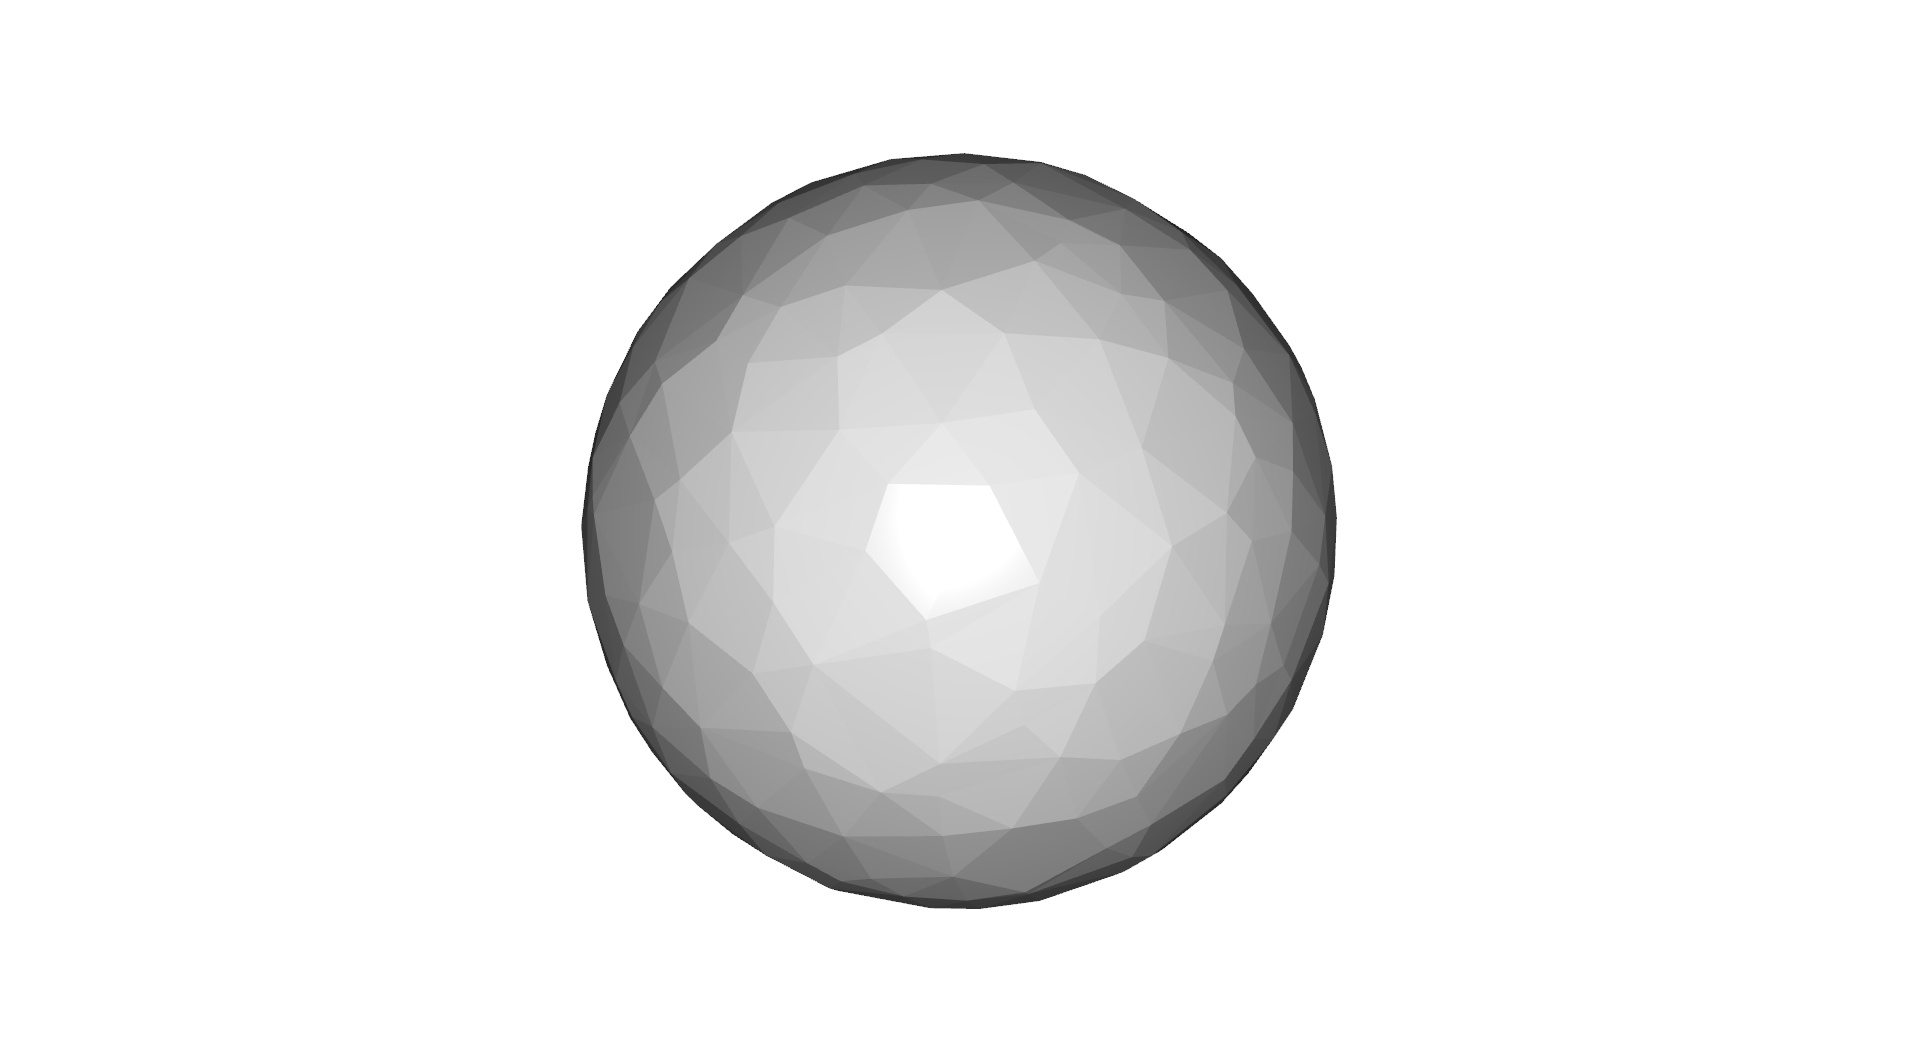

In [59]:
sphere_ds2 = o3d.io.read_triangle_mesh("sphere_ds2.ply")
sphere_ds2.compute_vertex_normals()
o3d.visualization.draw_geometries([sphere_ds2])

#### Bunny example for sampling

downloading bunny mesh
extract bunny mesh


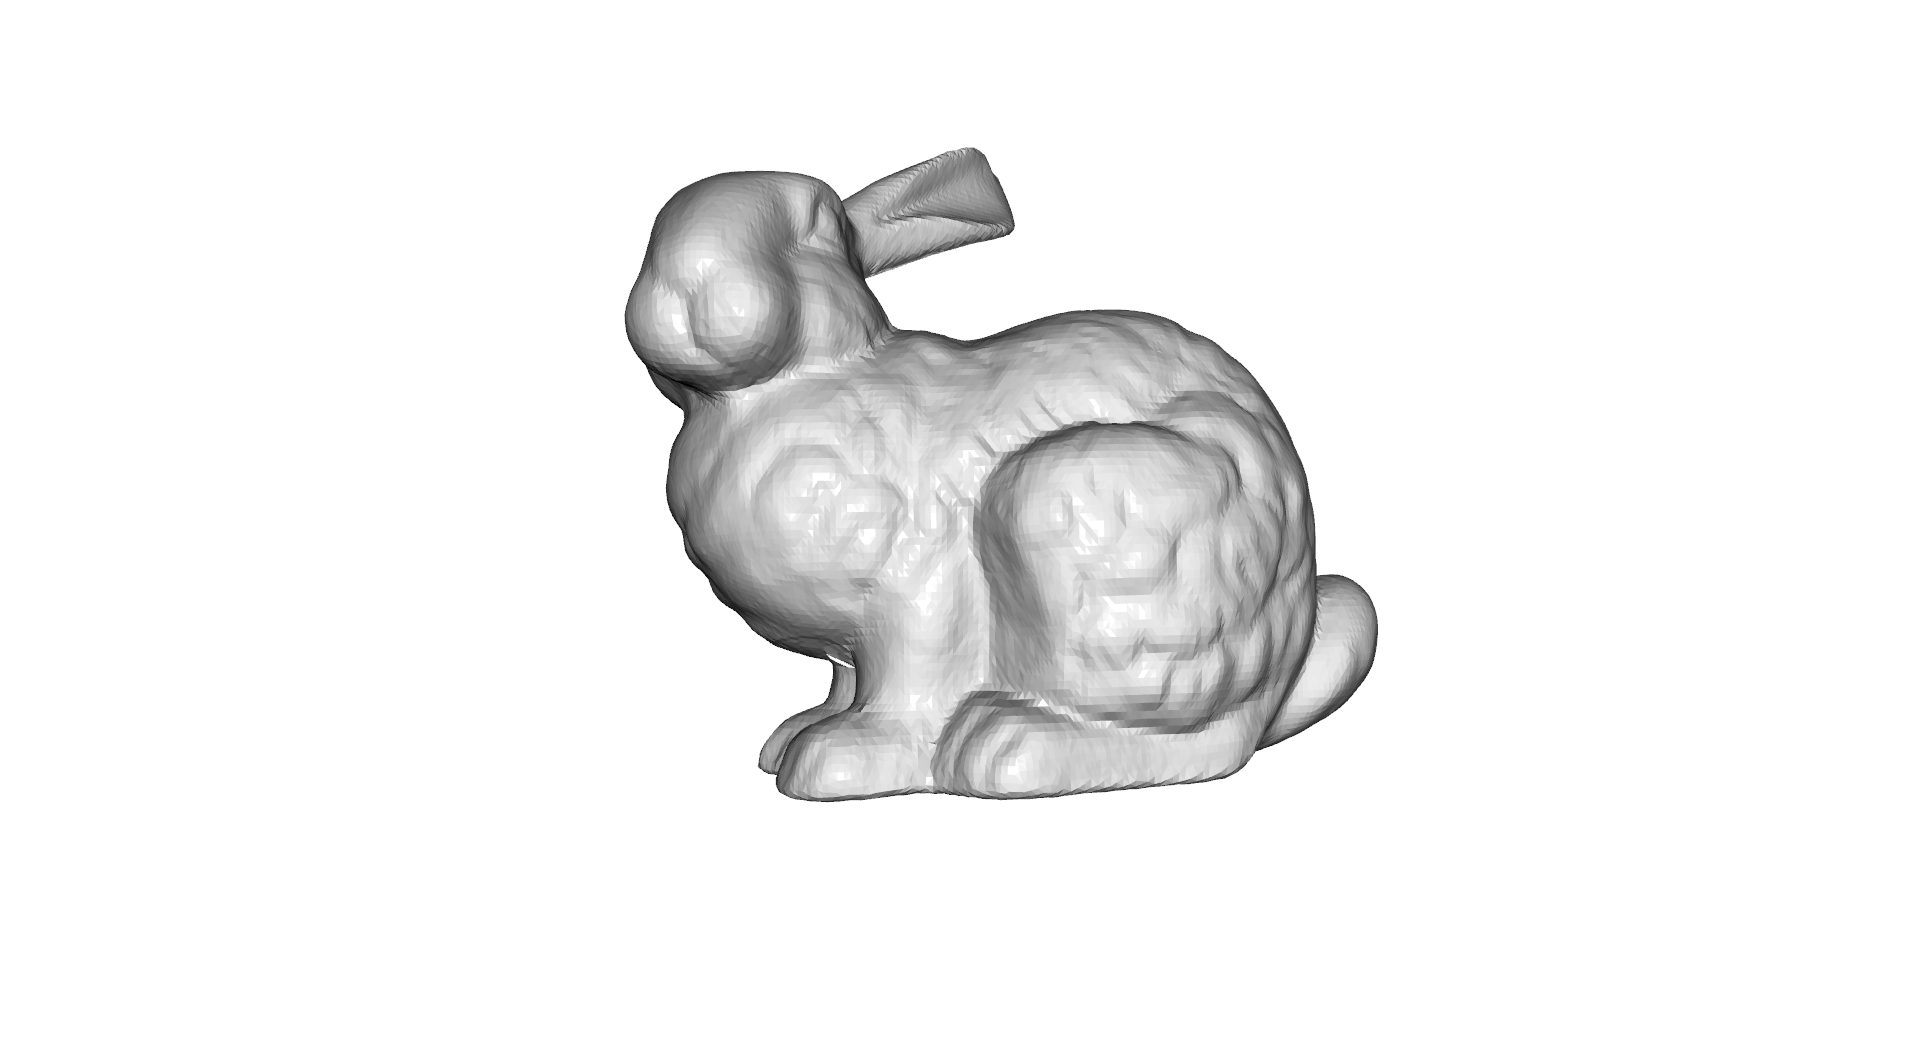

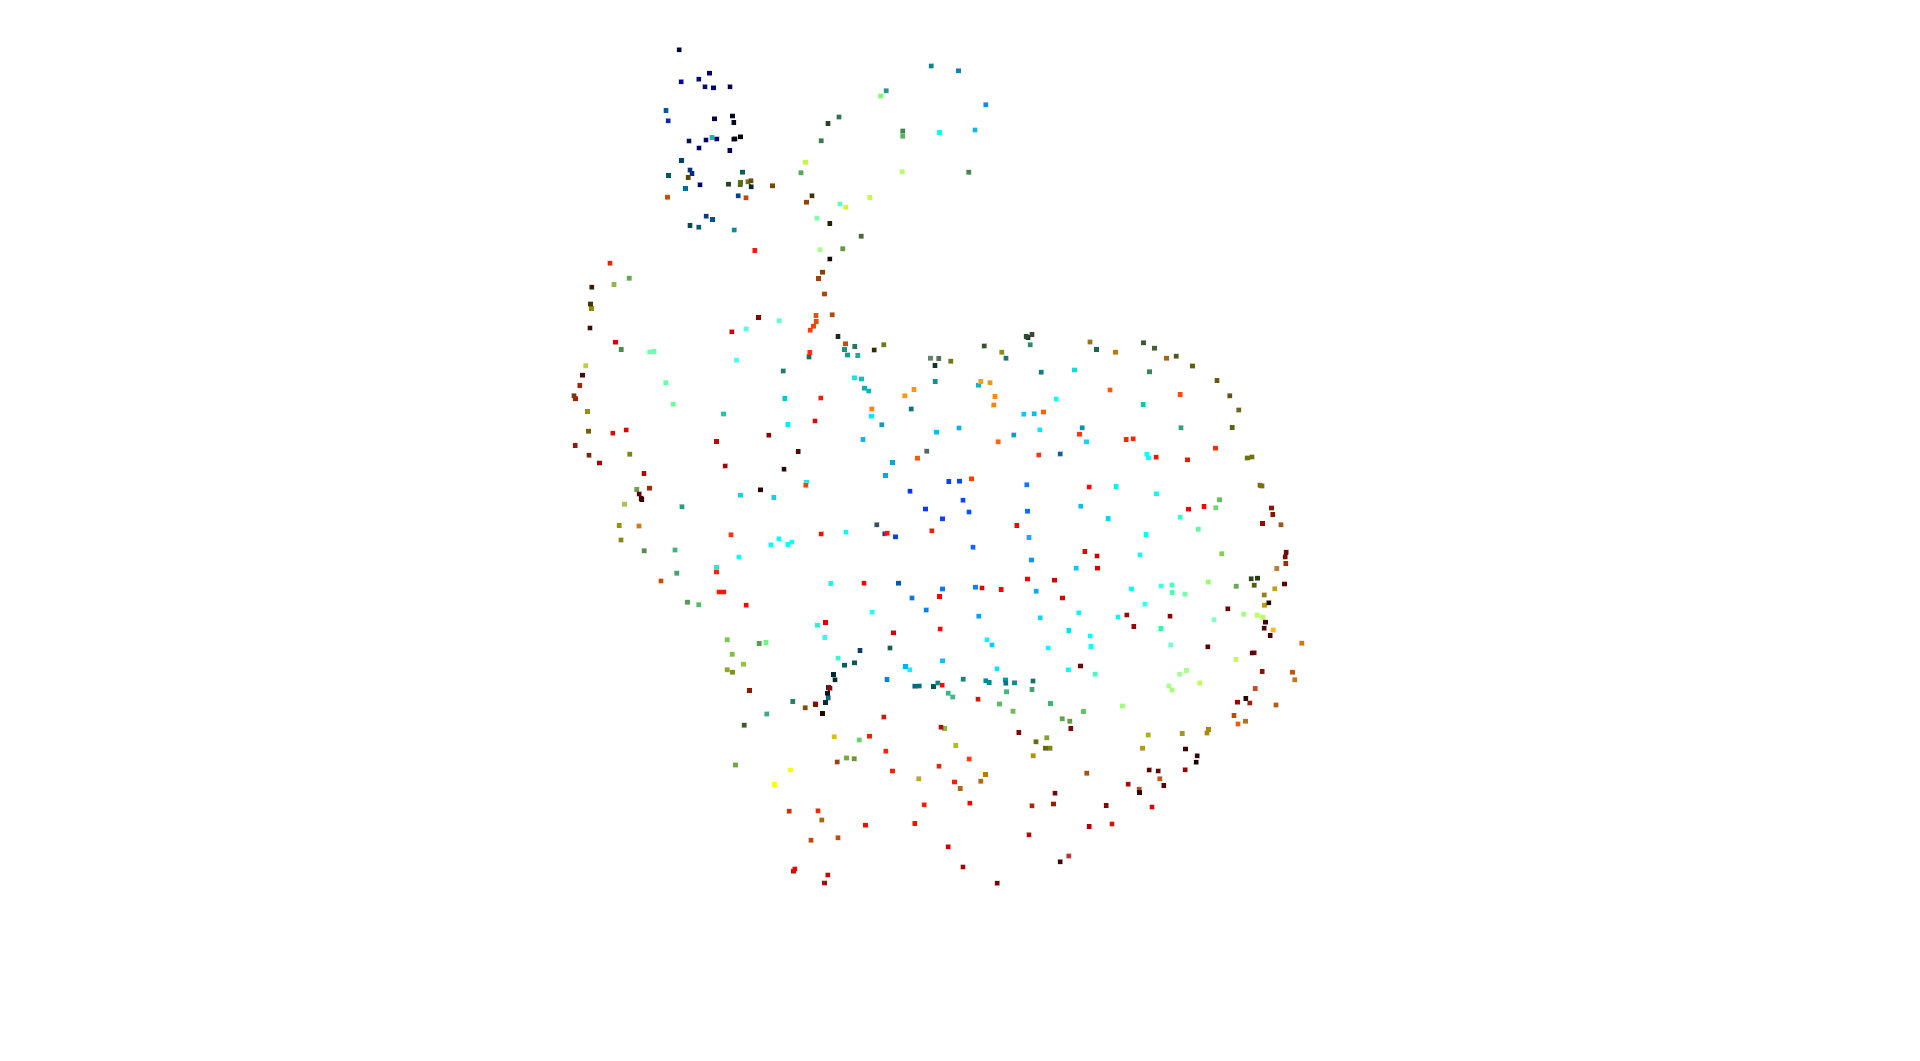

In [60]:
mesh = o3dtut.get_bunny_mesh()
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd])

Uniform sampling can yield clusters of points on the surface, while a method called Poisson disk sampling can evenly distribute the points on the surface. The method **sample_points_poisson_disk** implements sample elimination. It starts with a sampled point cloud and removes points to satisfy the sampling criterion. The method supports two options to provide the initial point cloud:
> 1. Default via the parameter **init_factor** : The method first samples uniformly a point cloud from the mesh with **init_factor** x **number_of_points** and uses this for the elimination.
> 2. One can provide a point cloud and pass it to the **sample_points_poission_disk** method. Then, this point cloud is used for elimination.

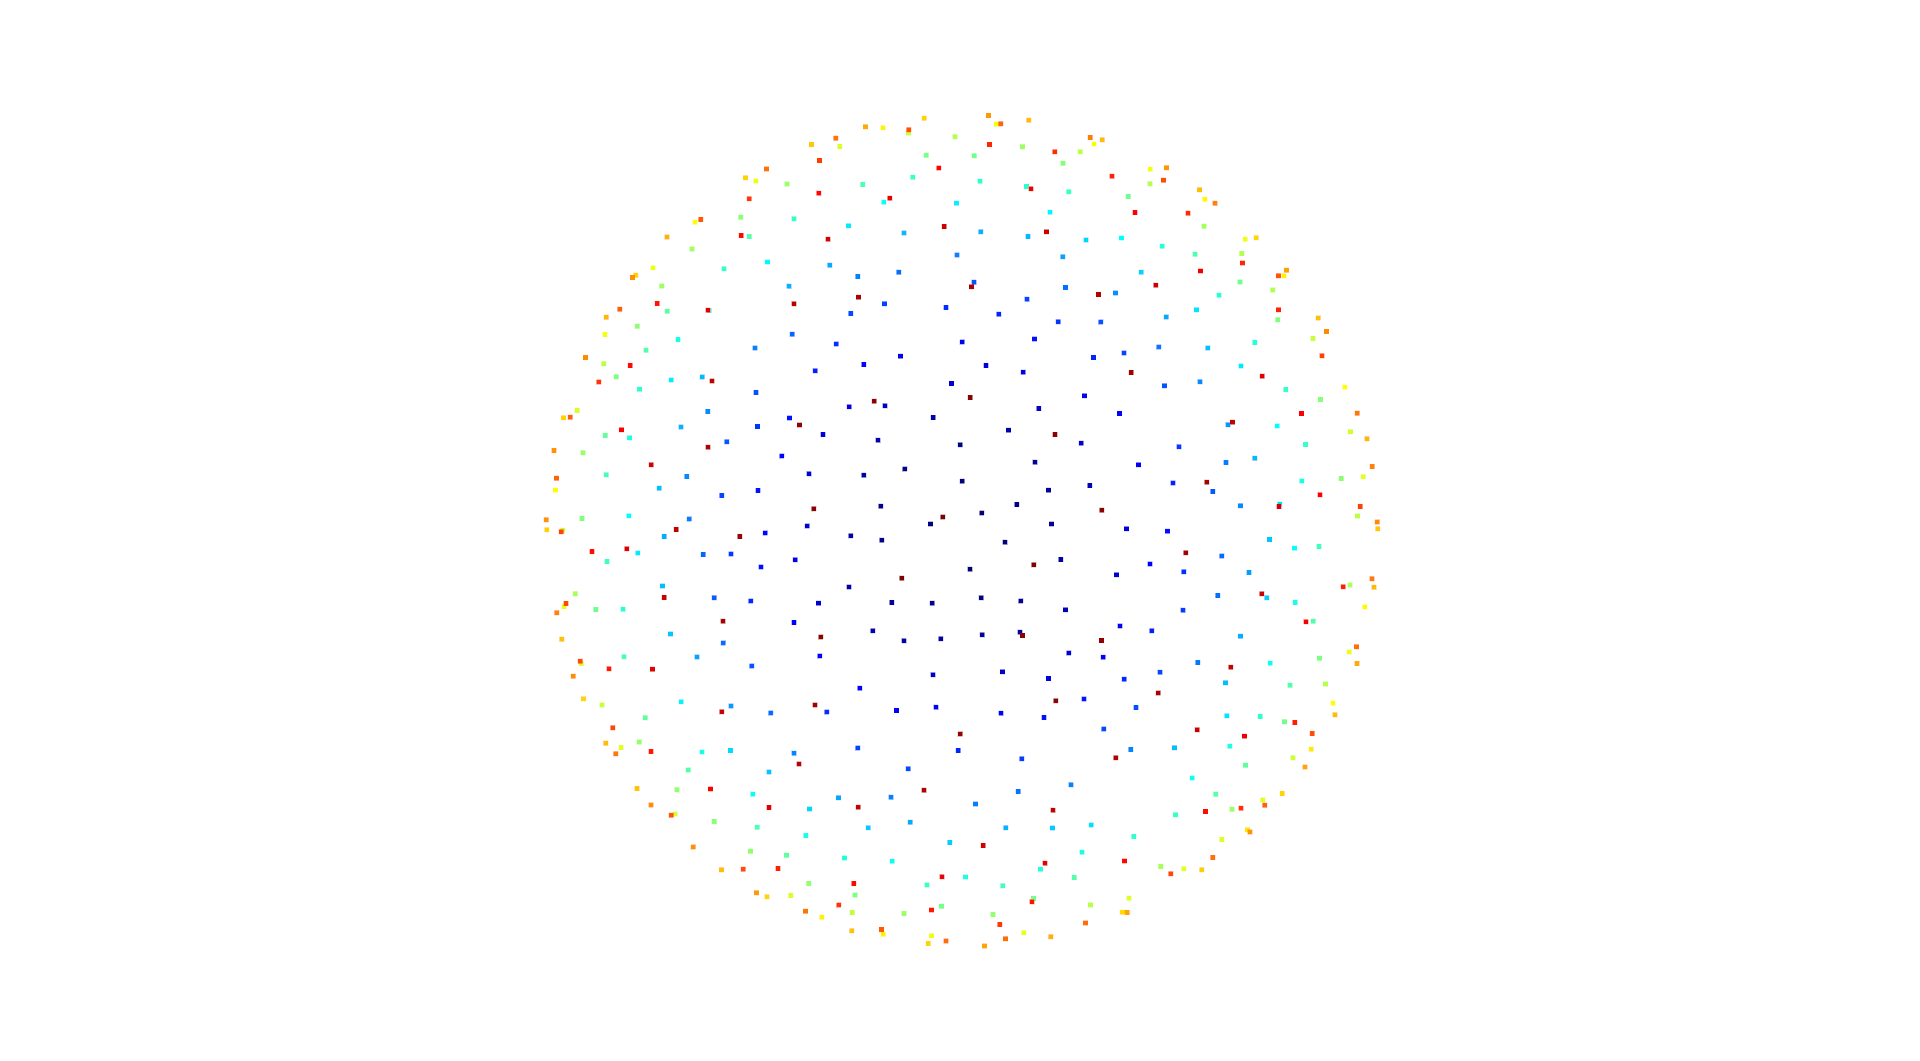

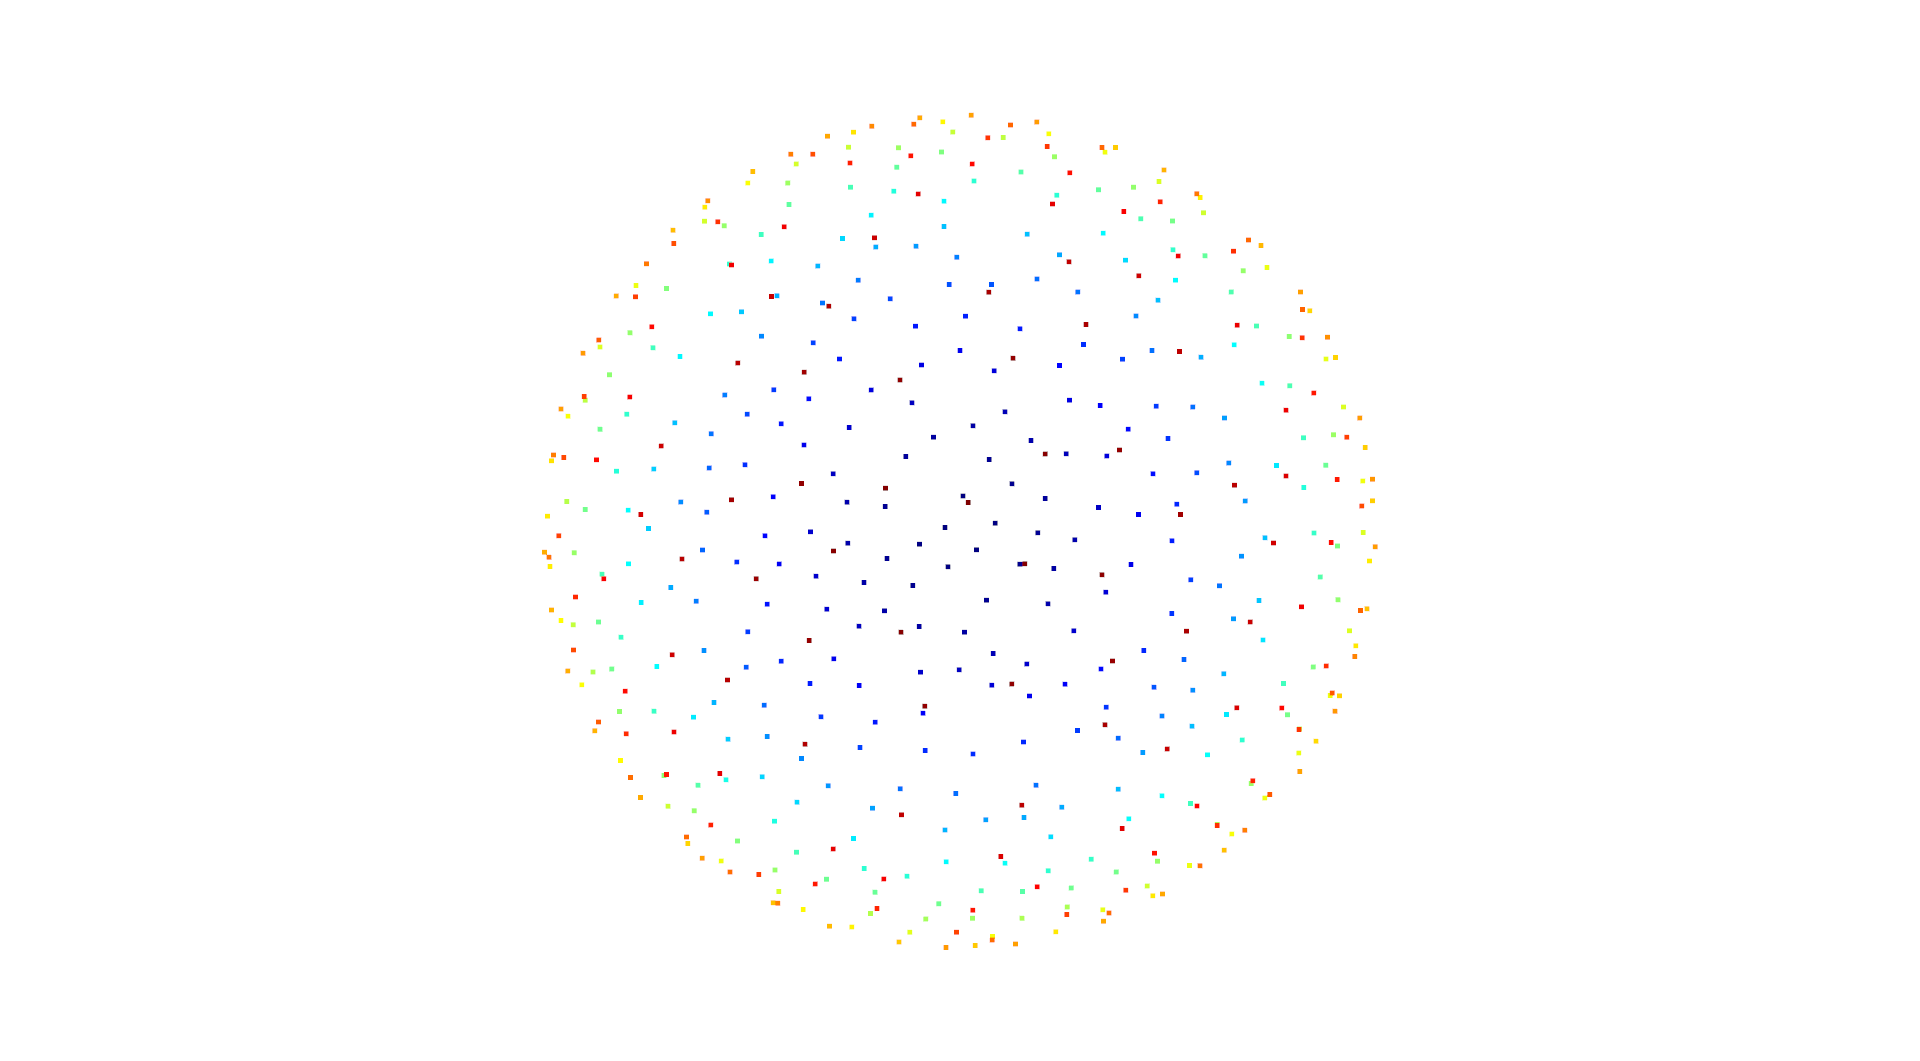

In [61]:
mesh = o3d.geometry.TriangleMesh.create_sphere()
pcd = mesh.sample_points_poisson_disk(number_of_points=500, init_factor=5)
o3d.visualization.draw_geometries([pcd])

pcd = mesh.sample_points_uniformly(number_of_points=2500)
pcd = mesh.sample_points_poisson_disk(number_of_points=500, pcl=pcd)
o3d.visualization.draw_geometries([pcd])

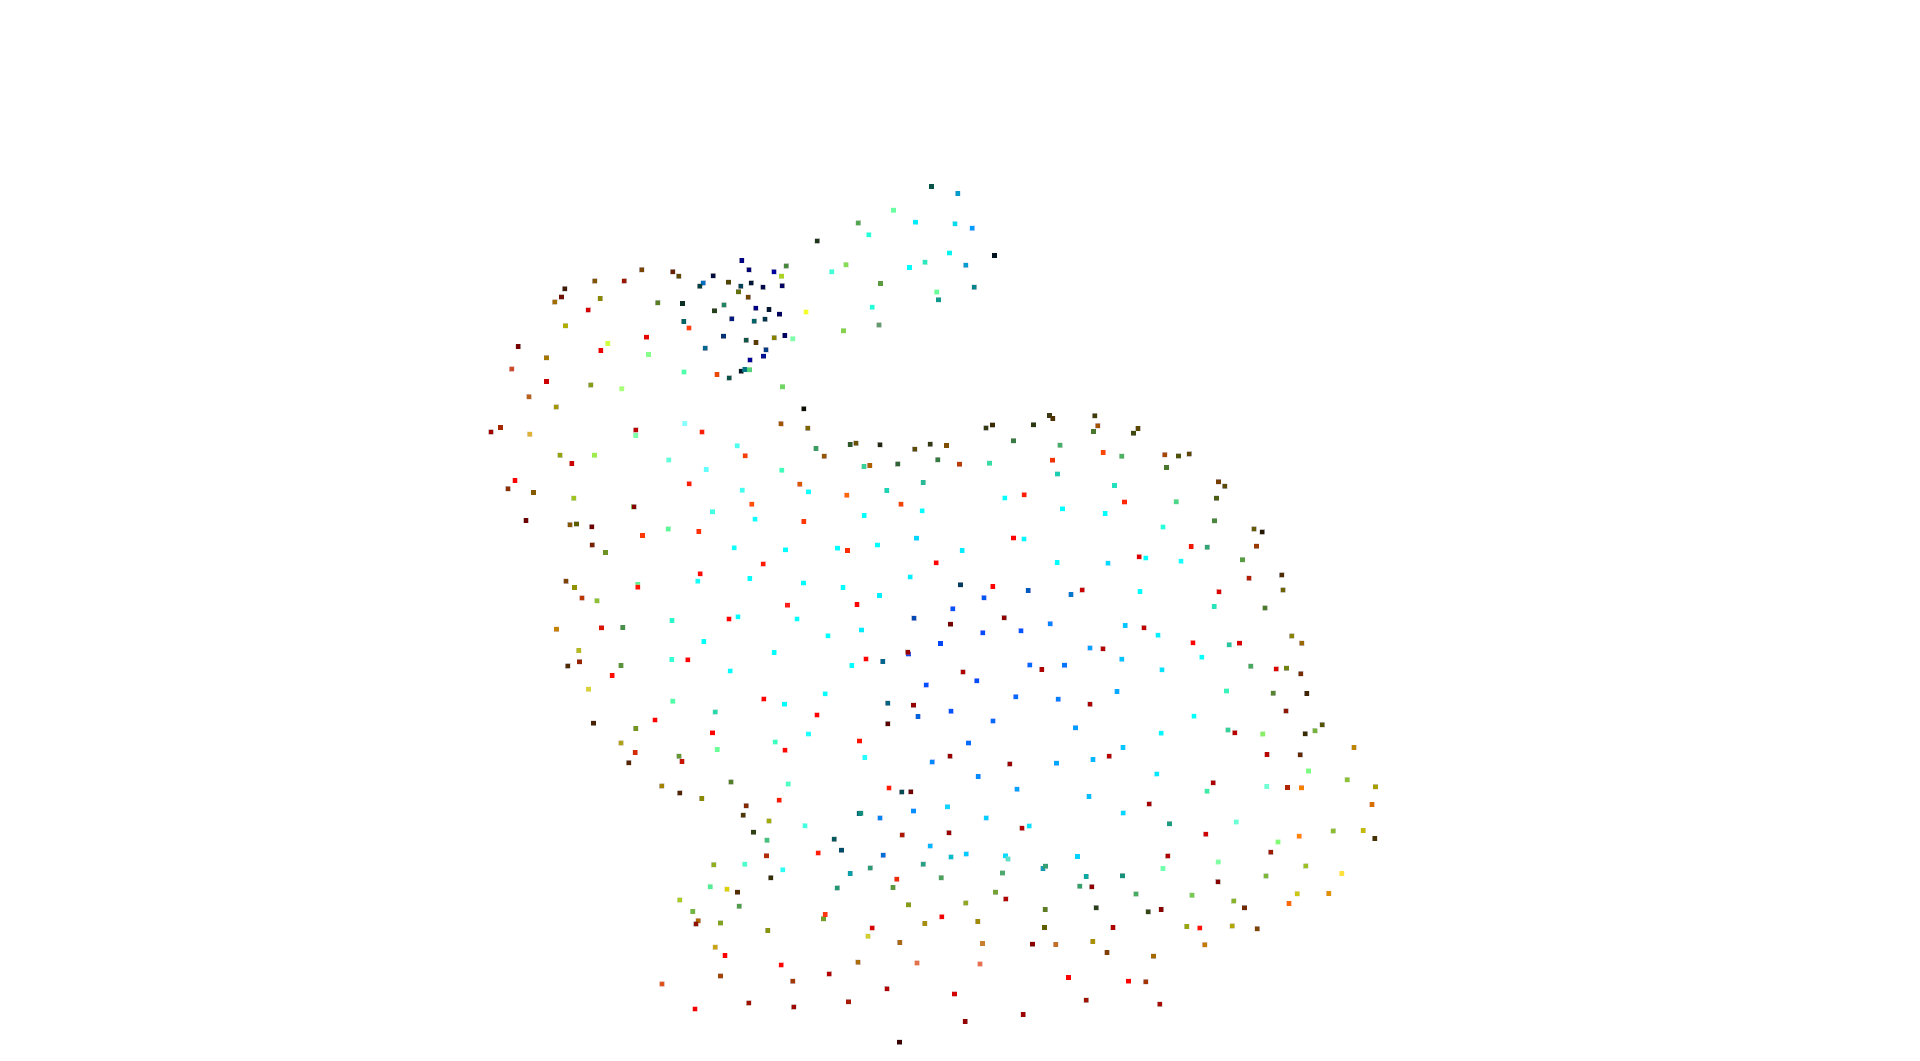

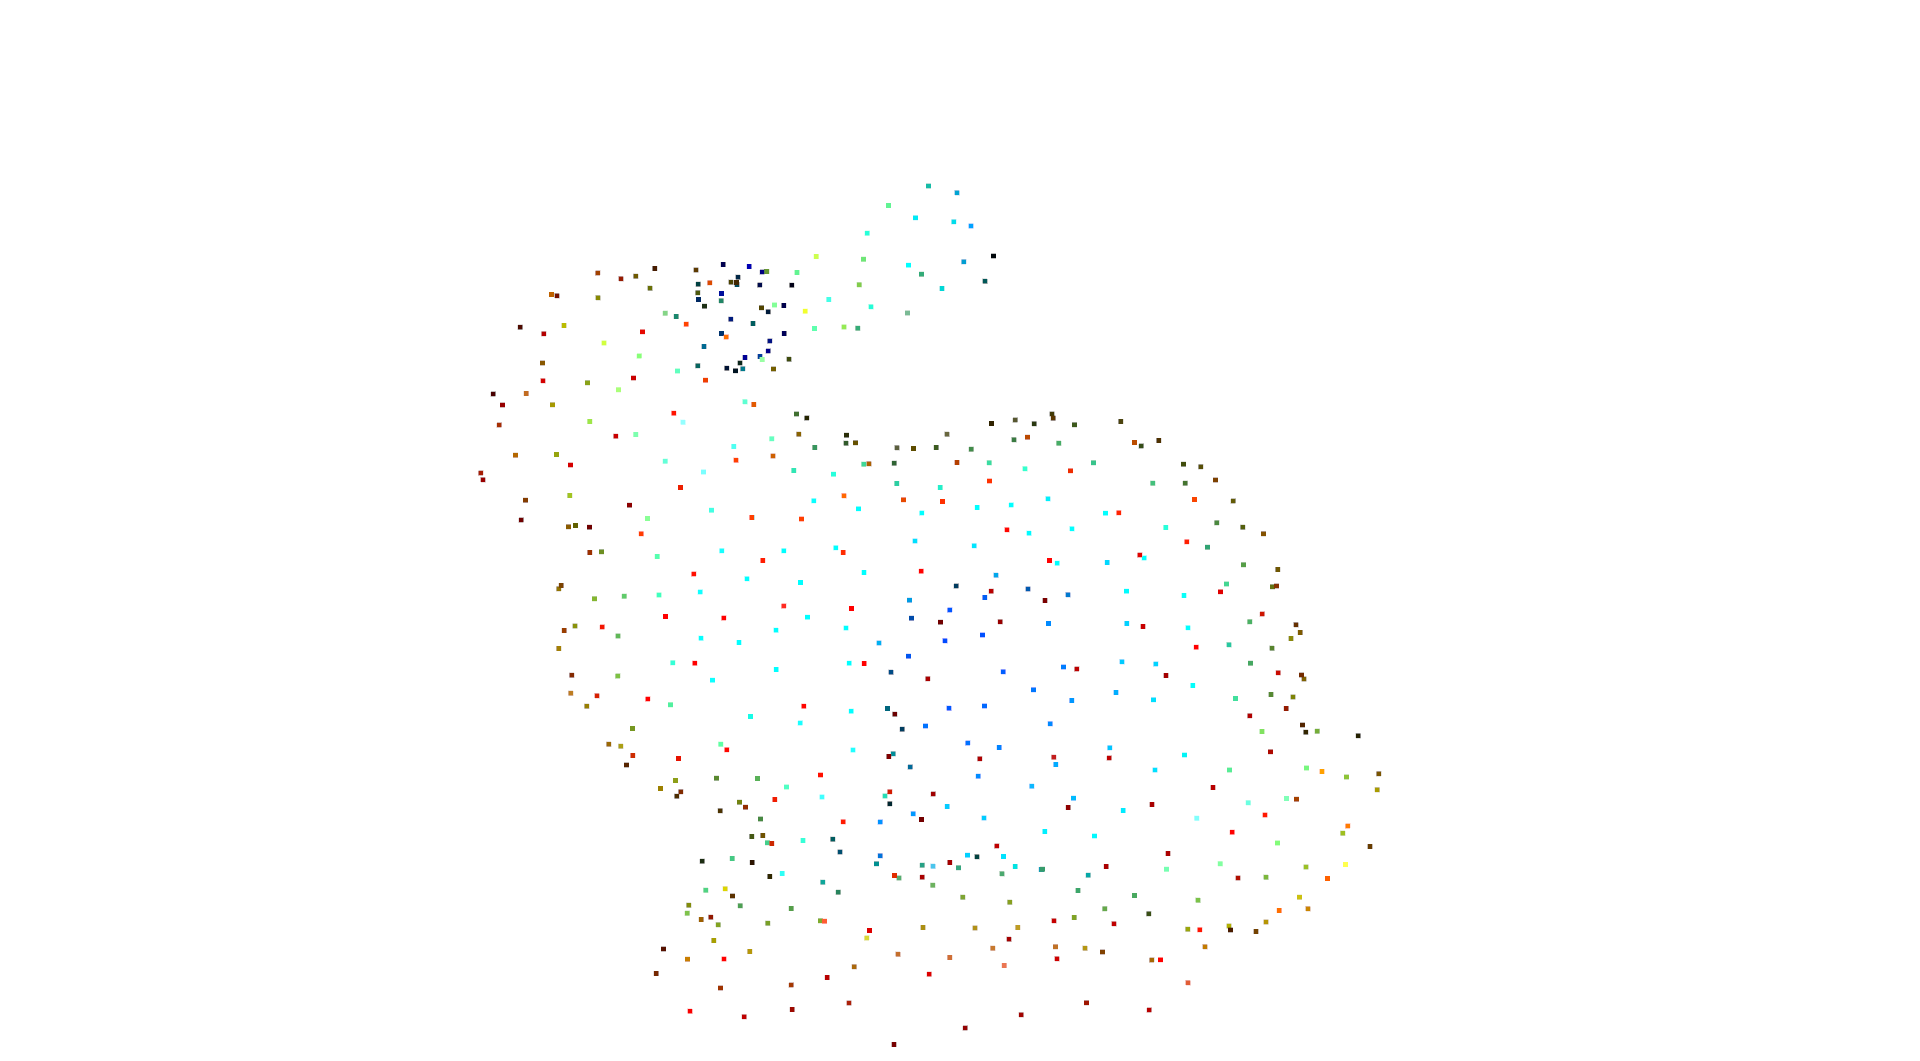

In [62]:
mesh = o3dtut.get_bunny_mesh()
pcd = mesh.sample_points_poisson_disk(number_of_points=500, init_factor=5)
o3d.visualization.draw_geometries([pcd])

pcd = mesh.sample_points_uniformly(number_of_points=2500)
pcd = mesh.sample_points_poisson_disk(number_of_points=500, pcl=pcd)
o3d.visualization.draw_geometries([pcd])

### Mesh subdivision
In mesh subdivision we divide each triangle into a number of smaller triangles. In the simplest case, we compute the midpoint of each side per triangle and divide the triangle into four smaller triangles. This is implemented in the **subdivide_midpoint** function. The 3D surface and area stays the same, but the number of vertices and triangles increase. The parameter **number_of_iterations** defines how many times this process should be repeated.

The mesh has 8 vertices and 12 triangles


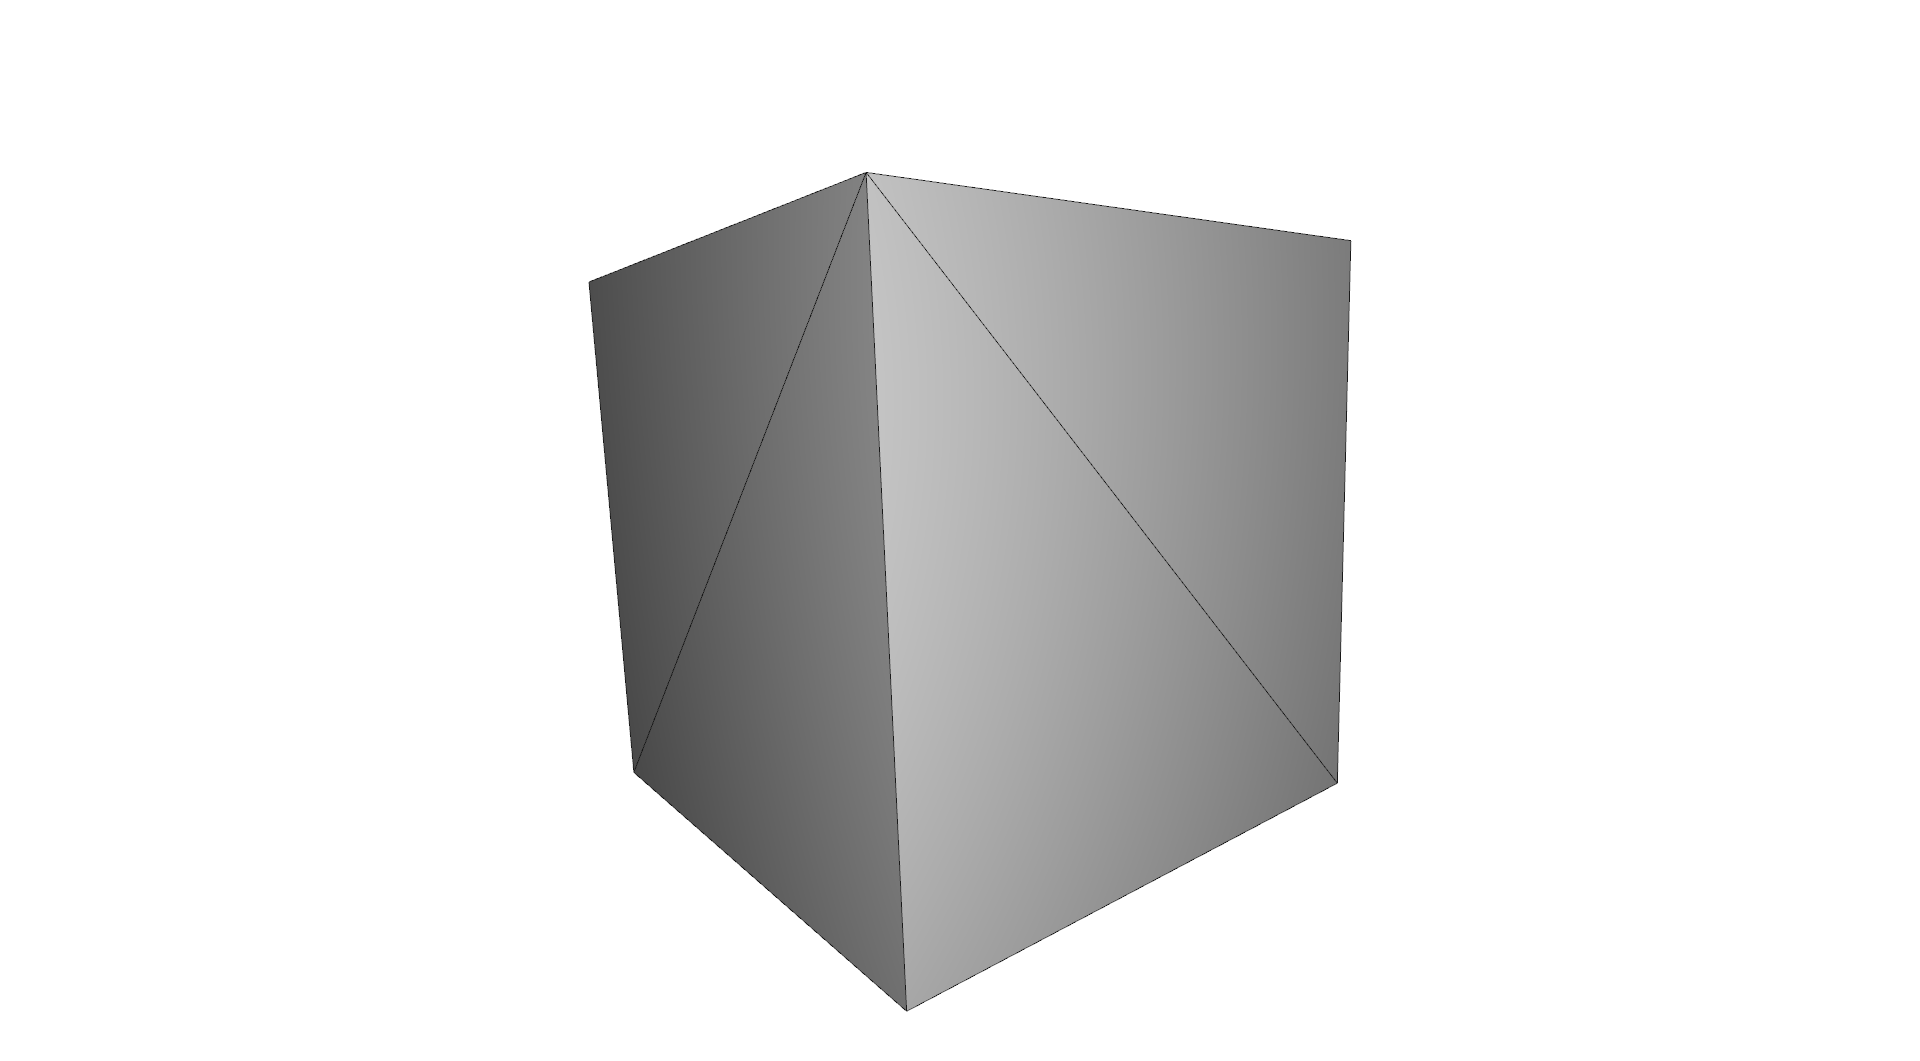

After subdivision it has 26 vertices and 48 triangles


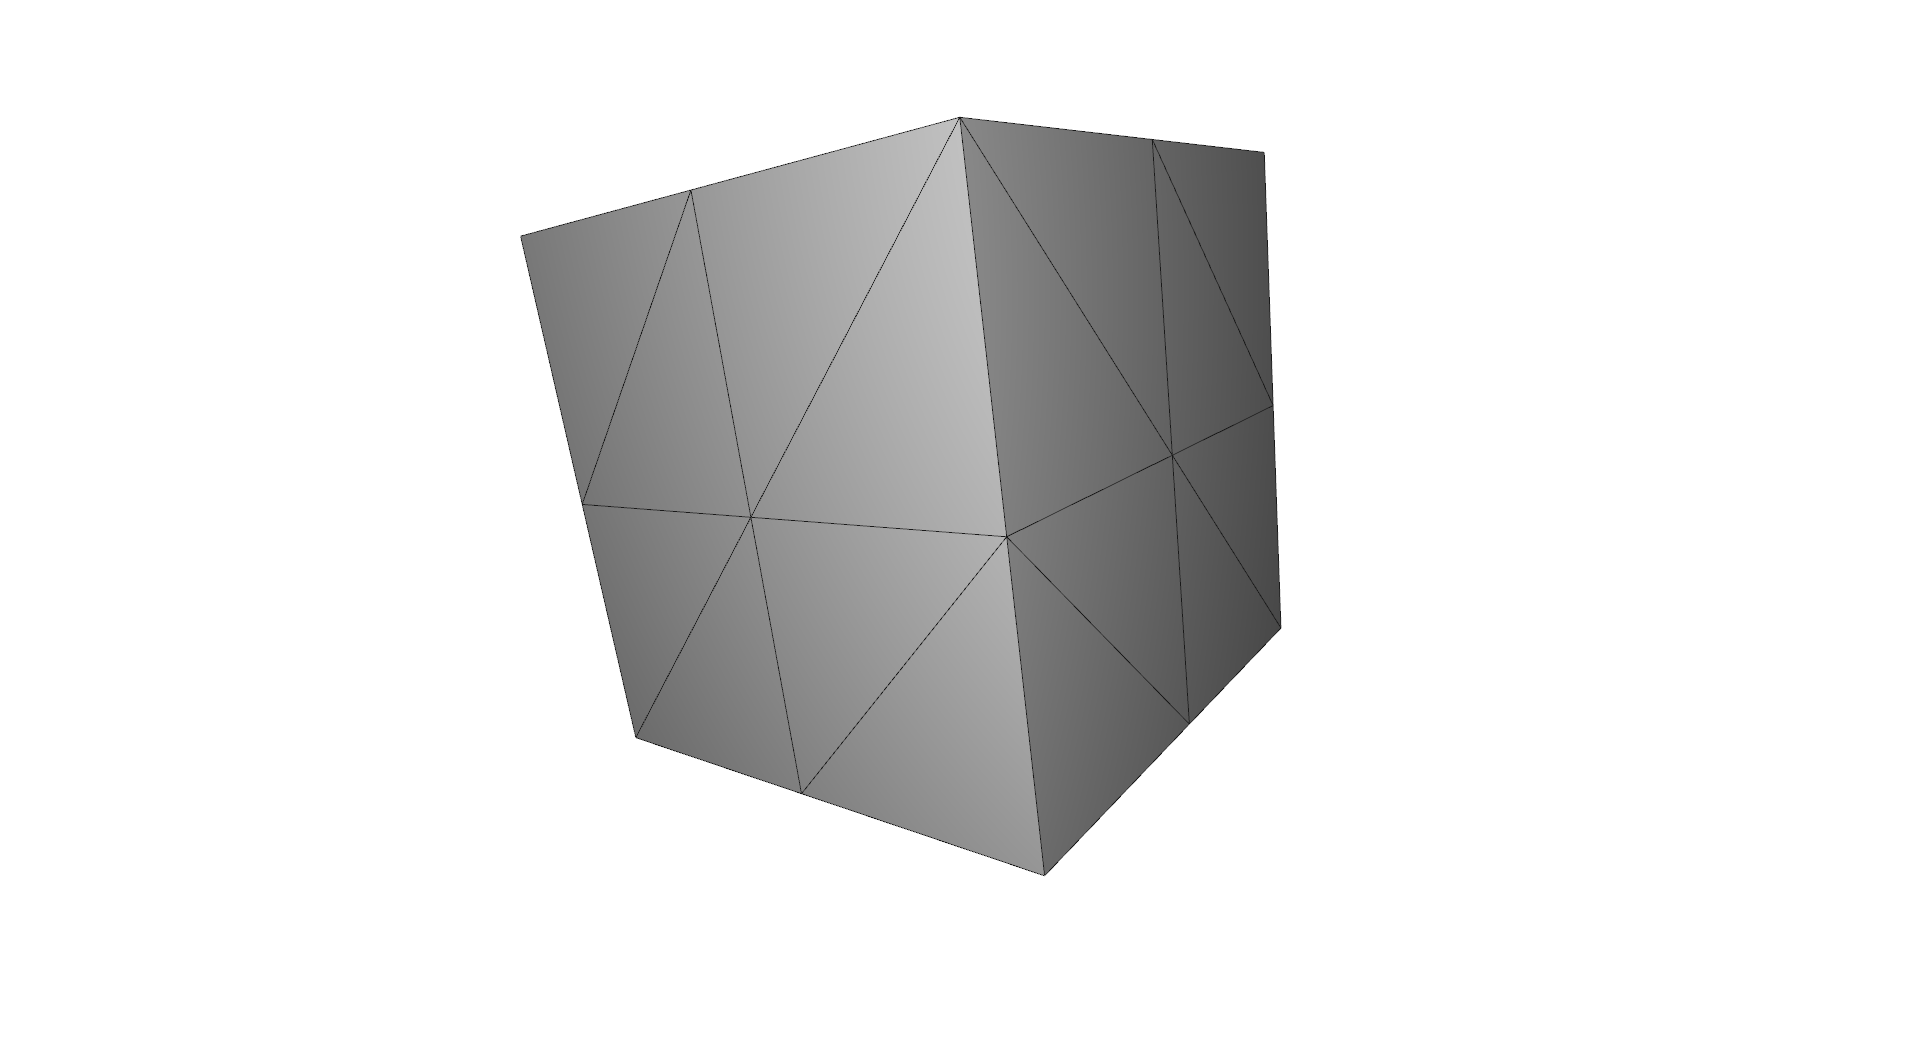

In [2]:
mesh = o3d.geometry.TriangleMesh.create_box()
mesh.compute_vertex_normals()
print(f'The mesh has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True)
mesh = mesh.subdivide_midpoint(number_of_iterations=1)
print(f'After subdivision it has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True)

Open3D implements an additional subdivision method based on Loop(1987). The method is based on a quartic box spline, which generates $C^2$ continuous limit surfaces everywhere except at extraordinary vertices where they are $C^1$ continuous. This leads to smoother corners.

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import Open3D.examples.python.open3d_tutorial as o3dtut

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


The mesh has 762 vertices and 1520 triangles


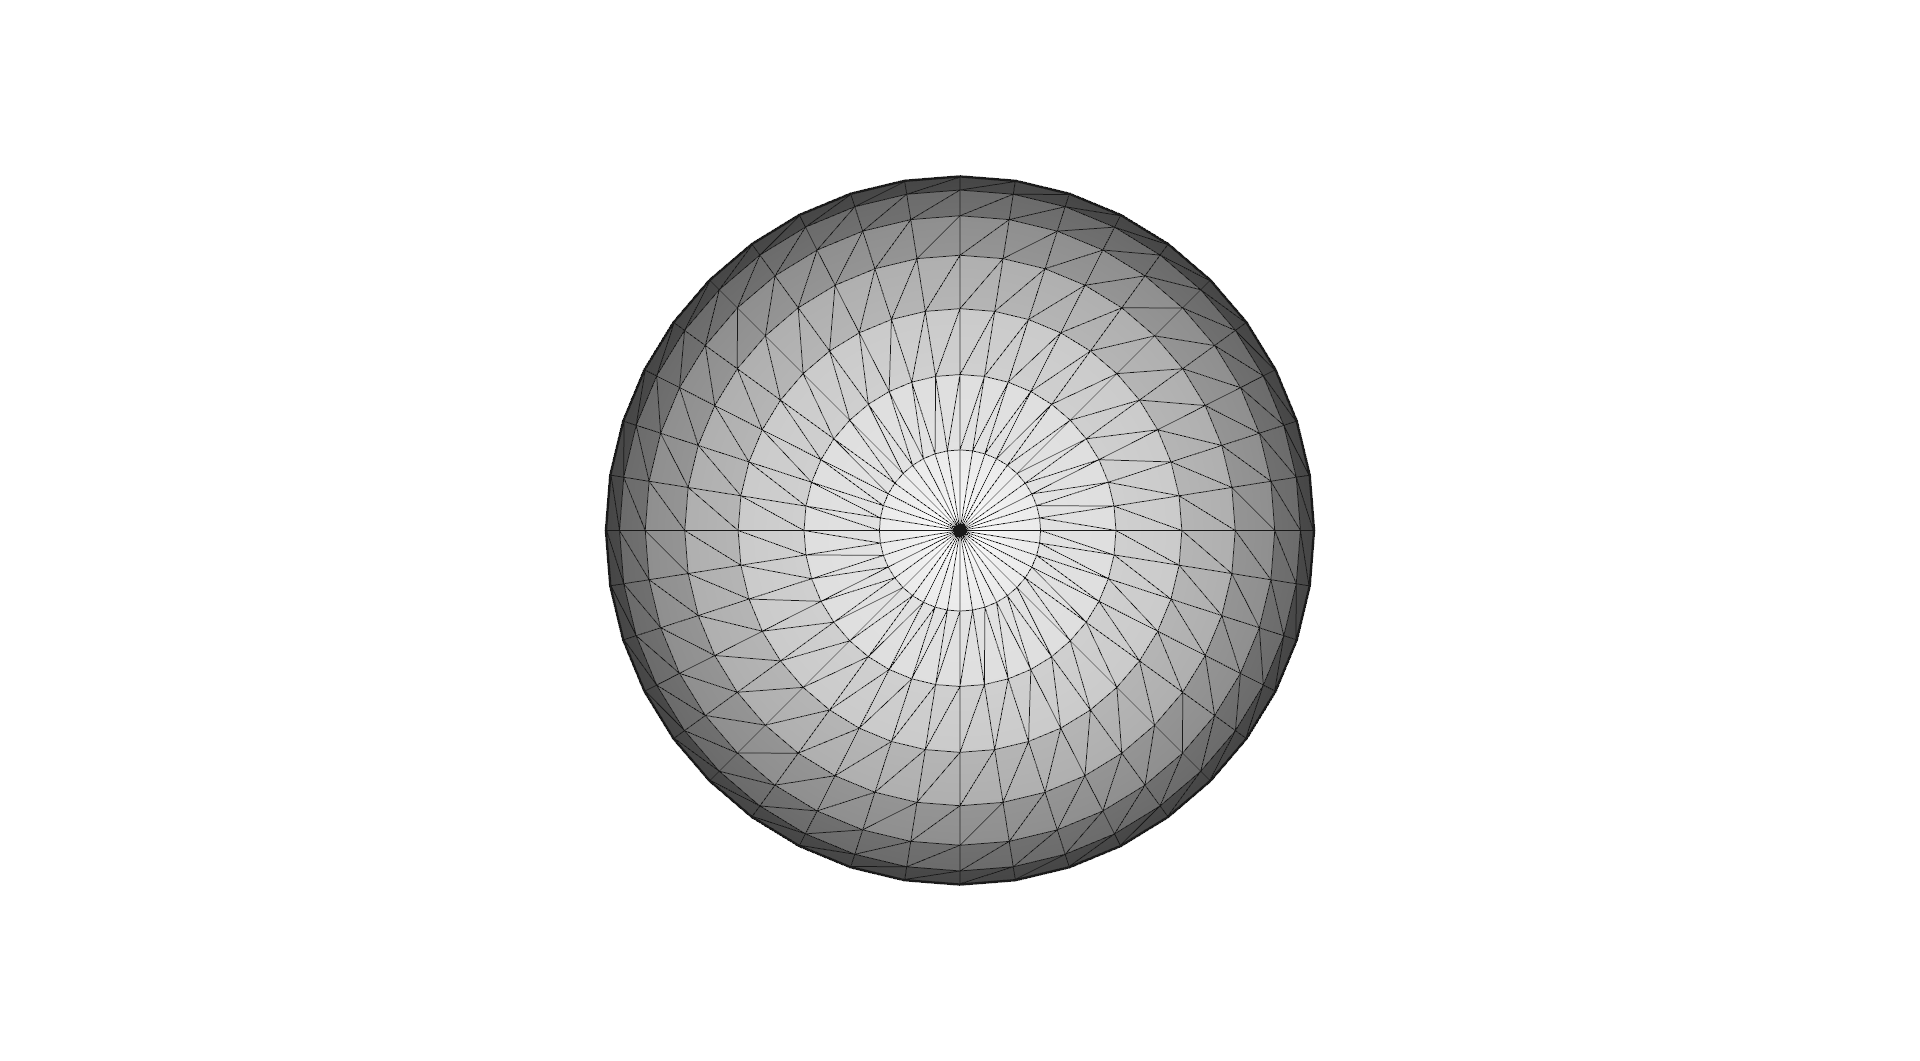

After subdivision it has 12162 vertices and 24320 triangles


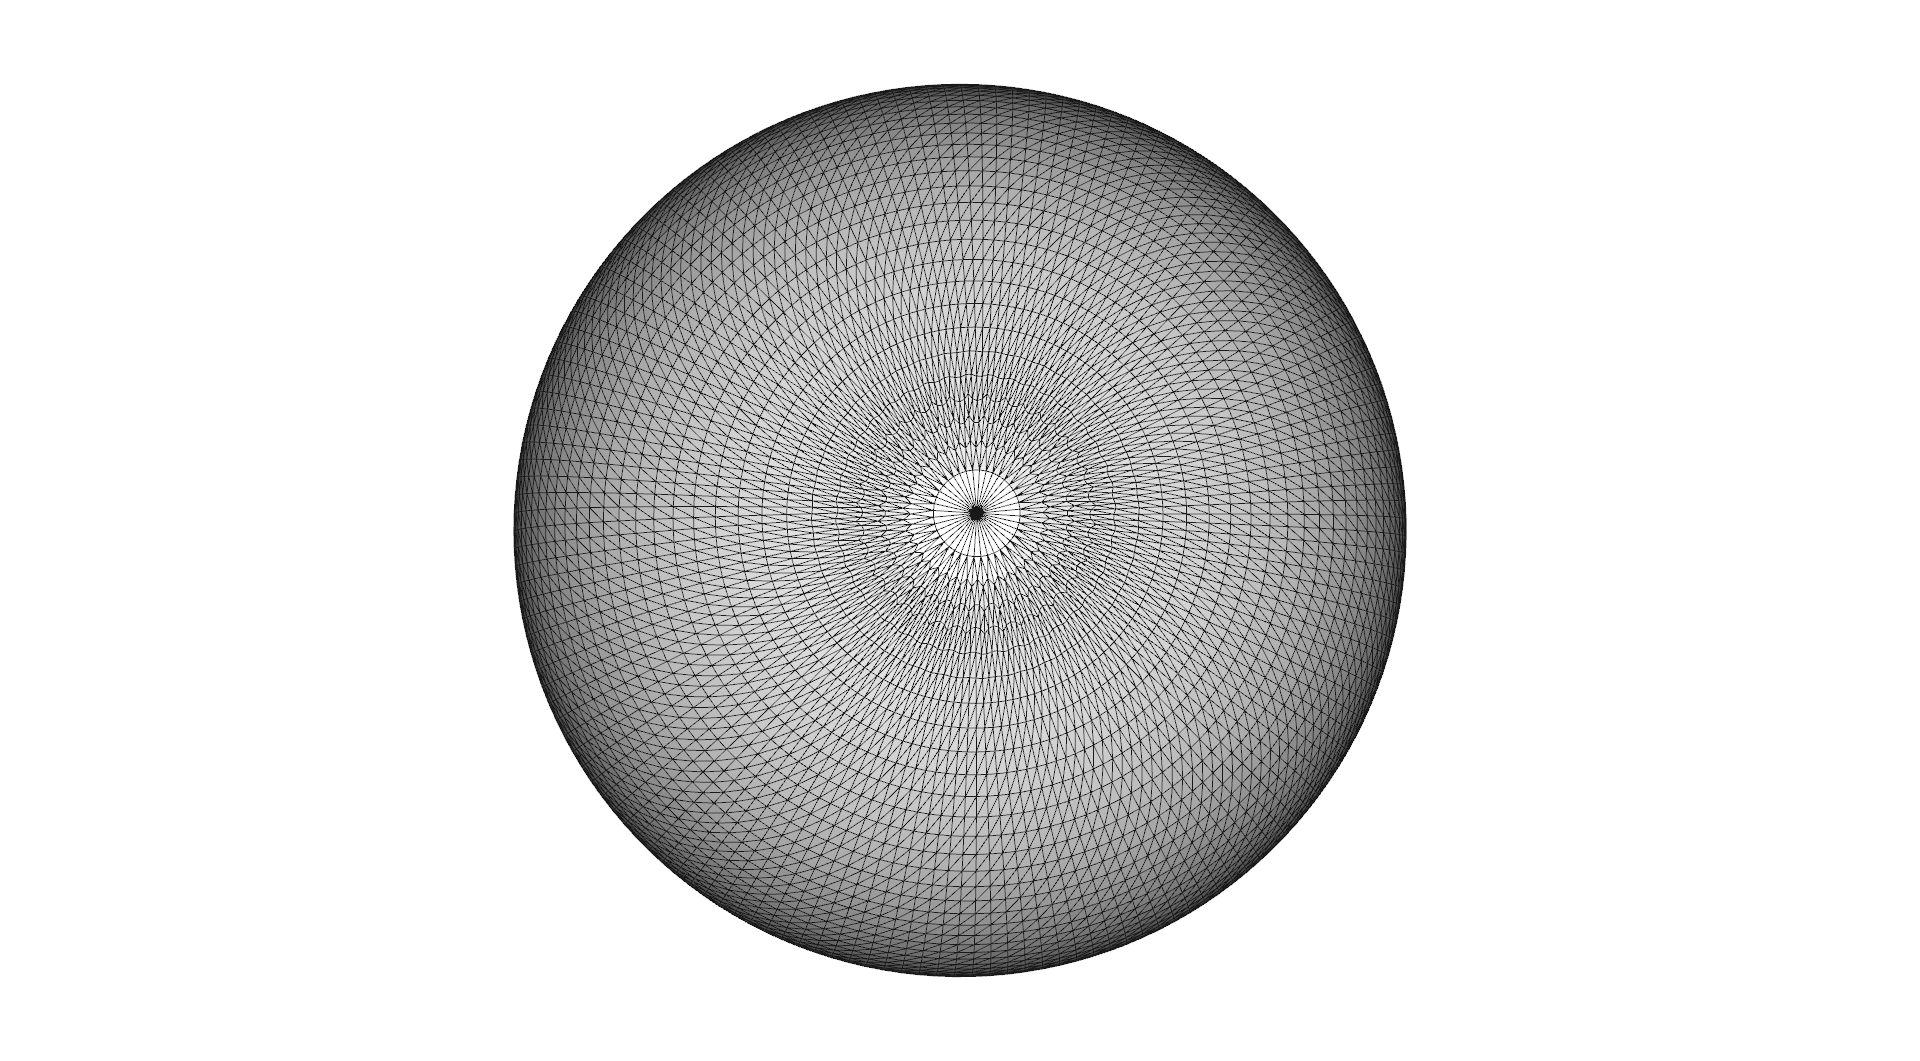

In [2]:
mesh = o3d.geometry.TriangleMesh.create_sphere()
mesh.compute_vertex_normals()
print(f'The mesh has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True)
mesh = mesh.subdivide_loop(number_of_iterations=2)
print(f'After subdivision it has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True)

The mesh has 1440 vertices and 2880 triangles


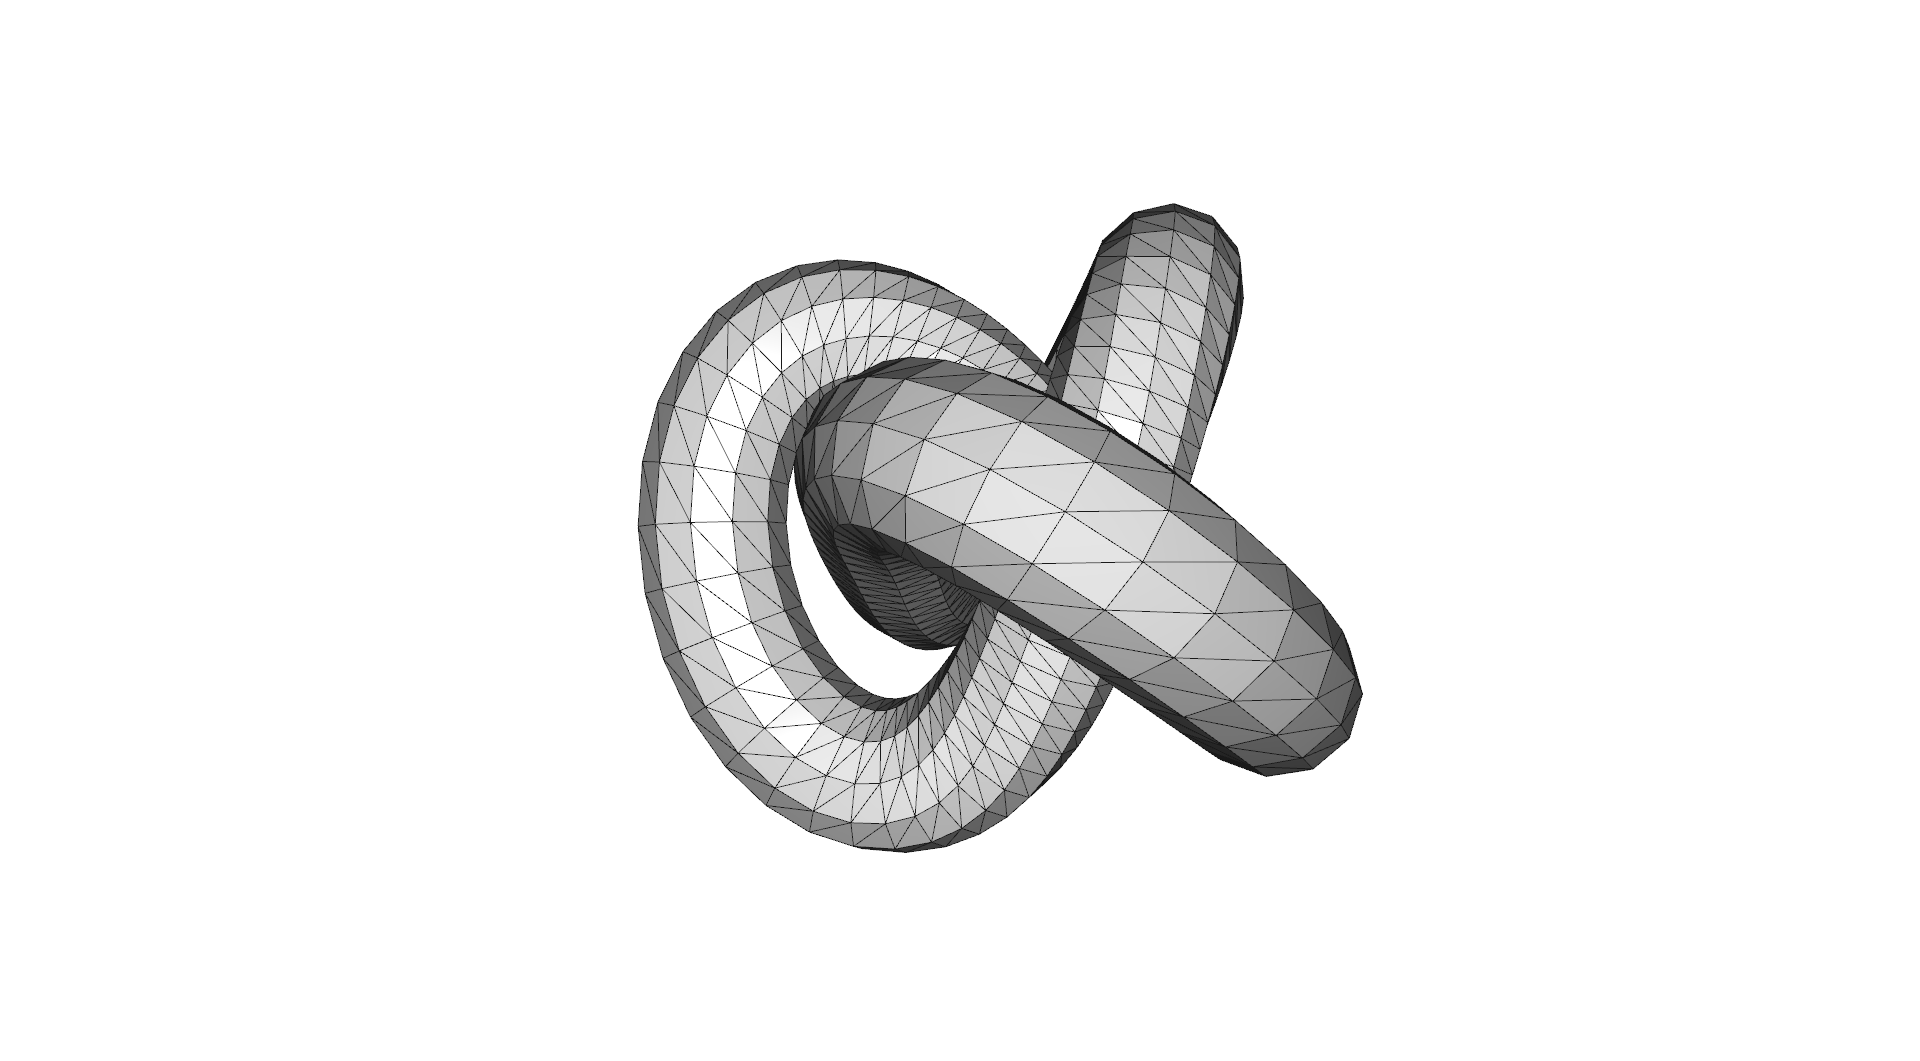

After subdivision it has 5760 vertices and 11520 triangles


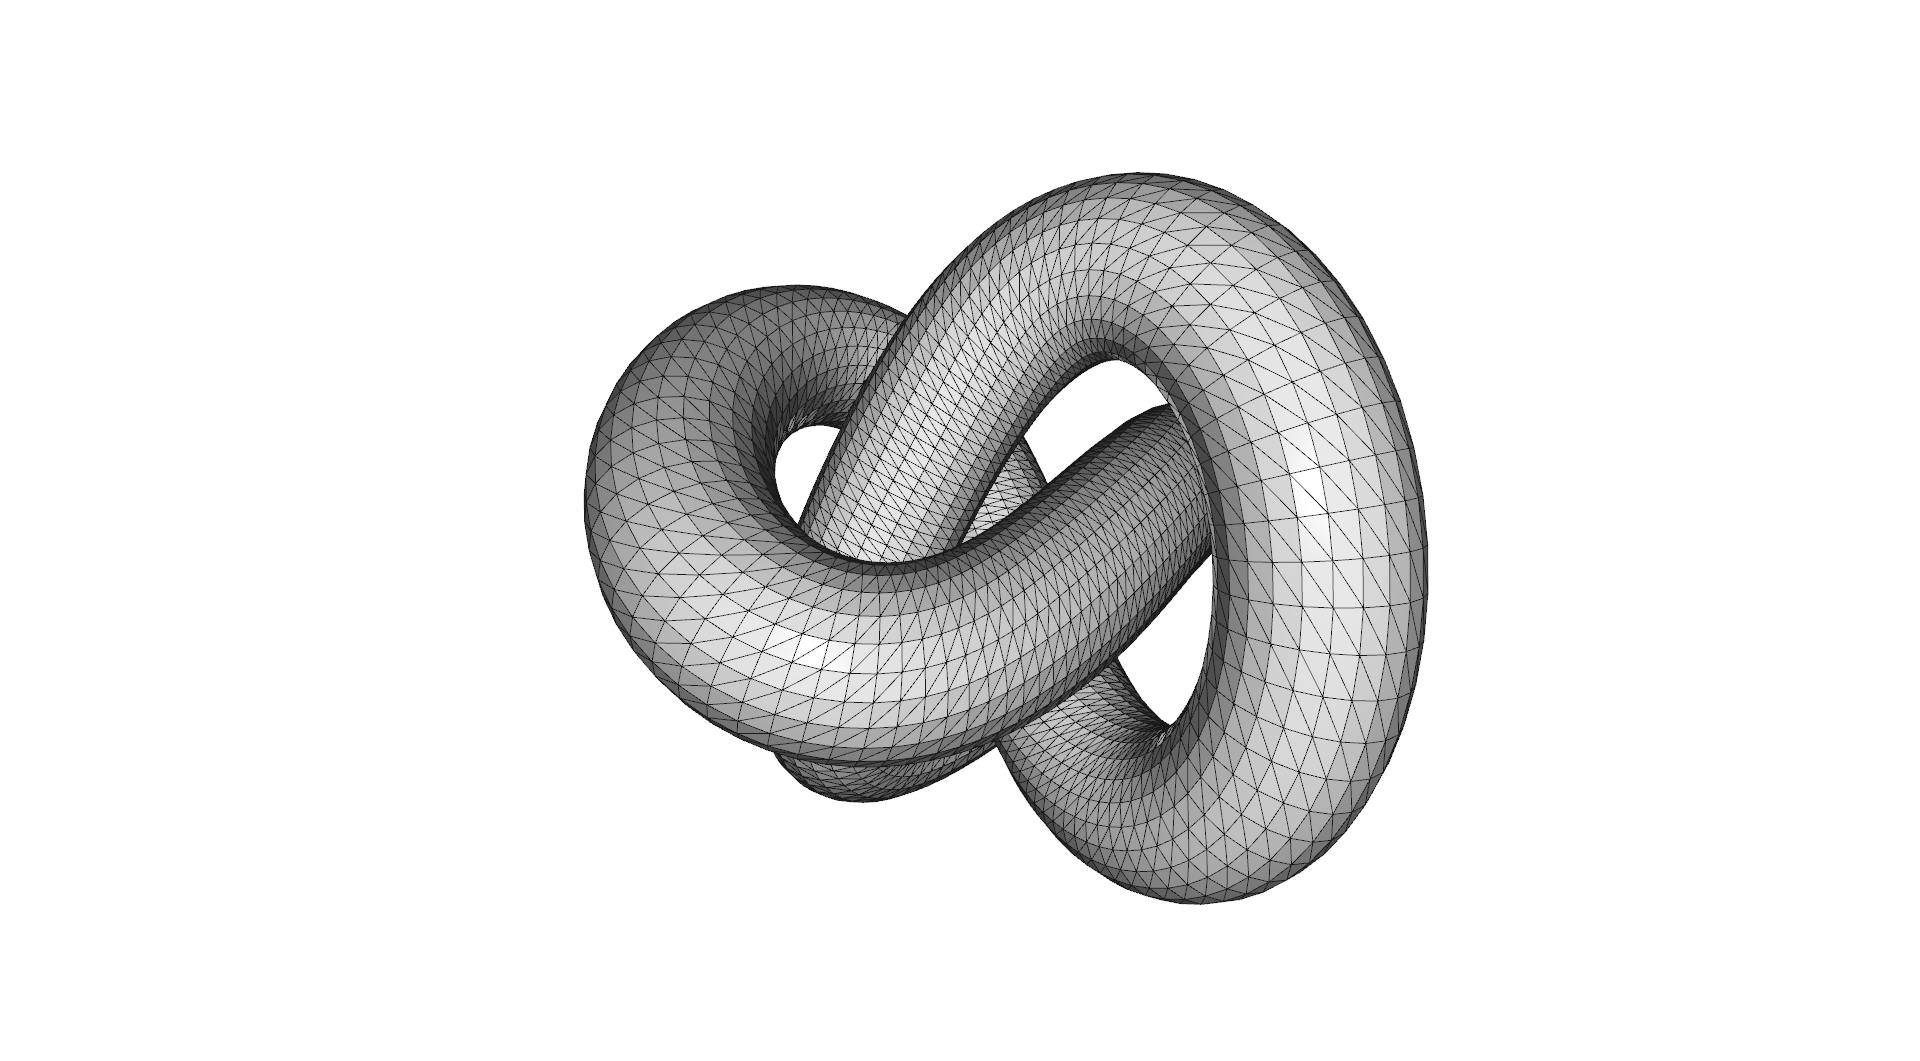

In [3]:
mesh = o3dtut.get_knot_mesh()
mesh.compute_vertex_normals()
print(f'The mesh has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], zoom=0.8, mesh_show_wireframe=True)
mesh = mesh.subdivide_loop(number_of_iterations=1)
print(f'After subdivision it has {len(mesh.vertices)} vertices and {len(mesh.triangles)} triangles')
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)

### Mesh simplification
Sometimes we want to represent a high-resolution mesh with fewer triangles and vertices, but the low-resolution mesh shoud still be close to the high-resolution mesh. For this purpose Open3D implements a number of mesh simplification methods.

#### Vertex clustering
The vertex clustering method pools all vertices that fail into a voxel of a given size to a single vertex. The method is implemented in **simplify_vertex_clustering** and has as parameters **voxel_size** that defines the size of the voxel grid and **contraction** that defines how the vertices are pooled. **o3d.geometry.SimplificationContraction.Average** computes a simple average.

Input mesh has 35947 vertices and 69451 triangles


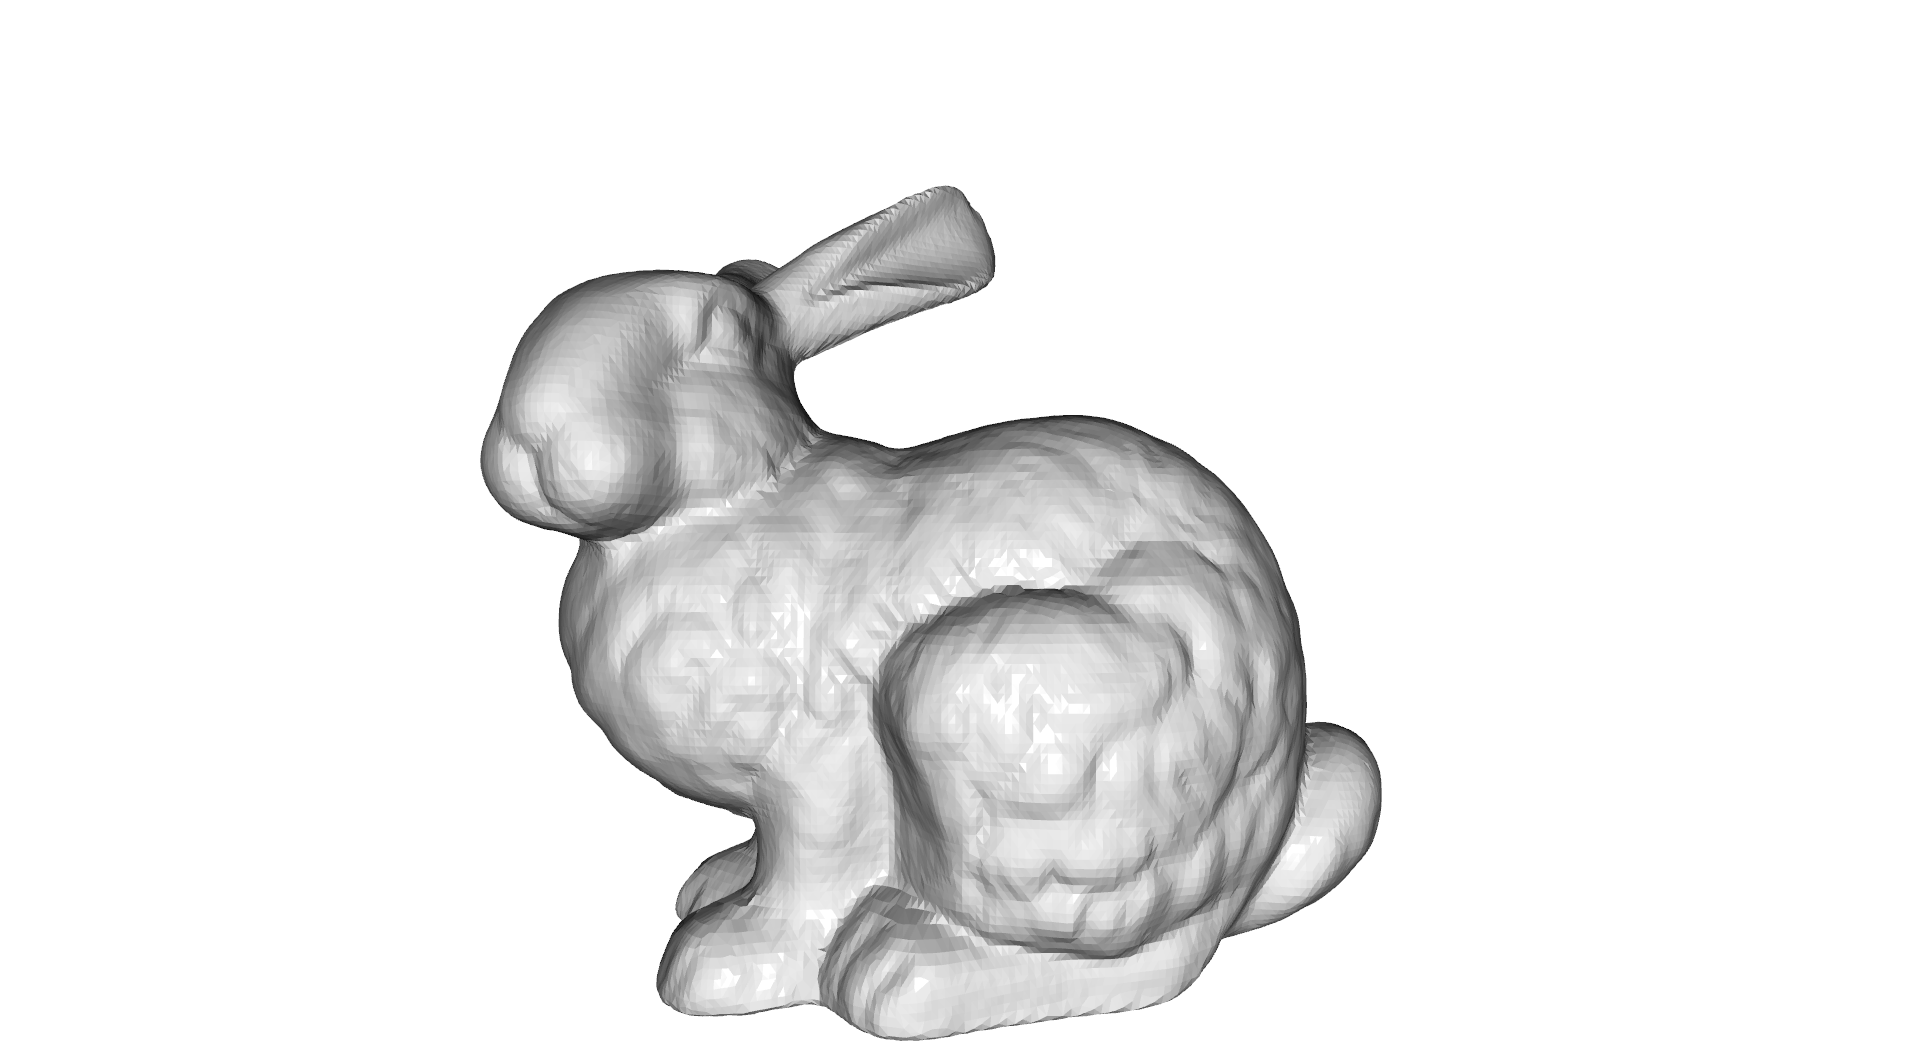

voxel_size = 4.865594e-03
Simplified mesh has 3222 vertices and 6454 triangles


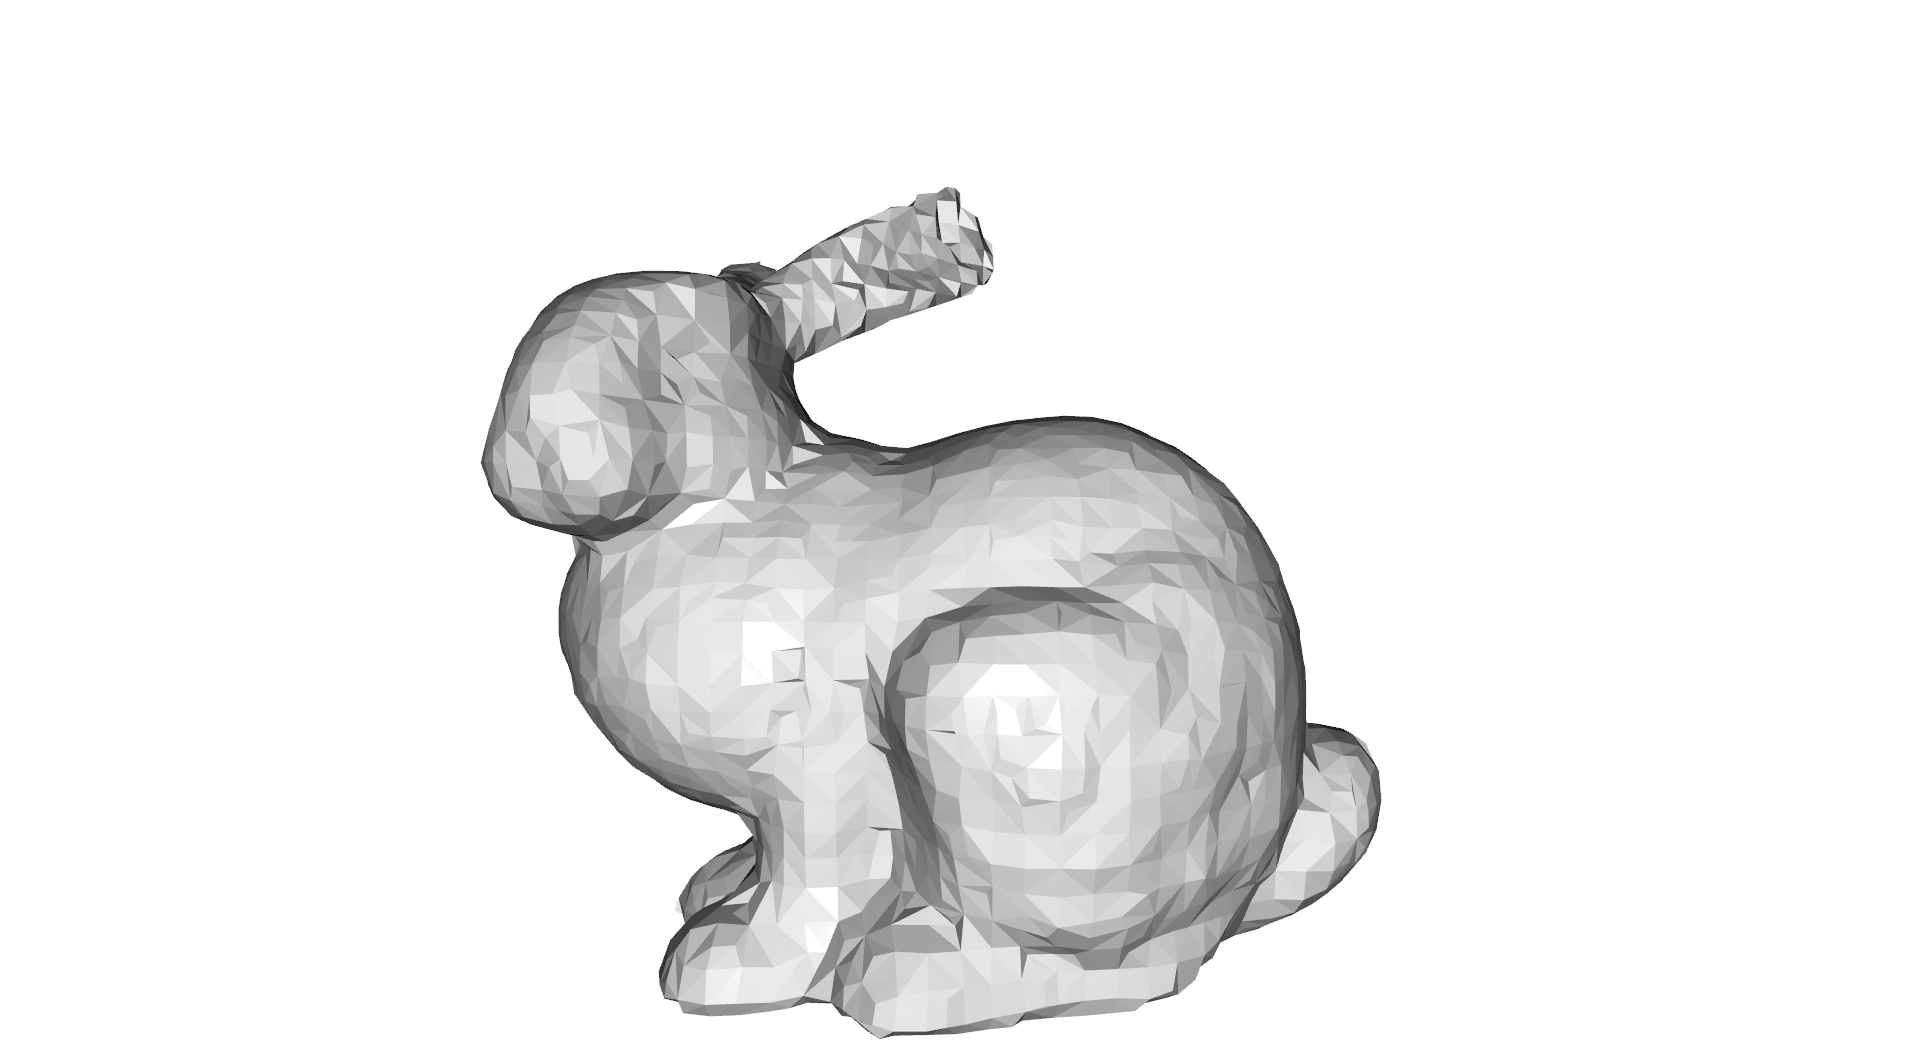

voxel_size = 9.731187e-03
Simplified mesh has 845 vertices and 1724 triangles


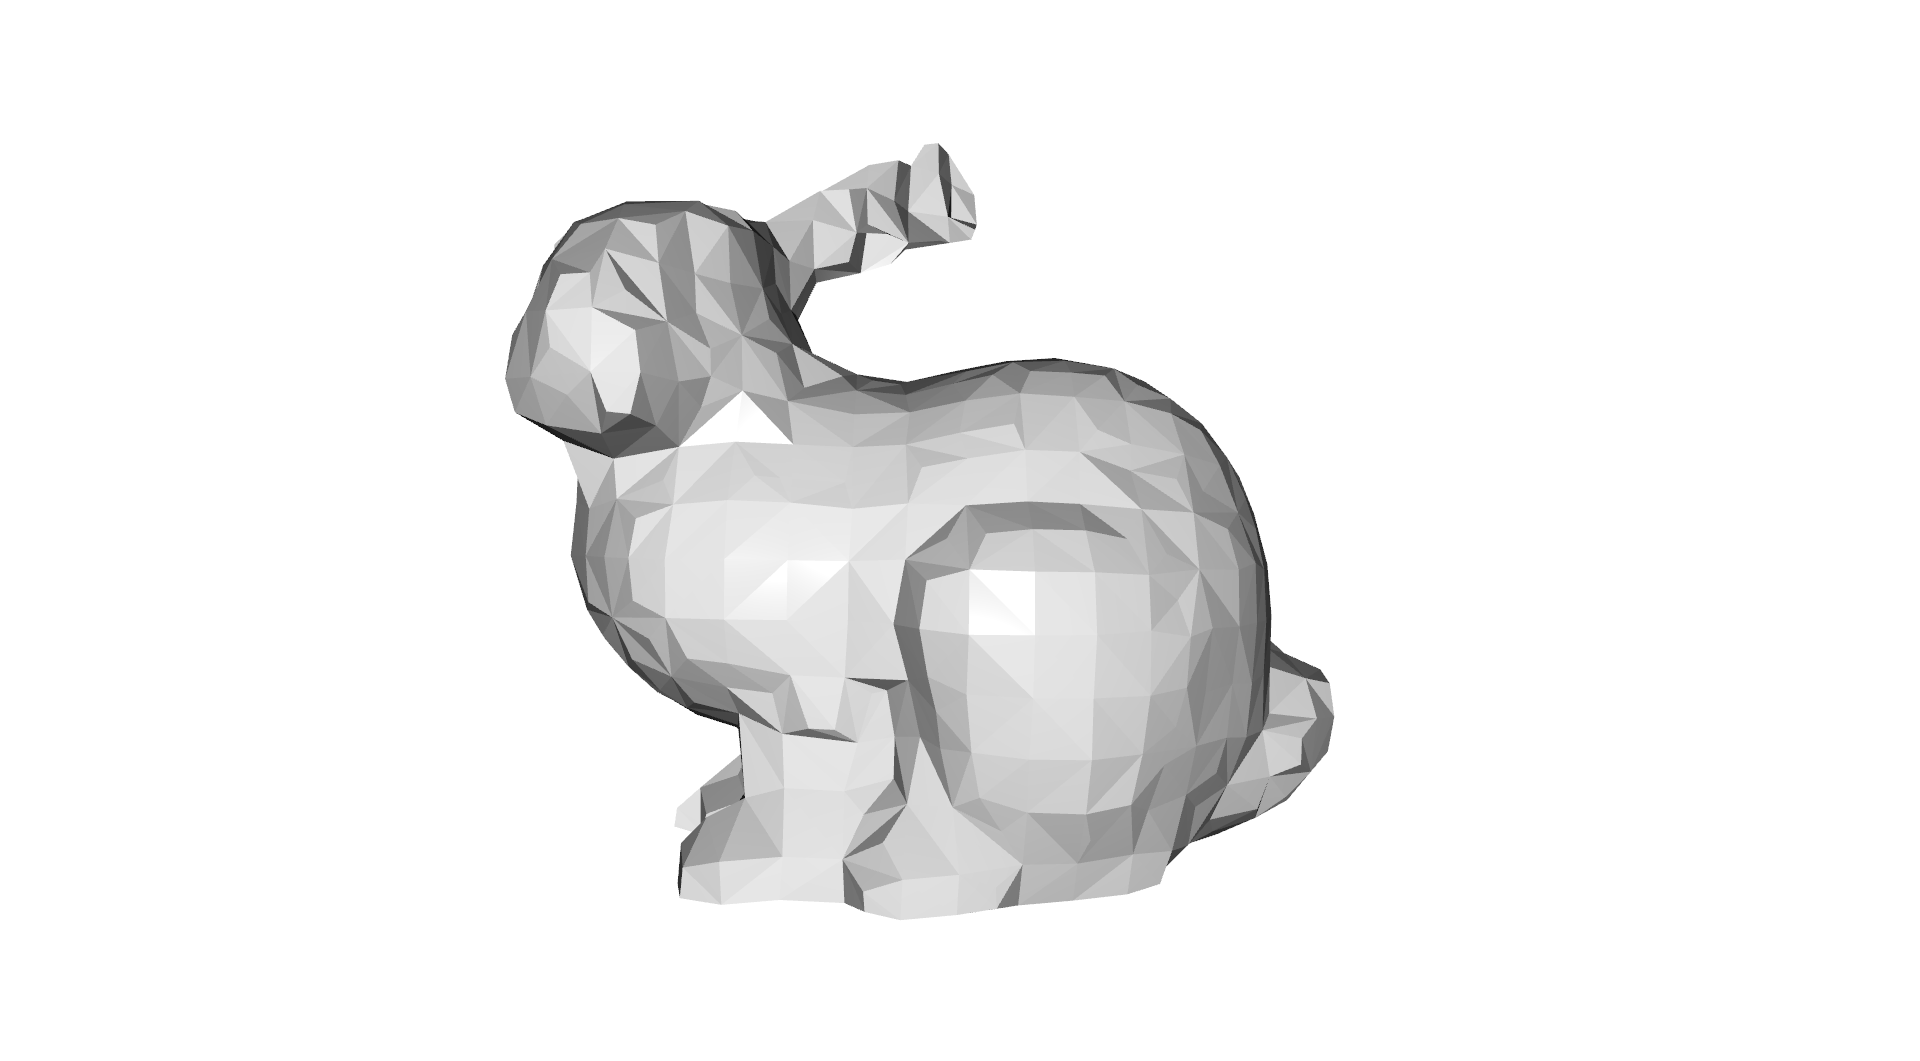

In [6]:
mesh_in = o3dtut.get_bunny_mesh()
print(f'Input mesh has {len(mesh_in.vertices)} vertices and {len(mesh_in.triangles)} triangles')
o3d.visualization.draw_geometries([mesh_in])

voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 32
print(f'voxel_size = {voxel_size:e}')
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size,
    contraction=o3d.geometry.SimplificationContraction.Average)
print(f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles')
o3d.visualization.draw_geometries([mesh_smp])

voxel_size = max(mesh_in.get_max_bound() - mesh_in.get_min_bound()) / 16 # 2 times bigger than above
print(f'voxel_size = {voxel_size:e}')
mesh_smp = mesh_in.simplify_vertex_clustering(
    voxel_size=voxel_size,
    contraction=o3d.geometry.SimplificationContraction.Average
)
print(f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles')
o3d.visualization.draw_geometries([mesh_smp])

#### Mesh decimation
Another category of mesh is simplification methods is mesh decimation that operates in incremental steps. We select a single triangle that minimizes an error metric and removes it. This is repeated until a required number of triangles is achieved. Open3D implements **simplify_quadratic_decimation** that minimizes error quadratics(distances to neighboring planes). The parameter **target_number_of_triangles** defines the stopping criteria of the decimation algorithm.

Simplified mesh has 4405 vertices and 6499 triangles


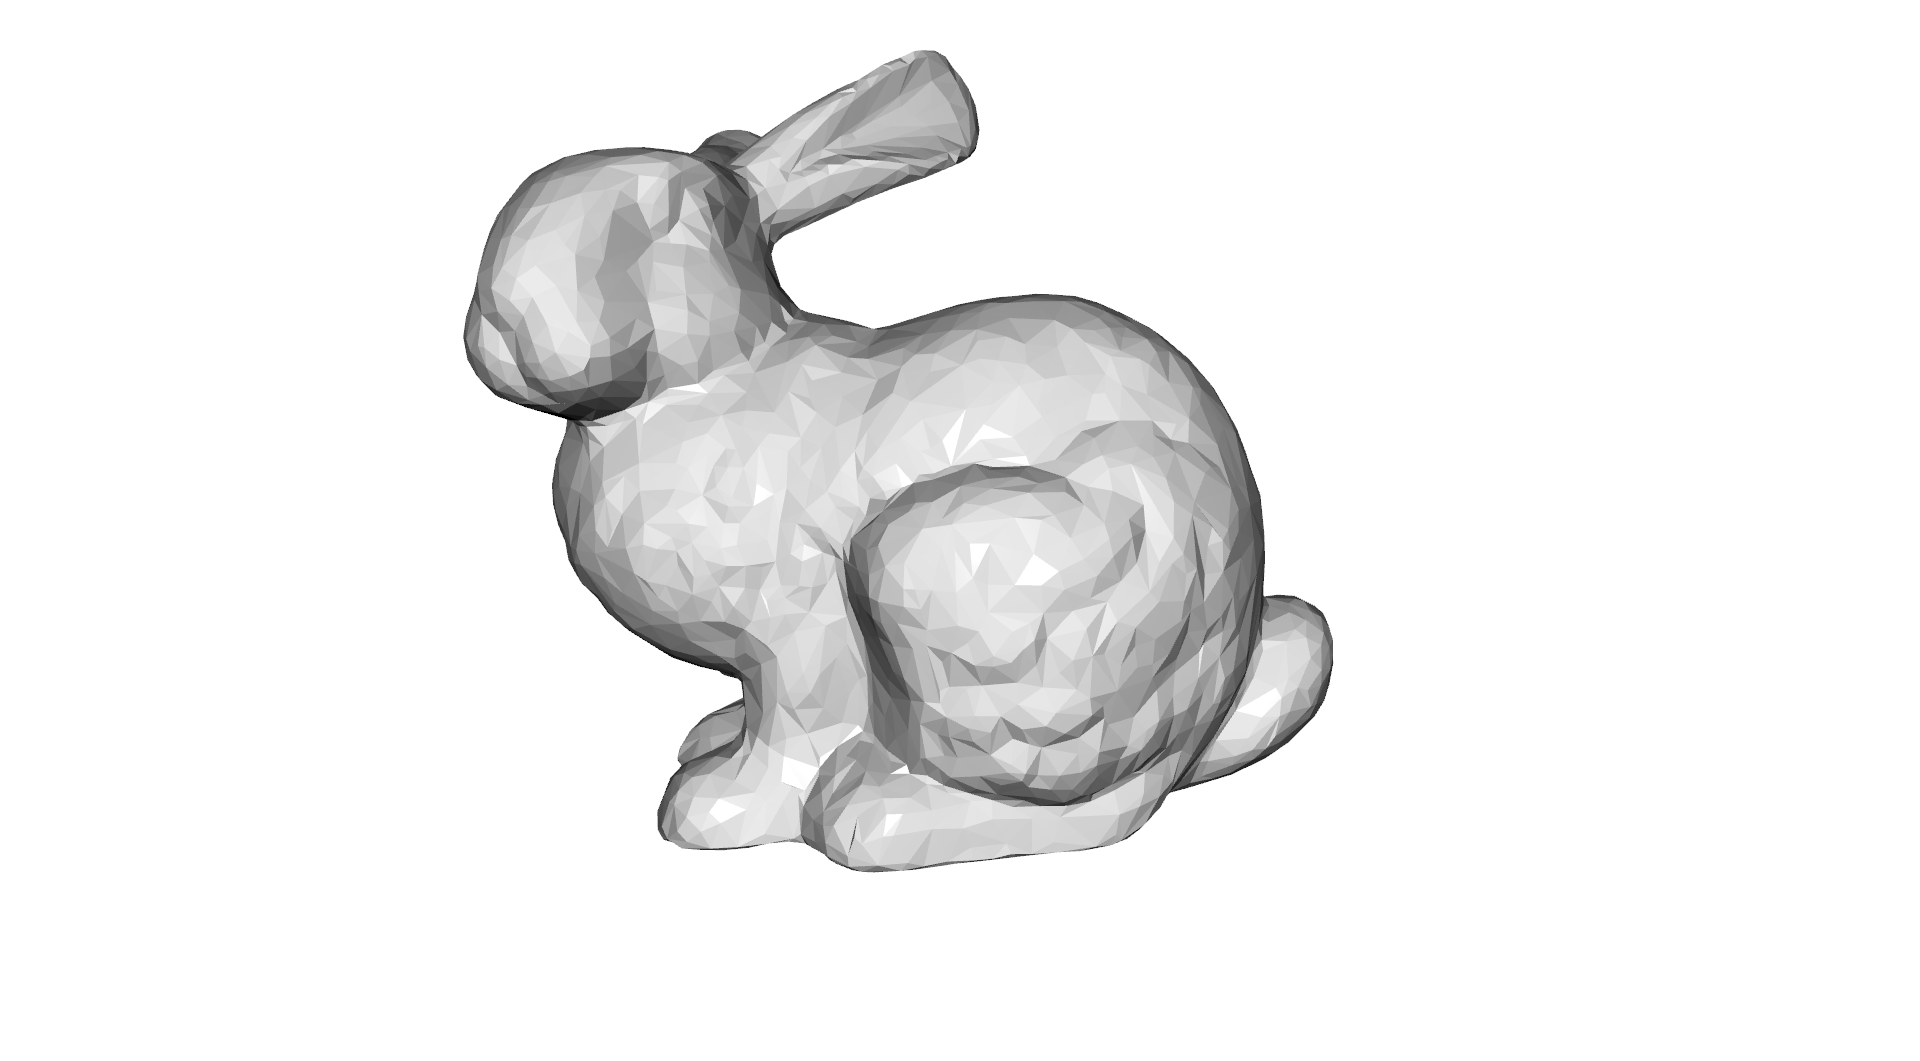

Simplified mesh has 1978 vertices and 1700 triangles


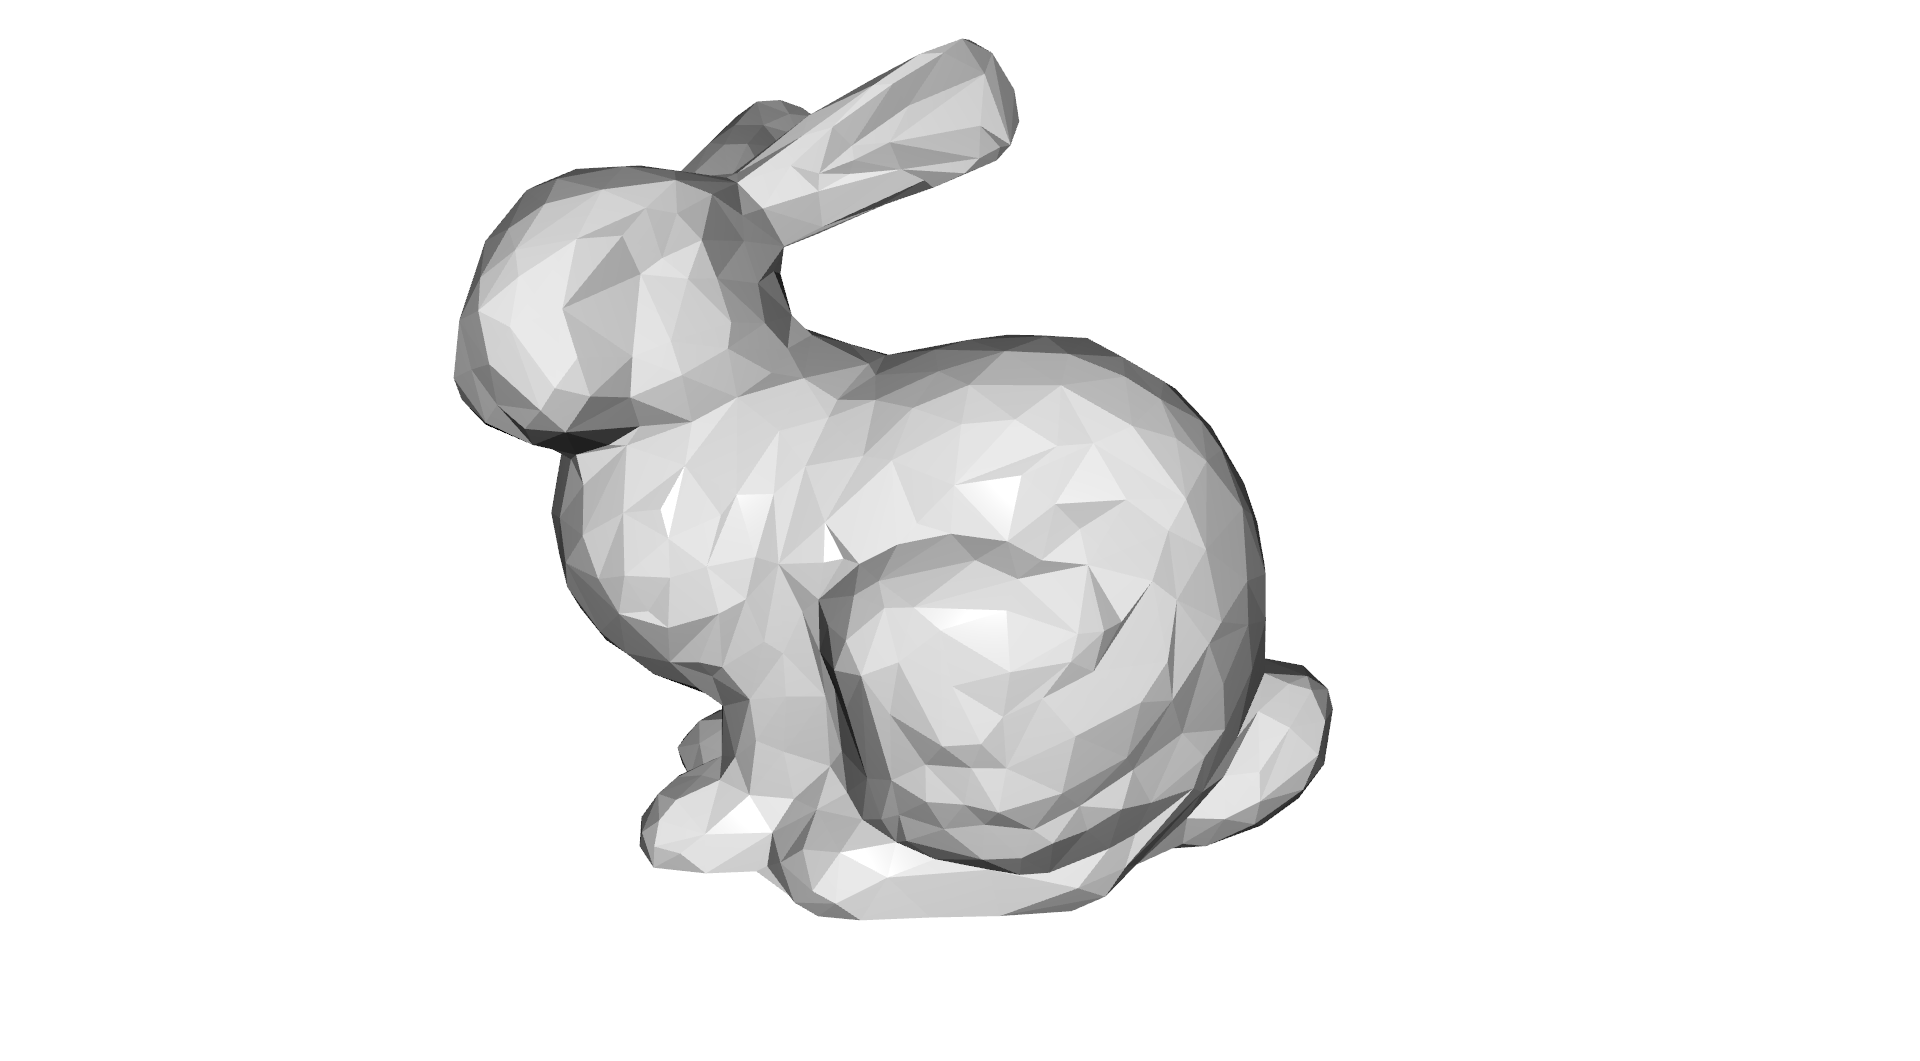

In [10]:
mesh_smp = mesh_in.simplify_quadric_decimation(target_number_of_triangles=6500)
print(f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles')
o3d.visualization.draw_geometries([mesh_smp])

mesh_smp = mesh_in.simplify_quadric_decimation(target_number_of_triangles=1700)
print(f'Simplified mesh has {len(mesh_smp.vertices)} vertices and {len(mesh_smp.triangles)} triangles')
o3d.visualization.draw_geometries([mesh_smp])

#### Connected components
The result of various reconstruction methods. Open3D implements a connected components algorithm **cluster_connected_triangles** that assigns each triangle to a cluster of connected triangles. It returns for each triangle the index of the cluster in **triangle_clusters**, and per cluster the number of triangles in **cluster_n_triangles** and the surface area of the cluster in **cluster_area**.

This is useful in for instance [RGBD Integration](http://www.open3d.org/docs/release/tutorial/pipelines/rgbd_integration.html), which is not always a single triangle mesh, but a number of meshes. Some of the smaller parts are due to noise and we most likely want to remove them.

The code below shows the application of **cluster_connected_triangles** and how it can be used to remove spurious triangles.

In [7]:
import open3d as o3d
import copy
import numpy as np
import matplotlib.pyplot as plt
import Open3D.examples.python.open3d_tutorial as o3dtut

Generate data
Show input mesh


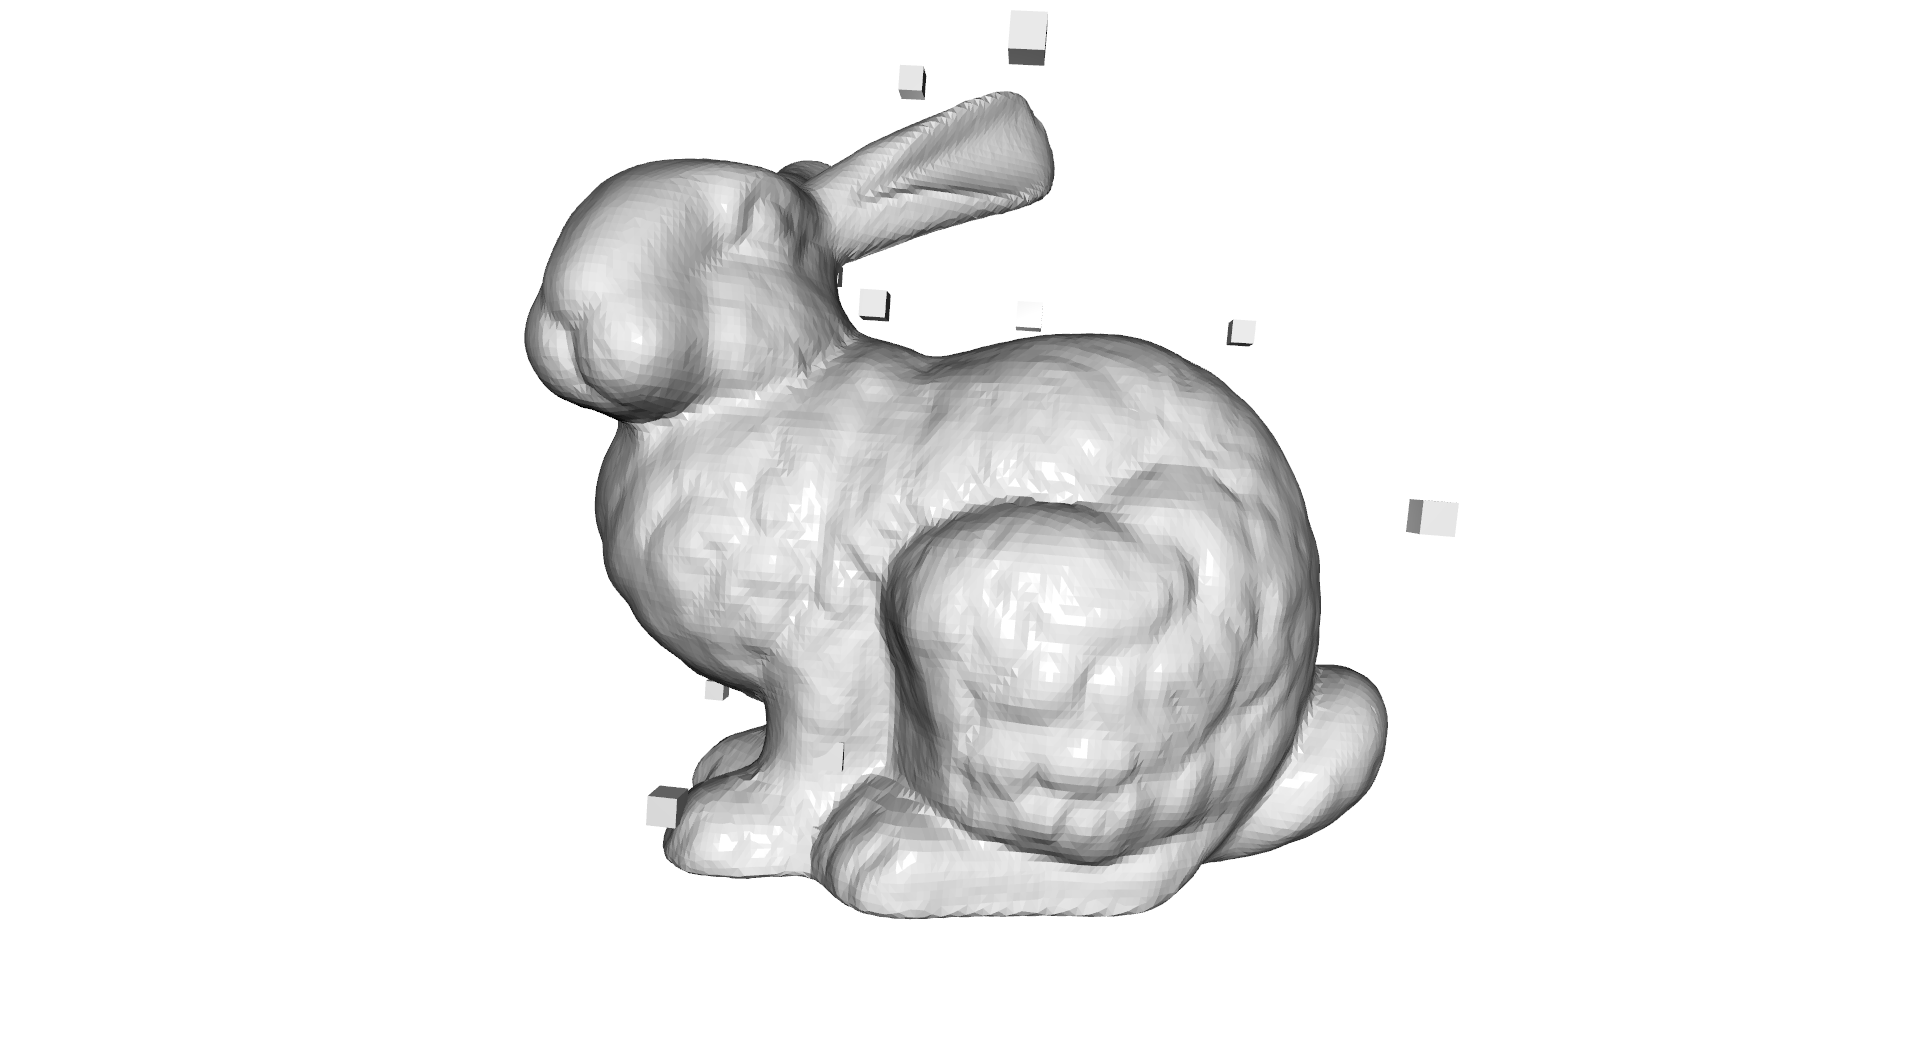

In [2]:
print(f'Generate data')
mesh = o3dtut.get_bunny_mesh().subdivide_midpoint(number_of_iterations=2)
vert = np.asarray(mesh.vertices)
min_vert, max_vert = vert.min(axis=0), vert.max(axis=0)
for _ in range(30):
    cube = o3d.geometry.TriangleMesh.create_box()
    cube.scale(0.005, center=cube.get_center())
    cube.translate(
        (
            np.random.uniform(min_vert[0], max_vert[0]),
            np.random.uniform(min_vert[1], max_vert[1]),
            np.random.uniform(min_vert[2], max_vert[2]),
        ),
        relative=False,
    )
    mesh += cube
mesh.compute_vertex_normals()
print(f'Show input mesh')
o3d.visualization.draw_geometries([mesh])

In [3]:
print(f'Cluster connected triangles')
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    triangle_clusters, cluster_n_triangles, cluster_area = (mesh.cluster_connected_triangles())
triangle_clusters = np.asarray(triangle_clusters)
cluster_n_triangles = np.asarray(cluster_n_triangles)
cluster_area = np.asarray(cluster_area)

Cluster connected triangles
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=31


Show mesh with small clusters removed


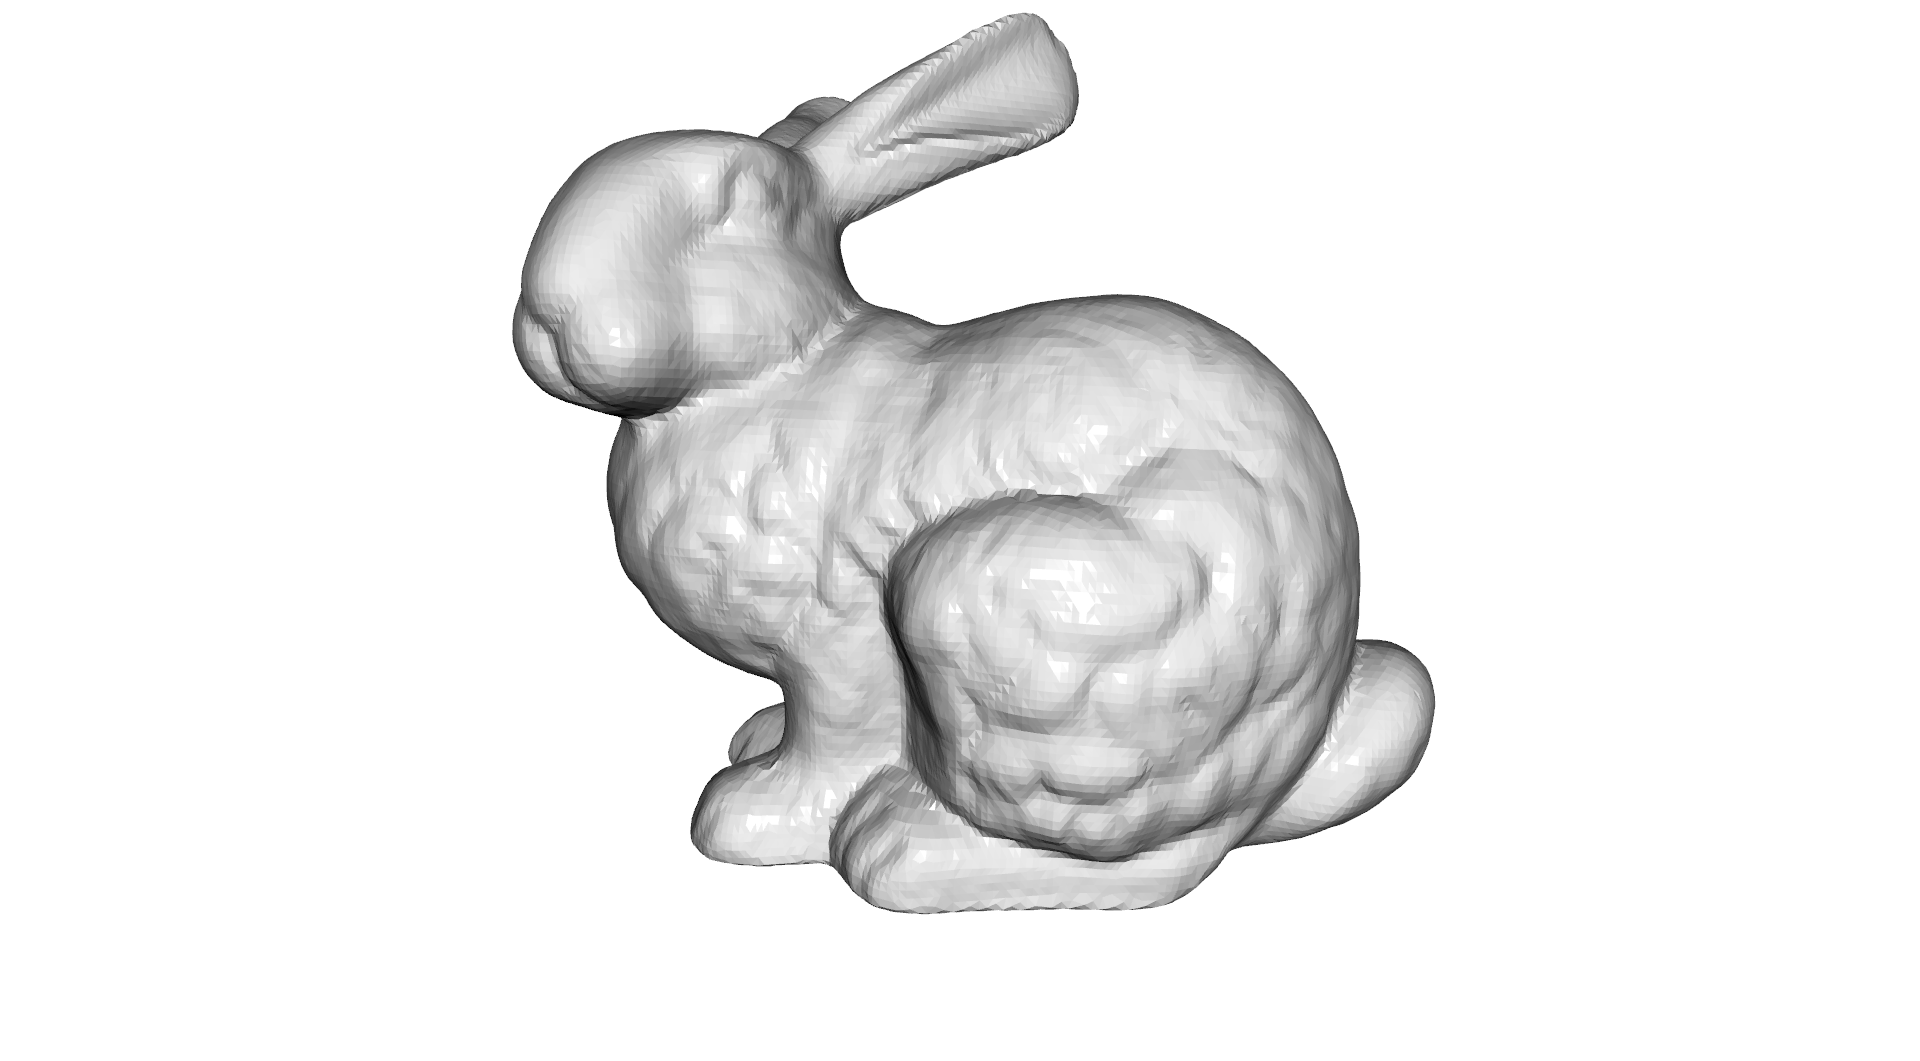

In [8]:
print(f'Show mesh with small clusters removed')
mesh_0 = copy.deepcopy(mesh)
triangles_to_remove = cluster_n_triangles[triangle_clusters] < 100
mesh_0.remove_triangles_by_mask(triangles_to_remove)
o3d.visualization.draw_geometries([mesh_0])

Show largest cluster
<class 'numpy.int64'>
0
[False False False ...  True  True  True]


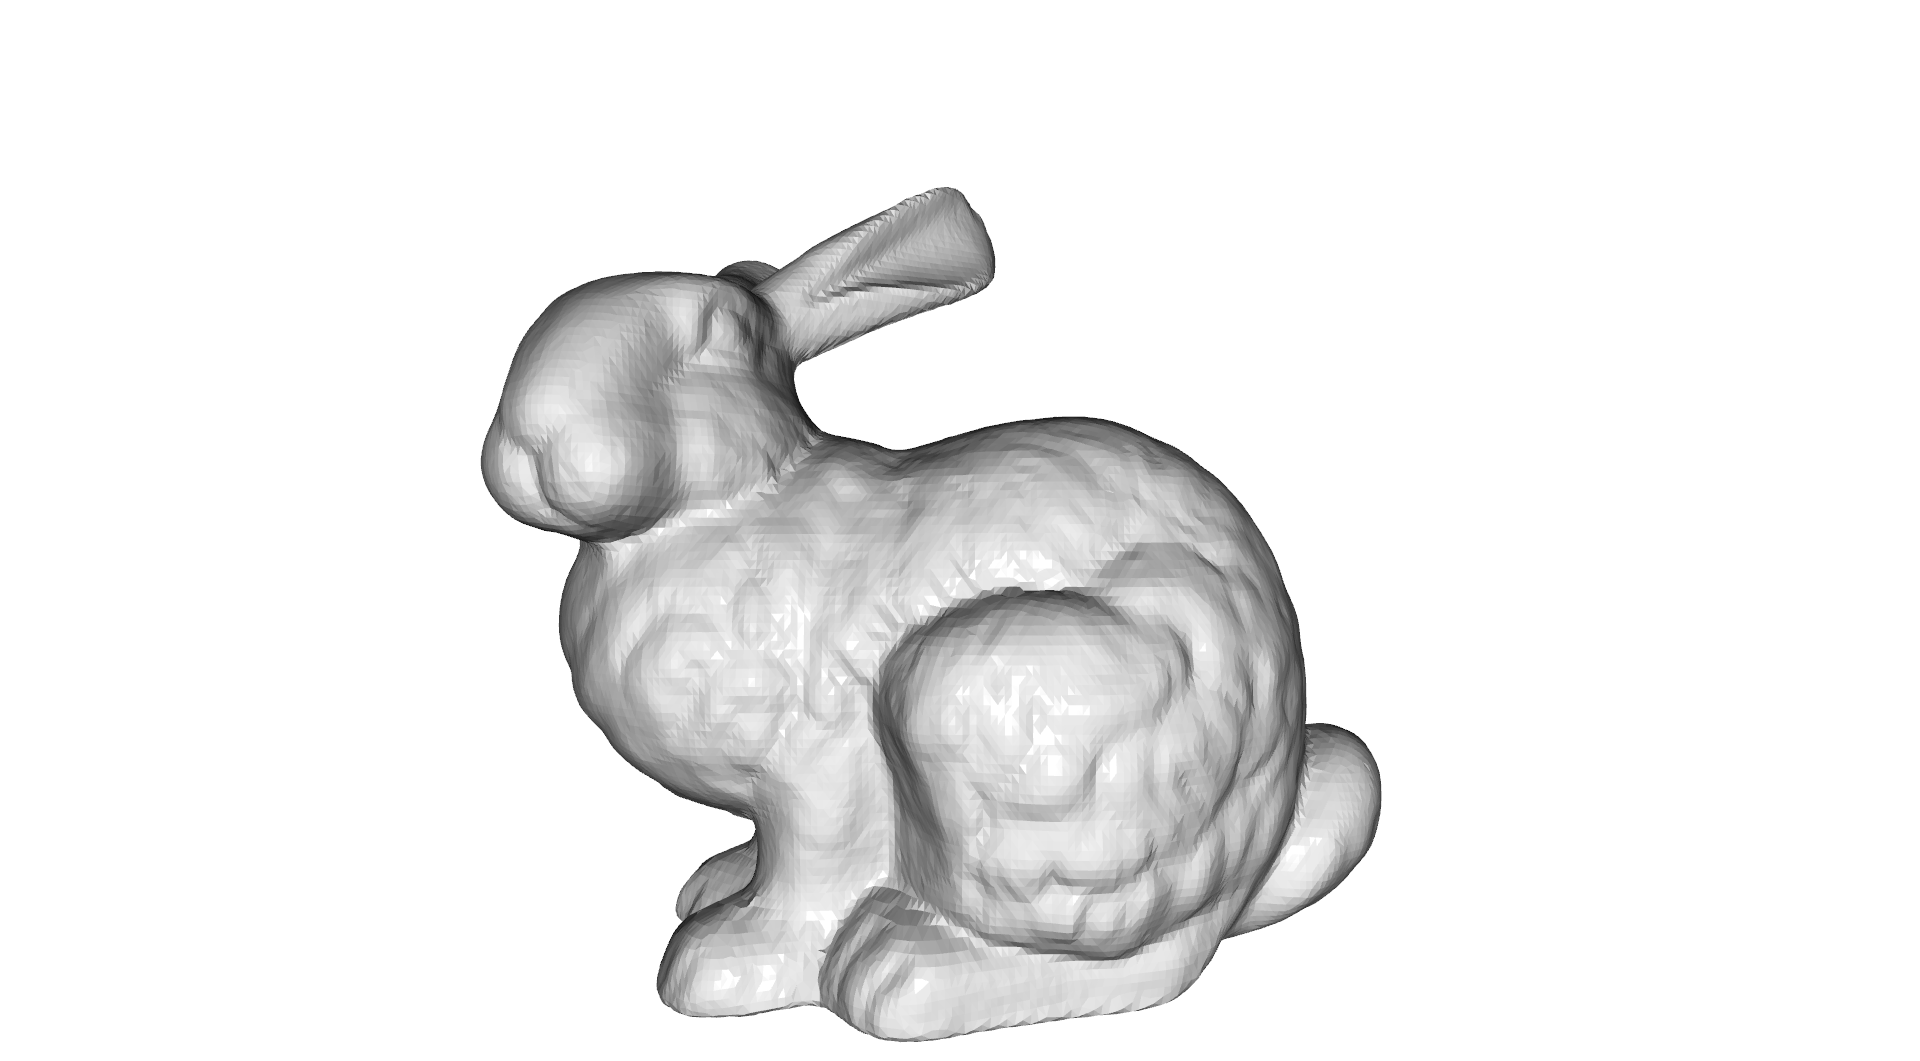

In [13]:
print(f'Show largest cluster')
mesh_1 = copy.deepcopy(mesh)
print(type(cluster_n_triangles.argmax())) # <class 'numpy.int64'>
largest_cluster_idx = cluster_n_triangles.argmax()
print(largest_cluster_idx) # 0 ?
triangles_to_remove = triangle_clusters != largest_cluster_idx
print(triangles_to_remove) # [False False False ...  True  True  True]
mesh_1.remove_triangles_by_mask(triangles_to_remove)
o3d.visualization.draw_geometries([mesh_1])